In [1]:
#librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import ftfy
from sklearn.impute import KNNImputer
from dotenv import load_dotenv
import os

In [2]:
#funciones para limpiar los datos 
from utils import *
from atipicos import *

# **Dataset 1: Software Engineer Salaries**

In [3]:
#Carga del dataset
df1 = pd.read_csv(r'datasets\Software Engineer Salaries.csv')

In [4]:
#revision del dataset
df1 = clean_column_names(df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        868 non-null    object 
 1   company_score  789 non-null    float64
 2   job_title      870 non-null    object 
 3   location       857 non-null    object 
 4   date           870 non-null    object 
 5   salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [5]:
# Modificar texto en columnas categoricas
df1 = capitalize_column(df1, 'company')
df1 = capitalize_column(df1, 'job_title')

In [6]:
# Verificar valores nulos y duplicados
df1_ndr = null_duplicates_review(df1, 'Software Engineer Salaries')

Valores ausentes en Software Engineer Salaries:
               Valores ausentes (%)
company                        0.23
company_score                  9.31
job_title                      0.00
location                       1.49
date                           0.00
salary                        12.18

Total duplicados en Software Engineer Salaries: 0



In [7]:
# Identificar duplicados
duplicates = df1[df1.duplicated(keep=False)]
duplicates

Empty DataFrame
Columns: [company, company_score, job_title, location, date, salary]
Index: []

In [8]:
# Eliminamos duplicados si es necesario
df1.drop_duplicates(inplace=True)
print(f"Total duplicados después de la limpieza: {df1.duplicated().sum()}")

Total duplicados después de la limpieza: 0


In [9]:
#revision previa de los datos
df1.head()

company  company_score  \
0                       Viewsoft            4.8   
1                        Workiva            4.3   
2     Garmin International, Inc.            3.9   
3                       Snapchat            3.5   
4  Vitesco Technologies Group Ag            3.1   

                                           job_title         location date  \
0                                  Software Engineer     Manassas, VA   8d   
1                          Software Support Engineer           Remote   2d   
2                               C# Software Engineer         Cary, NC   2d   
3  Software Engineer, Fullstack, 1+ Years Of Expe...  Los Angeles, CA   2d   
4                                  Software Engineer       Seguin, TX   2d   

                          salary  
0   $68K - $94K (Glassdoor est.)  
1   $61K - $104K (Employer est.)  
2  $95K - $118K (Glassdoor est.)  
3   $97K - $145K (Employer est.)  
4  $85K - $108K (Glassdoor est.)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        868 non-null    object 
 1   company_score  789 non-null    float64
 2   job_title      870 non-null    object 
 3   location       857 non-null    object 
 4   date           870 non-null    object 
 5   salary         764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.9+ KB


In [11]:
#descartamos la columna date porque no la vamos a utilizar
df1 = df1.drop(['date'], axis=1)

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


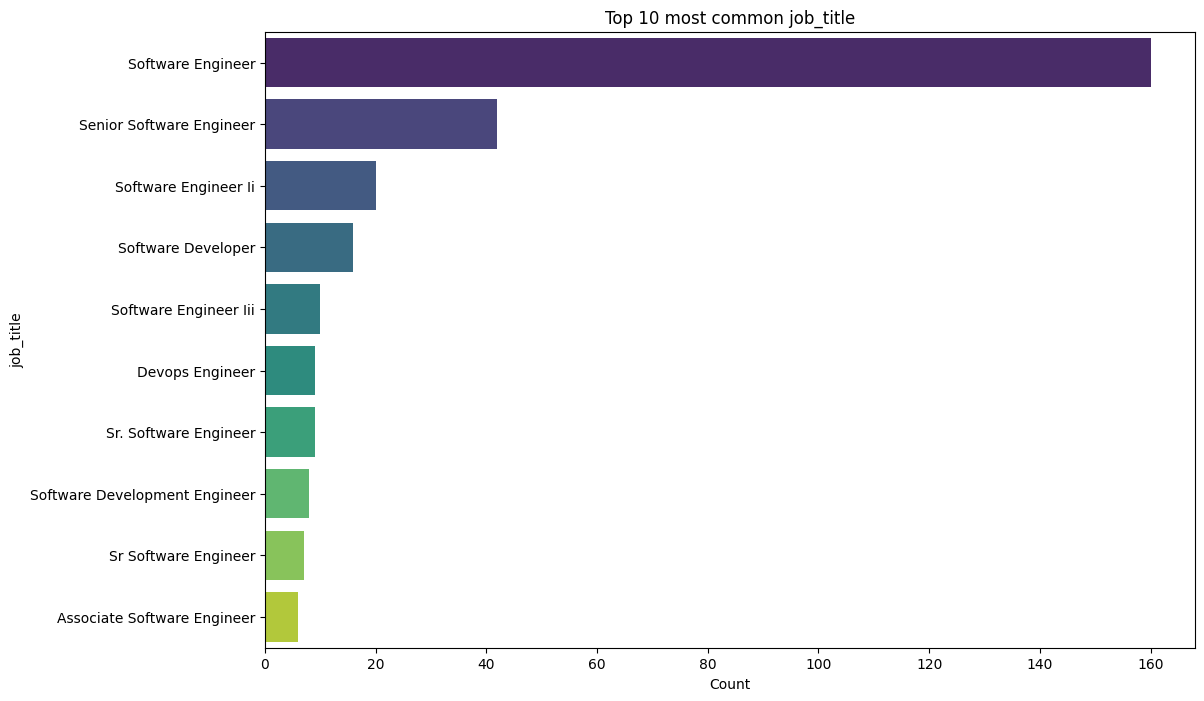

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


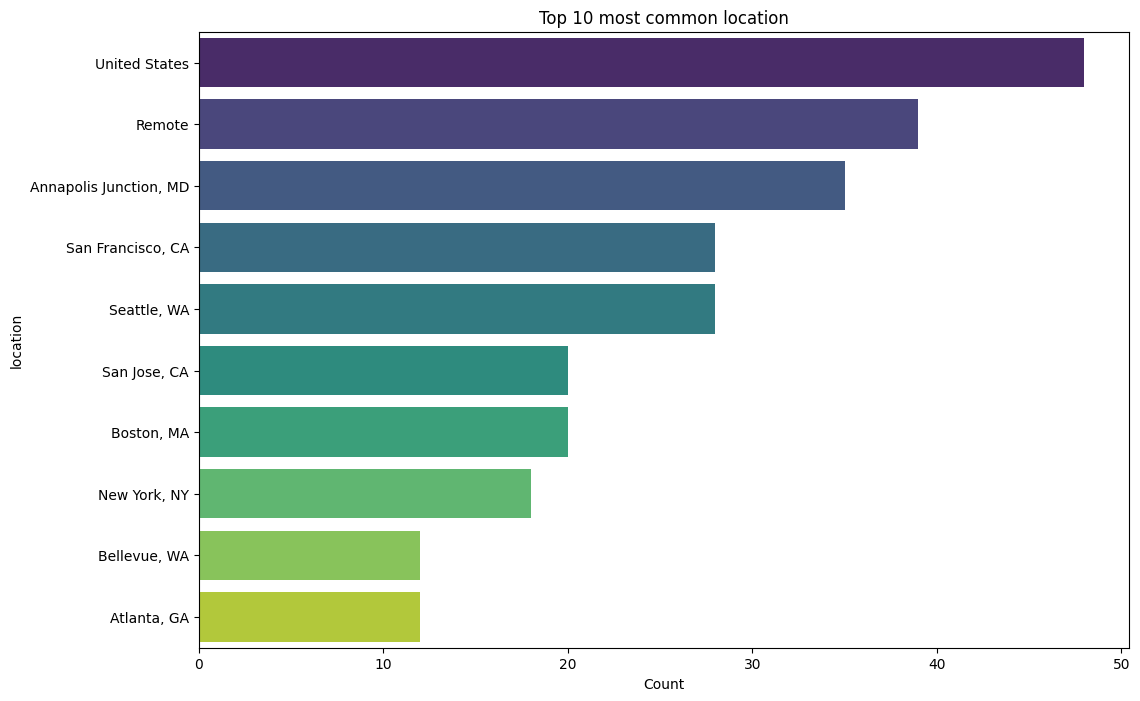

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


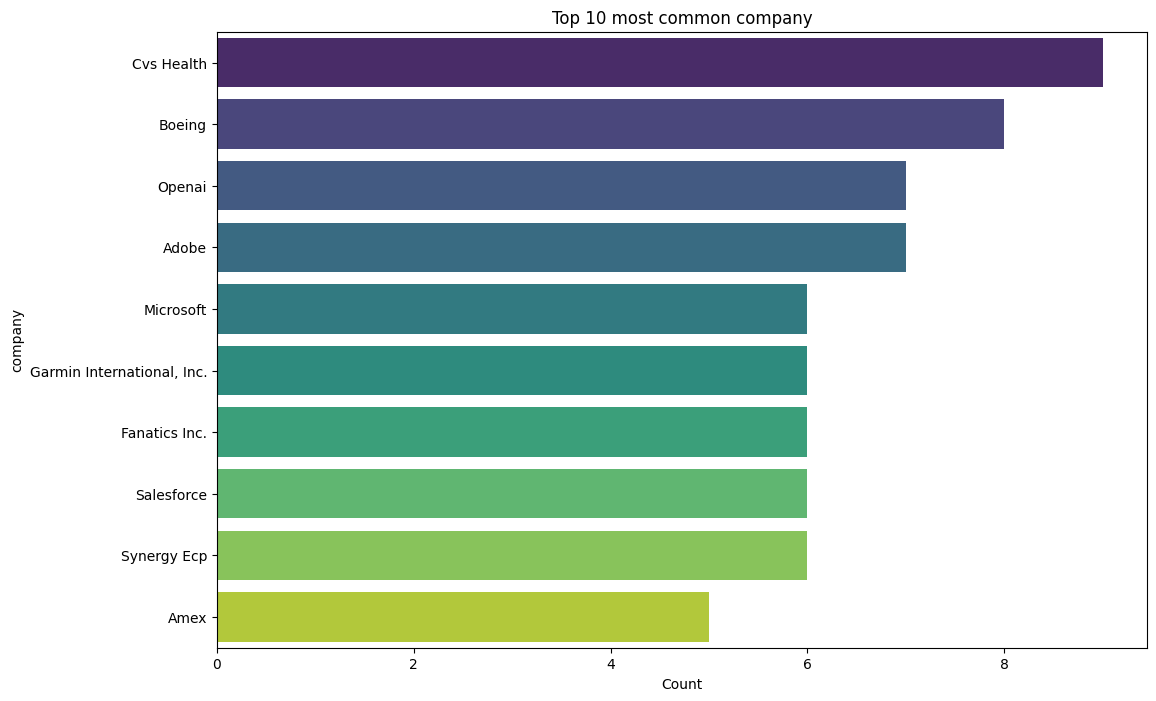

In [12]:
#revisamos las variables categoricas
categorical_columns = ['job_title', 'location','company']
for col in categorical_columns:
    plot_top_n_categories(df1, col, n=10)

In [13]:
#Completo los valores no especificados de las variables categoricas
column_list=['company','location']
for column in column_list:
    df1[column] = df1[column].fillna("Unspecified")
    df1[column] = df1[column].replace("", "Unspecified")

In [14]:
#obtengo ciudad y estado desde localidad
df1[['city', 'state']] = df1['location'].apply(lambda x: pd.Series(split_location(x)))

In [15]:
df1['job_title'].value_counts()

job_title
Software Engineer                                         160
Senior Software Engineer                                   42
Software Engineer Ii                                       20
Software Developer                                         16
Software Engineer Iii                                      10
                                                         ... 
Sr Associate Software Engineer, Database As A Service       1
Software Engineer - Front End (Dashboard) - Aurora, Co      1
Software Engineer | Front End Developer                     1
Senior React/Javascript Software Engineer                   1
Gui Software Engineer Ii - Surgical Robotics                1
Name: count, Length: 533, dtype: int64

In [16]:
#Agupamos los titulos de empleo
df1['job_simp'] = df1['job_title'].apply(title_simplifier)
df1.job_simp.value_counts()

job_simp
software engineer                                    607
backend developer                                     21
devops engineer                                       17
software developer                                    16
cloud engineer                                        14
                                                    ... 
c# software developer                                  1
wordpress full stack engineer (react)                  1
new engineer-in-training (net) rotational program      1
engineer, junior software                              1
software & system dev. sr. engineer                    1
Name: count, Length: 148, dtype: int64

In [17]:
#obtenemos el nivel de responsabilidad del puesto
df1['seniority'] = df1['job_title'].apply(seniority)
df1.seniority.value_counts()

seniority
junior         598
senior         174
semi-senior     56
unspecified     42
Name: count, dtype: int64

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        870 non-null    object 
 1   company_score  789 non-null    float64
 2   job_title      870 non-null    object 
 3   location       870 non-null    object 
 4   salary         764 non-null    object 
 5   city           870 non-null    object 
 6   state          870 non-null    object 
 7   job_simp       870 non-null    object 
 8   seniority      870 non-null    object 
dtypes: float64(1), object(8)
memory usage: 61.3+ KB


In [19]:
#reviso el valor de company score nulo
print("cantidad de nulos en company score: ", df1[df1['company_score'].isna()].shape[0])
df1[df1['company_score'].isna()].head()

cantidad de nulos en company score:  81


company  company_score  \
789                               Apple            NaN   
790                             Youtube            NaN   
791                           Kasmo Inc            NaN   
792  Systems Technology & Research Inc.            NaN   
793                           Timescale            NaN   

                                             job_title           location  \
789       Site Reliability Engineer (Remote, Us-Based)         Austin, TX   
790                           Senior Software Engineer      Milwaukee, WI   
791  Aiml - Software Engineer, Information Intellig...        Seattle, WA   
792  Software Engineer Iii, Machine Learning (Recom...  Mountain View, CA   
793                              Plc Software Engineer        Detroit, MI   

    salary           city state                                      job_simp  \
789    NaN         Austin    TX  site reliability engineer (remote, us-based)   
790    NaN      Milwaukee    WI                             software engineer   
791    NaN        Seattle    WA                             software engineer   
792    NaN  Mountain View    CA                     machine learning engineer   
793    NaN        Detroit    MI                             software engineer   

    seniority  
789    junior  
790    senior  
791    junior  
792    senior  
793    junior

In [20]:
#Completamos los valores nulos  en score con la mediana de cada compañia
df1['company_score'] = df1.groupby('company')['company_score'].transform(lambda x: x.fillna(x.median().round(1)))

print("cantidad de nulos en company score despues de agrupar por company: ", df1[df1['company_score'].isna()].shape[0])


cantidad de nulos en company score despues de agrupar por company:  48


c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: R

In [21]:
#los valores que siguen nulos los completo usando KNN
imputer = KNNImputer(n_neighbors=5)
df1['company_score'] = imputer.fit_transform(df1[['company_score']])

print("cantidad de nulos en company score despues de agrupar por company: ", df1[df1['company_score'].isna()].shape[0])

cantidad de nulos en company score despues de agrupar por company:  0


In [22]:
df1.company_score=df1.company_score.round(1)
df1.company_score.value_counts()

company_score
3.9    124
4.1     86
3.8     70
4.0     69
3.7     64
3.5     59
4.2     57
3.6     42
3.4     39
4.4     34
5.0     28
3.1     25
4.3     23
4.5     20
4.6     18
4.8     18
3.3     18
4.7     15
3.2     14
3.0     13
4.9      7
2.7      6
2.9      5
2.5      5
2.4      3
2.3      3
2.0      2
2.6      1
2.8      1
1.0      1
Name: count, dtype: int64

In [23]:
#tratamiento de columna salario
df1 = extraer_salarios(df1, 'salary')

per_hour_salaries = df1[df1['salary'].str.contains('Per Hour', na=False)]
display(per_hour_salaries.head(10))

company  company_score  \
86                               Ilogic Inc            3.5   
115                    Two Six Technologies            4.1   
161                           Mailprotector            4.6   
174  First Command Financial Services, Inc.            4.2   
212                              Salesforce            3.1   
263                         Peopletec, Inc.            3.5   
282         Canon Medical Research Usa, Inc            3.7   
297                                 Vantaca            4.5   
300                                Applovin            4.7   
314                                 Infosys            4.7   

                                         job_title              location  \
86                             Software Developers  Township of Hamilton   
115                              Software Engineer         Warrenton, VA   
161                              Software Engineer                Remote   
174                              Software Engineer           Unspecified   
212                       Software Engineering Mts     San Francisco, CA   
263             Software Engineer- Executions Team           Chicago, IL   
282  C++ Graphics Engineer, 1+ Years Of Experience          New York, NY   
297                         Test Software Engineer            Nashua, NH   
300                              Software Engineer        Washington, DC   
314                              Software Engineer          Dearborn, MI   

                                       salary                  city  \
86            $80.00 Per Hour (Employer est.)  Township of Hamilton   
115           $50.00 Per Hour (Employer est.)             Warrenton   
161           $50.00 Per Hour (Employer est.)                Remote   
174  $50.00 - $70.00 Per Hour (Employer est.)           Unspecified   
212  $40.00 - $55.00 Per Hour (Employer est.)         San Francisco   
263  $80.00 - $85.00 Per Hour (Employer est.)               Chicago   
282  $55.00 - $60.00 Per Hour (Employer est.)              New York   
297          $100.00 Per Hour (Employer est.)                Nashua   
300           $15.69 Per Hour (Employer est.)            Washington   
314  $40.00 - $60.00 Per Hour (Employer est.)              Dearborn   

                    state                                       job_simp  \
86   Township of Hamilton                            software developers   
115                    VA                              software engineer   
161                Remote                              software engineer   
174           Unspecified                              software engineer   
212                    CA                              software engineer   
263                    IL                              software engineer   
282                    NY  c++ graphics engineer, 1+ years of experience   
297                    NH                              software engineer   
300                    DC                              software engineer   
314                    MI                              software engineer   

       seniority  min_salary  max_salary  avg_salary  
86   unspecified    166400.0    166400.0    166400.0  
115       junior    104000.0    104000.0    104000.0  
161       junior    104000.0    104000.0    104000.0  
174       junior    104000.0    145600.0    124800.0  
212       junior     83200.0    114400.0     98800.0  
263       junior    166400.0    176800.0    171600.0  
282       junior    114400.0    124800.0    119600.0  
297       junior    208000.0    208000.0    208000.0  
300       junior     32635.2     32635.2     32635.2  
314       junior     83200.0    124800.0    104000.0

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        870 non-null    object 
 1   company_score  870 non-null    float64
 2   job_title      870 non-null    object 
 3   location       870 non-null    object 
 4   salary         764 non-null    object 
 5   city           870 non-null    object 
 6   state          870 non-null    object 
 7   job_simp       870 non-null    object 
 8   seniority      870 non-null    object 
 9   min_salary     870 non-null    float64
 10  max_salary     870 non-null    float64
 11  avg_salary     870 non-null    float64
dtypes: float64(4), object(8)
memory usage: 81.7+ KB


In [25]:
#revisamos los nulos en salario
print("Cantidad de nulos en salario: ",df1[df1.salary.isna()].shape[0])

df1[df1.salary.isna()].head()

Cantidad de nulos en salario:  106


company  company_score  \
764  January Technologies            4.5   
765    Zebra Technologies            4.1   
766       Credit One Bank            3.8   
767                  Visa            3.8   
768           Foot Locker            4.6   

                                            job_title          location  \
764                             Software Engineer Iii  Fort Collins, CO   
765  Javascript Software Engineer – Analytics Ui Team  Indianapolis, IN   
766            Software Engineer, Borrower Activation     United States   
767                   Devsecops Software Engineer, Ii    Holtsville, NY   
768                               Software Engineer I     Las Vegas, NV   

    salary           city          state           job_simp    seniority  \
764    NaN   Fort Collins             CO  software engineer       senior   
765    NaN   Indianapolis             IN       data analyst       junior   
766    NaN  United States  United States  software engineer       junior   
767    NaN     Holtsville             NY  software engineer  semi-senior   
768    NaN      Las Vegas             NV  software engineer       junior   

     min_salary  max_salary  avg_salary  
764         0.0         0.0         0.0  
765         0.0         0.0         0.0  
766         0.0         0.0         0.0  
767         0.0         0.0         0.0  
768         0.0         0.0         0.0

In [26]:
# Función para calcular la mediana excluyendo los ceros
def median_without_zeros(x):
    return np.median(x[x != 0])

# Agrupar por 'job_title' y 'seniority' y calcular la mediana excluyendo los ceros
df_grouped = df1.groupby(['job_title', 'seniority'])[['min_salary', 'max_salary', 'avg_salary']].transform(median_without_zeros)

# Reemplazar los ceros solo en las columnas donde sea necesario
df1['min_salary'] = np.where(df1['min_salary'] == 0, df_grouped['min_salary'], df1['min_salary'])
df1['max_salary'] = np.where(df1['max_salary'] == 0, df_grouped['max_salary'], df1['max_salary'])
df1['avg_salary'] = np.where(df1['avg_salary'] == 0, df_grouped['avg_salary'], df1['avg_salary'])

# Verificar si hay aún valores nulos después de la imputación
print(df1.isnull().sum())

# Imputación de valores nulos restantes en las columnas específicas
df1[['min_salary', 'max_salary', 'avg_salary']] = df1[['min_salary', 'max_salary', 'avg_salary']].fillna(df1[['min_salary', 'max_salary', 'avg_salary']].mean())

c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


company            0
company_score      0
job_title          0
location           0
salary           106
city               0
state              0
job_simp           0
seniority          0
min_salary        69
max_salary        69
avg_salary        69
dtype: int64


In [27]:
# Verificar estadísticas
df1.describe().round(2)

company_score  min_salary  max_salary  avg_salary
count         870.00      870.00      870.00      870.00
mean            3.89   104106.76   153335.87   128717.26
std             0.51    35528.46    56211.66    43874.74
min             1.00     6000.00     7000.00     6500.00
25%             3.60    82000.00   118250.00   101000.00
50%             3.90    98000.00   143000.00   121000.00
75%             4.20   116000.00   169000.00   144000.00
max             5.00   343000.00   637000.00   490000.00

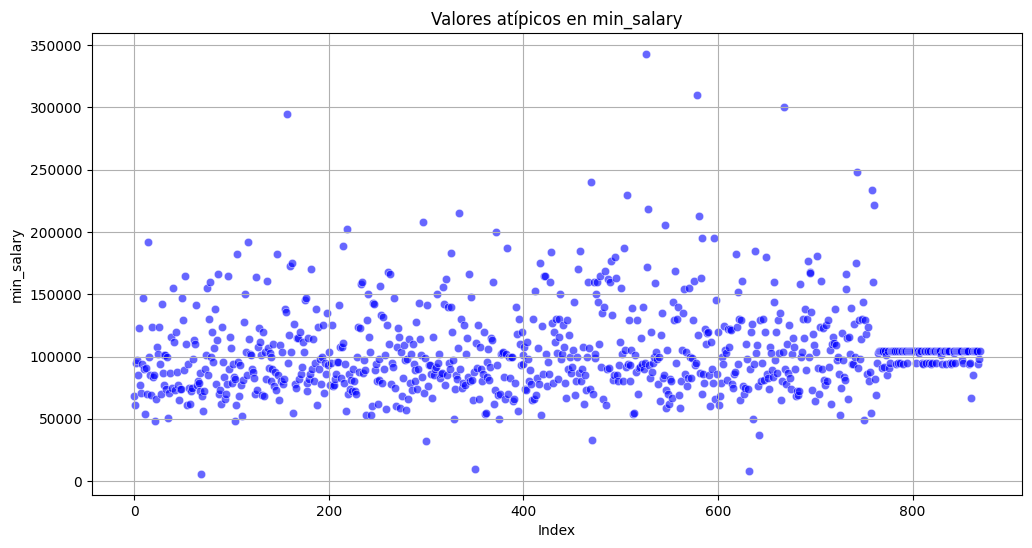

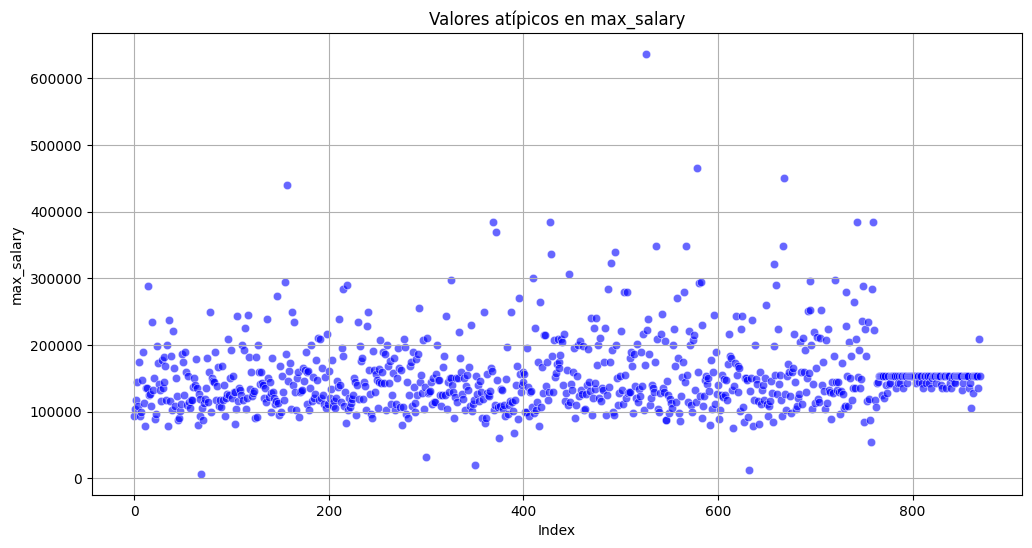

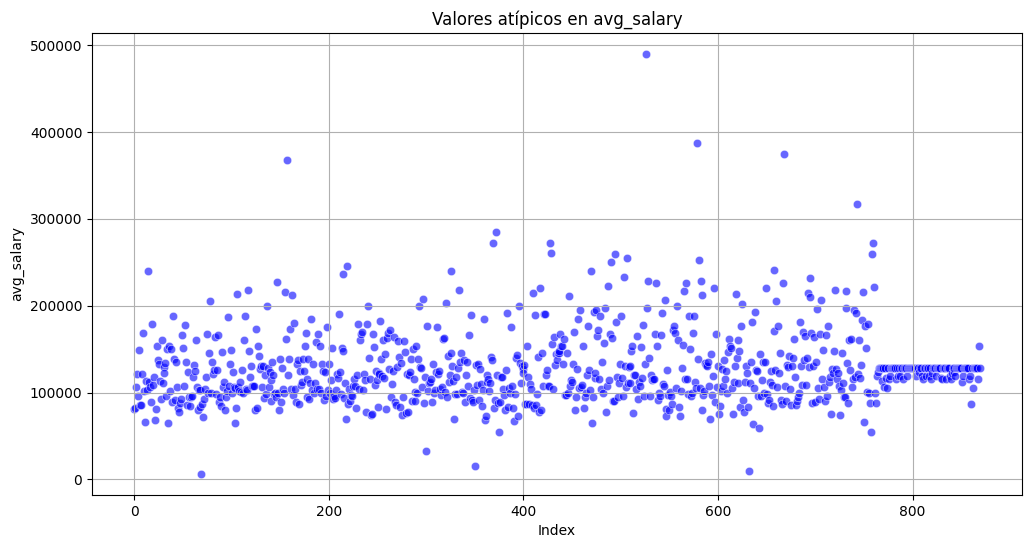

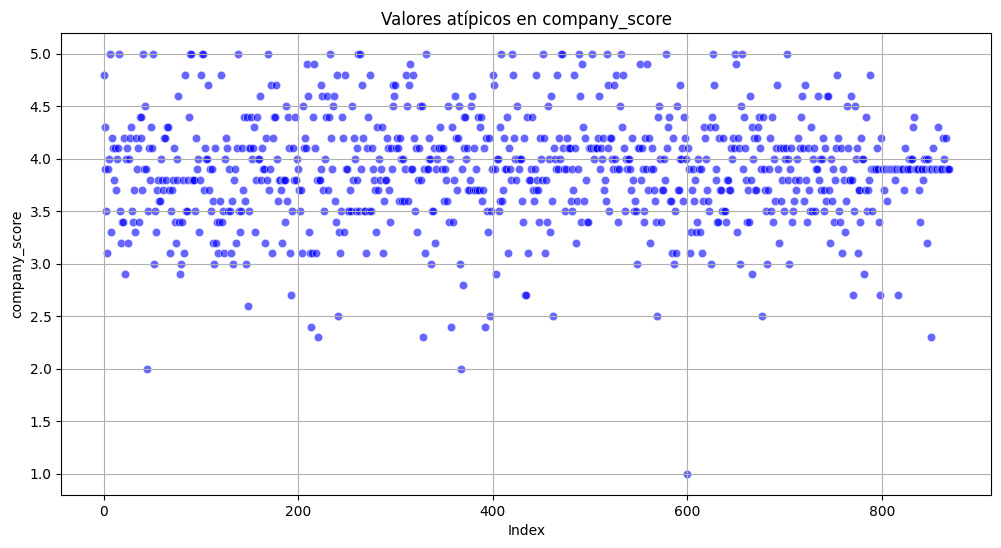

In [28]:
# Visualización de columnas numéricas (buscar outliers)
numeric_columns = ['min_salary', 'max_salary', 'avg_salary','company_score']
for col in numeric_columns:
    plot_outliers(df1, col, title=f'Valores atípicos en {col}')

In [29]:
#revisamos posibles outliers
df1[df1.avg_salary<80000]

company  company_score  \
11                 Healthmine Services, Inc.            3.8   
21                 Summit Technologies, Inc.            4.2   
35                 Principal Financial Group            4.1   
46                                  Eimagine            3.5   
69                                Kairos Inc            3.5   
71                                        S3            3.8   
103                 Diverse Career Solutions            3.7   
218                                Cedar Inc            3.1   
238          Nationmind Infoservices Pvt Ltd            3.6   
243                                  Bi Labs            3.1   
244                                   Verily            3.5   
275                                    Adobe            3.5   
279                   Collaborative Robotics            3.7   
281                                 Snapchat            4.3   
300                                 Applovin            4.7   
329                                     Usaa            3.9   
350                  Solvere Technical Group            3.6   
360                             Ixl Learning            3.8   
361                          Jbt Corporation            4.6   
375                                   Uipath            3.7   
390                        Delta Dental Ins.            3.7   
394                              Proteus Co.            3.5   
416                                   Tuvoli            3.1   
470  Engineering Technology Associates, Inc.            5.0   
485                       Schneider Electric            4.1   
513                         Crunchyroll, Llc            4.2   
547                            Pac Group Llc            3.5   
561                                 Hop Labs            4.2   
592                         Elevi Associates            4.7   
601                       Ford Motor Company            4.1   
615                Ryzlink Dba Chuwa America            3.1   
627               Garmin International, Inc.            4.7   
632                 Geneva Technologies Inc.            3.4   
636                        Sabre Engineering            3.5   
642                  Nmg Technology Services            3.8   
716                                   Mahlet            4.1   
725                                   Cedent            3.7   
750                                 Dcs Corp            3.9   
757          Boeing Intelligence & Analytics            3.4   

                                             job_title  \
11                                   Software Engineer   
21                                   Software Engineer   
35                       Experienced Software Engineer   
46                                   Software Engineer   
69                                   Software Engineer   
71                           Software Engineer- 826245   
103                                  Software Engineer   
218          Software Engineer Iii (Payment Workflows)   
238                                  Software Engineer   
243                          Software Developers (834)   
244             Software Engineer, Enterprise Frontend   
275                                  Software Engineer   
279                   Software Engineer Ii - Uber Eats   
281  Software Development Engineer In Test, Digital...   
300                                  Software Engineer   
329                               Software Engineer Ii   
350                                  Software Engineer   
360              Sr Software Engineer, Snowflake Focus   
361                         Back End Software Engineer   
375                           Expert Software Engineer   
390                              R&D Software Engineer   
394                             Engineer Ii - Software   
416                           System Software Engineer   
470       Full Stack Engineer Ii (Frontend) - Benefits   
485  Design Enablement Engineer, Software Engineeri...   
513     

### Analisis del dataset 
* Como podemos ver hay valores muy bajos y/o muy altos de salarios pero no se consideran outliers ya que son empresas que realmente pagan muy poco por las postulaciones de empleo. 
* Los valores nulos en "company score" fueron imputados de dos maneras: Como primer metodo calculandoi la mediana segun la compañia, ya que puede haber otra postulacion de la misma empresa donde si se especifica el score de la misma y esto nos permite imputar de una manera mas limpia. Como segunda instancia para aquellos valores que siguen nulos utilizamos modelo sencillo de ML para imputar esos valores. 
* De las variables categoricas pudimos obtener mas datos como ciudad y estado segun la columna localidad que obtiene ambos datos, los puestos de trabajos los agrupamos en base a la similitud de los mismos y además obtuvimos el nivel del puesto requerido en base a la información obtenida del titulo de la postulación. 

# **Dataset 2: Data Science Job listing**

In [30]:
#Carga del dataset
df2 = pd.read_csv(r'datasets/Data-Science-Job_Listing_completed.csv')

In [31]:
#revision del dataset
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Position           500 non-null    int64  
 1   Job Title          500 non-null    object 
 2   Company Name       500 non-null    object 
 3   Location           500 non-null    object 
 4   Salary             438 non-null    object 
 5   Date               500 non-null    object 
 6   Logo               436 non-null    object 
 7   Job Link           500 non-null    object 
 8   Company Rating     439 non-null    float64
 9   Status             500 non-null    int64  
 10  Job Description    481 non-null    object 
 11  Size               432 non-null    object 
 12  Founded            432 non-null    object 
 13  Type of ownership  432 non-null    object 
 14  Industry           432 non-null    object 
 15  Sector             432 non-null    object 
 16  Revenue            432 non

In [32]:
df2.sample(10)

Position                                          Job Title  \
462       463  Financial Crimes Compliance Model Analyst - Re...   
147       148                              Senior Data Scientist   
415       416   Data Scientist (Sr.) - U.S. Citizenship Required   
346       347                                     Data Scientist   
134       135                   Director, Data Science (On-Site)   
329       330                   Digital Risk and Compliance Lead   
248       249                                     Data Scientist   
85         86                          Analytical Flavor Chemist   
255       256  Tchr of Engineering Technology - Newark School...   
111       112                   Data Sciences Associate 24-00049   

                         Company Name         Location  \
462                 BankUnited\r\n3.9  Miami Lakes, FL   
147                  CarShield\r\n4.5    United States   
415            CGI Group, Inc.\r\n3.8      Fairfax, VA   
346                 Booz Allen\r\n4.2     Columbia, MD   
134                   SPECTRUM\r\n3.3     Stamford, CT   
329                  Sanofi EU\r\n4.0  Bridgewater, NJ   
248                   MCKESSON\r\n3.7       Irving, TX   
85          Abstrax Tech, Inc.\r\n4.2       Tustin, CA   
255  Newark Board of Education\r\n3.3       Newark, NJ   
111                     ALAANT\r\n4.2   Rensselaer, NY   

                              Salary  Date  \
462     $52K - $78K (Glassdoor est.)  30d+   
147                              NaN  30d+   
415    $109K - $209K (Employer est.)  30d+   
346     $76K - $172K (Employer est.)  30d+   
134                              NaN    2d   
329    $91K - $132K (Glassdoor est.)  30d+   
248    $103K - $172K (Employer est.)    5d   
85       $65K - $80K (Employer est.)   16d   
255     $62K - $107K (Employer est.)  30d+   
111  $23.00 Per Hour (Employer est.)    2d   

                                                  Logo  \
462  https://media.glassdoor.com/sql/14/bankunited-...   
147  https://media.glassdoor.com/sql/1178650/carshi...   
415  https://media.glassdoor.com/sql/8452/cgi-squar...   
346  https://media.glassdoor.com/sql/2735/booz-alle...   
134  https://media.glassdoor.com/sql/1500006/spectr...   
329  https://media.glassdoor.com/sql/9347/sanofi-sq...   
248  https://media.glassdoor.com/sql/434/mckesson-s...   
85   https://media.glassdoor.com/sql/6153083/abstra...   
255  https://media.glassdoor.com/sql/137673/newark-...   
111  https://media.glassdoor.com/sql/2285064/alaant...   

                                              Job Link  Company Rating  \
462  https://www.glassdoor.com/partner/jobListing.h...             3.9   
147  https://www.glassdoor.com/partner/jobListing.h...             4.5   
415  https://www.glassdoor.com/partner/jobListing.h...             3.8   
346  https://www.glassdoor.com/partner/jobListing.h...             4.2   
134  https://www.glassdoor.com/partner/jobListing.h...             3.3   
329  https://www.glassdoor.com/partner/jobListing.h...             4.0   
248  https://www.glassdoor.com/partner/jobListing.h...             3.7   
85   https://www.glassdoor.com/partner/jobListing.h...             4.2   
255  https://www.glassdoor.com/partner/jobListing.h...             3.3   
111  https://www.glassdoor.com/partner/jobListing.h...             4.2   

     Status                                    Job Description  \
462       1  SUMMARY: \r\nThe Model Analyst will be respons...   
147       1  American Auto Shield is seeking an experienced...   
415       1  Data Scientist (Sr.) - U.S. Citizenship Requir...   
346       1  Data Scientist\r\n\r\nThe Opportunity:\r\n\r\n...   
134       1  JOB SUMMARY\r\n\r\nThe Director, Data Science ...   
329       1  Job Title: \r\nDigital Risk and Compliance Lea...   
248       1  McKesson is an impact-driven, Fortune 10 compa...   
85        1  *Please be aware of impersonators reaching out...   
255       1                                                NaN

In [33]:
#limpiamos los nombres de las columas 
df2 = clean_column_names(df2)
df2.info()

# Modificar texto en columnas
df2 = capitalize_column(df2, 'company_name')
df2 = capitalize_column(df2, 'job_title')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   position           500 non-null    int64  
 1   job_title          500 non-null    object 
 2   company_name       500 non-null    object 
 3   location           500 non-null    object 
 4   salary             438 non-null    object 
 5   date               500 non-null    object 
 6   logo               436 non-null    object 
 7   job_link           500 non-null    object 
 8   company_rating     439 non-null    float64
 9   status             500 non-null    int64  
 10  job_description    481 non-null    object 
 11  size               432 non-null    object 
 12  founded            432 non-null    object 
 13  type_of_ownership  432 non-null    object 
 14  industry           432 non-null    object 
 15  sector             432 non-null    object 
 16  revenue            432 non

In [34]:
#descartamos la columna que no vamos a utilizar
df2 = df2.drop(['position', 'logo', 'status', 'job_link', 'date', 'type_of_ownership', 'revenue', 'size', 'founded'], axis=1)

In [35]:
# Verificamos valores nulos y duplicados
df2_ndr = null_duplicates_review(df2, 'DS Job Listing')

Valores ausentes en DS Job Listing:
                 Valores ausentes (%)
job_title                         0.0
company_name                      0.0
location                          0.0
salary                           12.4
company_rating                   12.2
job_description                   3.8
industry                         13.6
sector                           13.6

Total duplicados en DS Job Listing: 140



In [36]:
#Descartamos los duplicamos en caso de ser necesario
df2 = df2.drop_duplicates()

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        360 non-null    object 
 1   company_name     360 non-null    object 
 2   location         360 non-null    object 
 3   salary           315 non-null    object 
 4   company_rating   305 non-null    float64
 5   job_description  343 non-null    object 
 6   industry         299 non-null    object 
 7   sector           299 non-null    object 
dtypes: float64(1), object(7)
memory usage: 25.3+ KB


c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


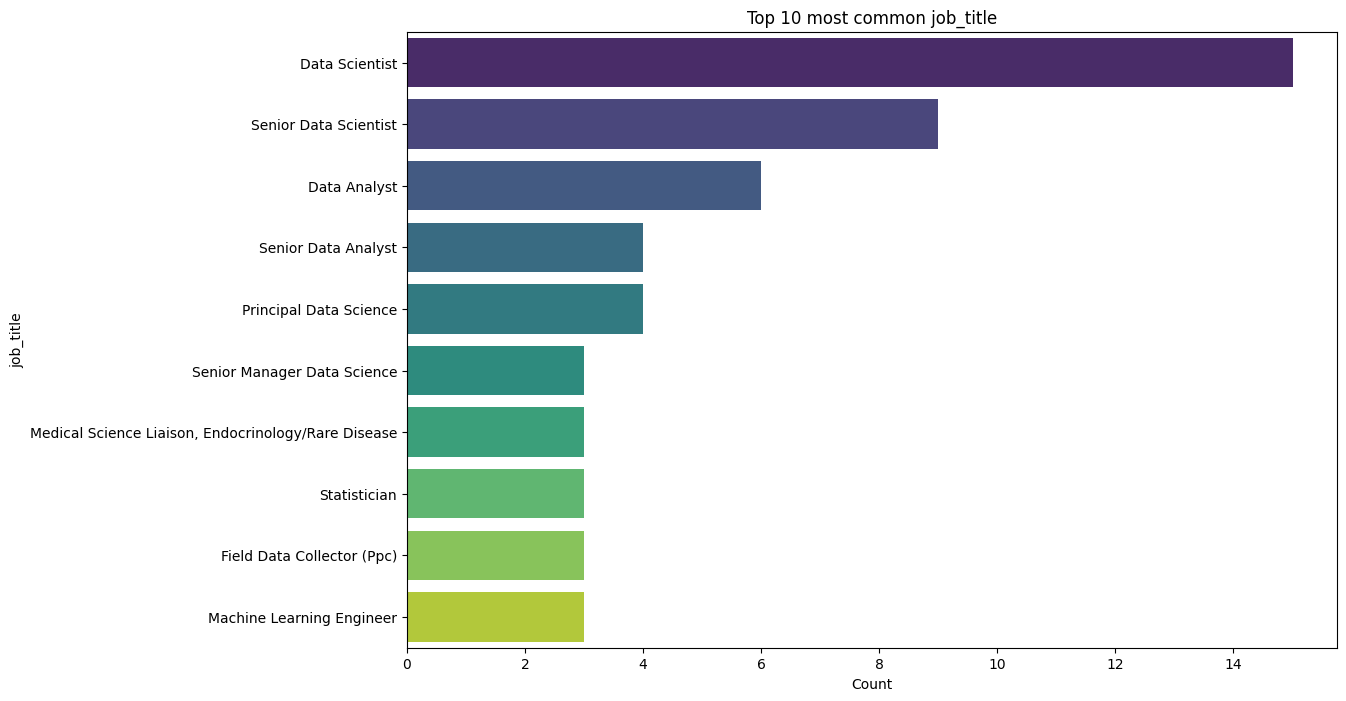

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


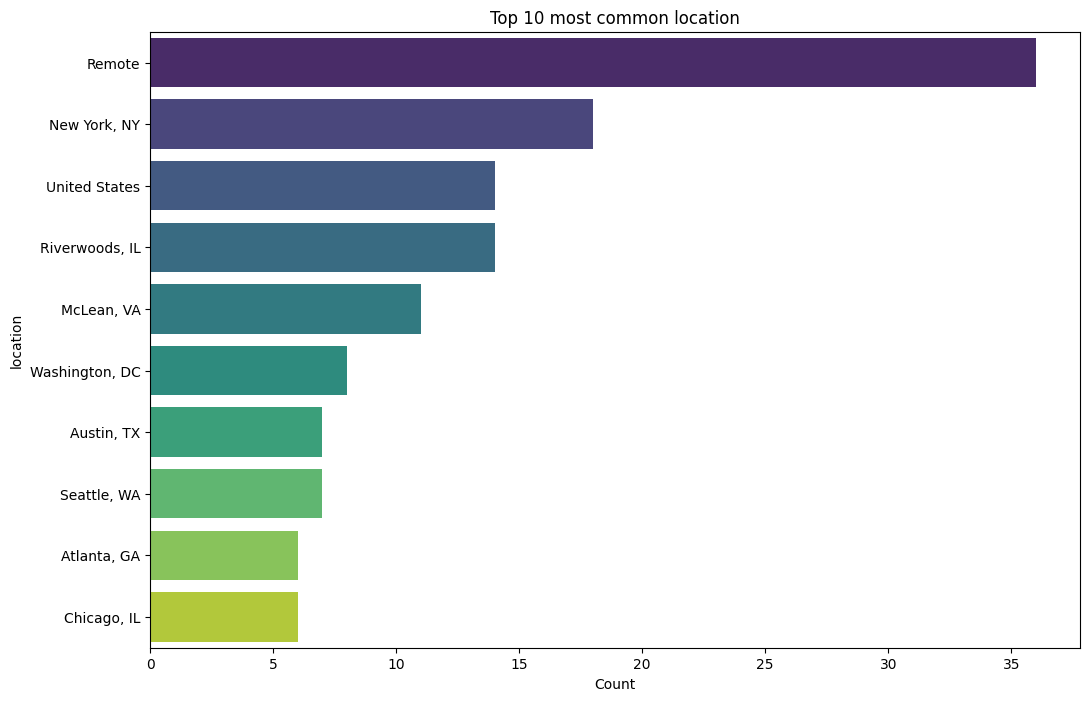

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')
) missing from current font.yecto\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


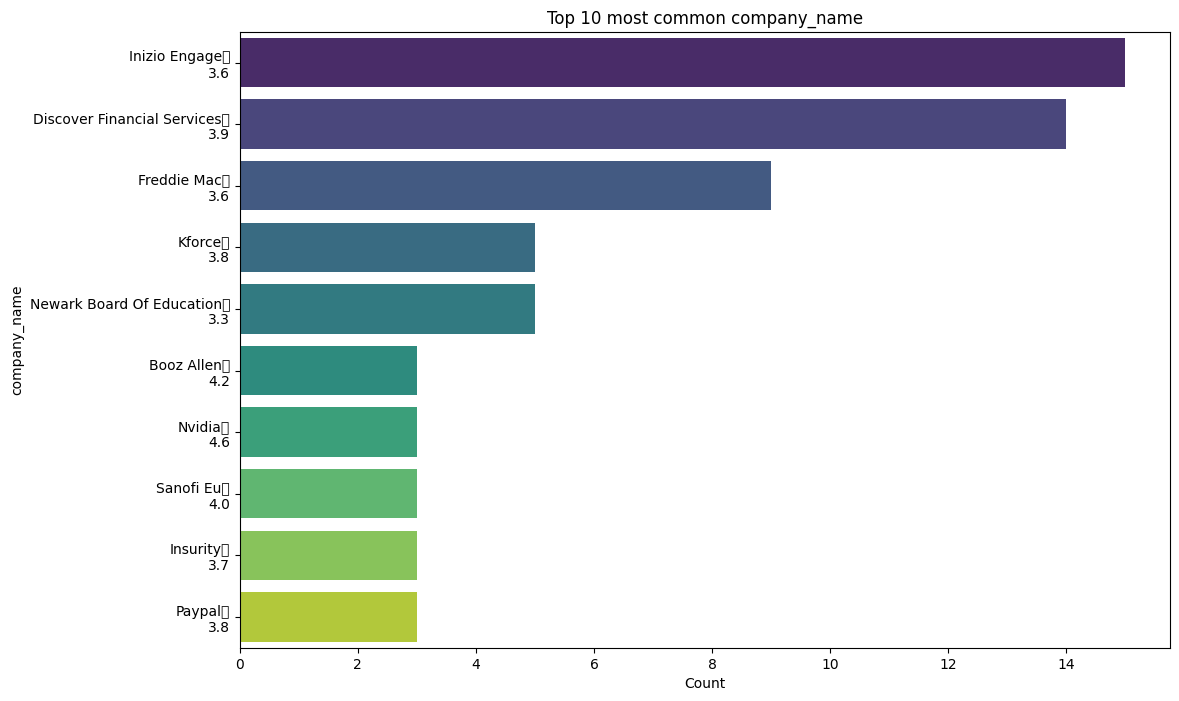

In [38]:
#Revisamos las variables categoricas
categorical_columns = ['job_title', 'location', 'company_name']
for col in categorical_columns:
    plot_top_n_categories(df2, col, n=10)

In [39]:
#Limpiamos la columna del nombre de la empresa
def clean_company_name(name):
    # Usamos una expresión regular para eliminar todo lo que sigue después del nombre
    return re.sub(r'\d+(\.\d+)?$', '', name).strip()

# Aplicamos la función a la columna 'company'
df2['company_name'] = df2['company_name'].apply(clean_company_name)


In [40]:
#Limpiamos la columna de job description
df2['job_description'] = df2['job_description'].str.replace(r'[\n\r]', ' ', regex=True)

In [41]:
# Limpio las columnas industria y sector
df2['industry'] = df2['industry'].fillna('unspecified')
df2['industry'] = df2['industry'].str.replace('--','unspecified')

df2['sector'] = df2['sector'].fillna('unspecified')
df2['sector'] = df2['sector'].str.replace('--','unspecified')

In [42]:
#obtenemos ciudad y estado desde la localidad 
df2[['city', 'state']] = df2['location'].apply(lambda x: pd.Series(split_location(x)))

In [43]:
#Limpiamos la columna job_title 
def replace_specific_patterns(text):
    patterns = [
        r'\$45/hr - ',    # $45/hr - 
        r'24-00049',      # 24-00049
        r'\$40/hr - \$50/hr - ',  # $40/hr - $50/hr - 
        r'\$45/hr - '     # $45/hr - 
    ]
    for pattern in patterns:
        text = re.sub(pattern, ' ', text)
    return text

# Aplica la función a la columna 'Job Title'
df2['job_title'] = df2['job_title'].apply(replace_specific_patterns)

In [44]:
#Agrupamos los titulos de postulacion de empleo
df2['job_simp'] = df2['job_title'].apply(title_simplifier)
df2.job_simp.value_counts()

job_simp
data scientist                                     137
data analyst                                        77
data engineer                                       11
senior data scientist                               10
machine learning engineer                            7
                                                  ... 
employee relations manager                           1
computational engineer (level ii or senior)          1
nc3 systems engineer - omaha                         1
digital marketing specialist (paid media focus)      1
robotics engineer                                    1
Name: count, Length: 108, dtype: int64

In [45]:
#obtenemos el nivel del puesto
df2['seniority'] = df2['job_title'].apply(seniority)
df2.seniority.value_counts()

seniority
junior         235
senior          99
unspecified     18
semi-senior      8
Name: count, dtype: int64

In [46]:
df2.head(10)

job_title  \
0                    Associate Stop Loss Underwriter   
1                            Manager Of Data Science   
2                        Senior Data Product Manager   
3                           Oncology Nurse Navigator   
4  Head Of Artificial Intelligence – Americas Region   
5                                         It Manager   
6  Data Center Services Technician - It, Crypto M...   
7               Data Center Construction Coordinator   
8                              Senior Aiops Engineer   
9        Software Measurement And Estimation Analyst   

                                        company_name        location  \
0                               The Insurance Center    Onalaska, WI   
1                                     Nuvative, Inc.     Wichita, KS   
2                                      Providertrust   Nashville, TN   
3                                      Inizio Engage    Portland, OR   
4                                           Covestro  Pittsburgh, PA   
5                            Western Welding Academy    Gillette, WY   
6                                     Growler Mining  Tuscaloosa, AL   
7                                    Applied Digital   Ellendale, ND   
8                    Health Data Analytics Institute      Dedham, MA   
9  Carnegie Mellon University Software Engineerin...  Pittsburgh, PA   

                                     salary  company_rating  \
0              $57K - $84K (Glassdoor est.)             2.7   
1            $106K - $157K (Glassdoor est.)             3.4   
2            $105K - $141K (Glassdoor est.)             4.2   
3              $90K - $113K (Employer est.)             3.6   
4             $89K - $148K (Glassdoor est.)             3.6   
5                      $90K (Employer est.)             NaN   
6  $22.00 - $28.00 Per Hour (Employer est.)             NaN   
7               $58K - $80K (Employer est.)             NaN   
8             $151K - $175K (Employer est.)             4.4   
9                                       NaN             NaN   

                                     job_description  \
0  The Associate Stop Loss Underwriter is respons...   
1  Job Description  DEPARTMENT  : Analytics  JOB ...   
2  ProviderTrust Summary  ProviderTrust was found...   
3  Cell Therapy Navigators (Oncology Nurse Naviga...   
4  We are Covestro. We are curious. We are courag...   
5  Position Overview:  We are seeking a seasoned ...   
6  Requirements:  Experience with bitcoin mining ...   
7  Job Title: Construction Coordinator  Location:...   
8  Sr. AIOps Engineer  About us  Health Data Anal...   
9  About the role  Do you have experience in soft...   

                                 industry                         sector  \
0  Aseguradoras y sociedades de inversión                        Seguros   
1            Banca y Servicios de crédito                       Finanzas   
2                  Desarrollo de software  Tecnologías de la información   
3                             unspecified                    unspecified   
4       Fabricación de productos químicos                    Manufactura   
5                             unspecified                    unspecified   
6                             unspecified                    unspecified   
7                             unspecified                    unspecified   
8                             unspecified                    unspecified   
9  Universidades y escuelas profesionales                      Educación   

         city state                                           job_simp  \
0    Onalaska    WI                    associate stop loss underwriter   
1     Wichita    KS                                     data scientist   
2   Nashville    TN                        senior data product manager   
3    Portland    OR                           oncology nurse navigator   
4  Pittsburgh    PA  head of artificial intelligence – americas region   
5    Gillette    WY                      

In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        360 non-null    object 
 1   company_name     360 non-null    object 
 2   location         360 non-null    object 
 3   salary           315 non-null    object 
 4   company_rating   305 non-null    float64
 5   job_description  343 non-null    object 
 6   industry         360 non-null    object 
 7   sector           360 non-null    object 
 8   city             360 non-null    object 
 9   state            360 non-null    object 
 10  job_simp         360 non-null    object 
 11  seniority        360 non-null    object 
dtypes: float64(1), object(11)
memory usage: 36.6+ KB


In [48]:
#limpiamos la columna score
df2['company_rating'] = df2.groupby('company_name')['company_rating'].transform(lambda x: x.fillna(x.median()))

print("cantidad de nulos en company score despues de la limpieza: ", df2[df2['company_rating'].isna()].shape[0])

cantidad de nulos en company score despues de la limpieza:  55


c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\lib\nanfunctions.py:1215: R

In [49]:
#los valores que siguen nulos los completo usando KNN
imputer = KNNImputer(n_neighbors=5)
df2['company_rating'] = imputer.fit_transform(df2[['company_rating']])

print("cantidad de nulos en company score despues de la 2da limpieza: ", df2[df2['company_rating'].isna()].shape[0])

cantidad de nulos en company score despues de la 2da limpieza:  0


In [50]:
#limpiamos la columna salario
df2 = extraer_salarios(df2, 'salary')

per_hour_salaries = df2[df2['salary'].str.contains('Per Hour', na=False)]
display(per_hour_salaries.head(10))

job_title  \
6   Data Center Services Technician - It, Crypto M...   
16                            It Site Engineer (Labs)   
22                                    Legal Assistant   
34  Data Scientist - Ai, Nlp, Python, Pytorch, Ten...   
39                               Azure Data Architect   
40  $45/Hr - Ai Trainer - Computer Science Focused...   
77  Business Intelligence Engineer / Data Visualiz...   
78                                 Sr. Data Scientist   
80                              Front Desk/Mail Clerk   
83    Software Engineer For Ai Training Data (Python)   

                  company_name        location  \
6               Growler Mining  Tuscaloosa, AL   
16     Oxford Global Resources   Lexington, MA   
22                 Esquire Law     Phoenix, AZ   
34  Galen Technology Solutions      Denver, CO   
39    Gts Technology Solutions      Austin, TX   
40            Ami Arroyo, Inc.   United States   
77                      Aquent      Dallas, TX   
78                         Ctg      Durham, NC   
80                 Esquire Law     Phoenix, AZ   
83                     G2I Inc          Remote   

                                      salary  company_rating  \
6   $22.00 - $28.00 Per Hour (Employer est.)        3.789508   
16           $50.00 Per Hour (Employer est.)        3.400000   
22  $21.00 - $23.00 Per Hour (Employer est.)        1.000000   
34  $70.00 - $75.00 Per Hour (Employer est.)        3.789508   
39  $70.00 - $80.00 Per Hour (Employer est.)        3.800000   
40           $45.00 Per Hour (Employer est.)        3.789508   
77  $40.00 - $45.00 Per Hour (Employer est.)        4.000000   
78  $61.00 - $76.00 Per Hour (Employer est.)        3.789508   
80           $17.00 Per Hour (Employer est.)        1.000000   
83  $22.00 - $50.00 Per Hour (Employer est.)        3.789508   

                                      job_description  \
6   Requirements:  Experience with bitcoin mining ...   
16  Job Overview:  IT Site Engineer (Lab) will pro...   
22  Pre-Litigation Legal Assistant – Esquire Law  ...   
34  The   location   for this role is a Hybrid rol...   
39  GTS client is looking for a for a 1 year contr...   
40  Are you passionate about advancing the field o...   
77  Our client, one of the largest financial servi...   
78  CTG is seeking to fill a Sr. Data Scientist – ...   
80  Front Desk/Mail Clerk - Esquire Law  About Esq...   
83  Accepted Locations  We are accepting applicant...   

                                   industry                         sector  \
6                               unspecified                    unspecified   
16  Selección de personal y Subcontratación               Recursos humanos   
22                      Bufetes de abogados                          Legal   
34                              unspecified                    unspecified   
39                      Soporte informático  Tecnologías de la información   
40                              unspecified                    unspecified   
77          Consultoría en recursos humanos               Recursos humanos   
78                              unspecified                    unspecified   
80                      Bufetes de abogados                          Legal   
83                              unspecified                    unspecified   

             city          state  \
6      Tuscaloosa             AL   
16      Lexington             MA   
22        Phoenix             AZ   
34         Denver             CO   
39         Austin             TX   
40  United States  United States   
77         Dallas             TX   
78         Durham             NC   
80        Phoenix             AZ   
83         Remote         Remote   

                                             job_simp seniority  min_salary  \
6   data center services technician - it, crypto m...    junior     45760.0   
16                            it site engineer (labs)    junior    104000.0   
22                                    l

In [51]:
df2[df2.salary.isna()].shape[0]

45

In [52]:
# Función para calcular la mediana excluyendo los ceros
def median_without_zeros(x):
    return np.median(x[x != 0])

# Agrupar por 'job_title' y 'seniority' y calcular la mediana excluyendo los ceros
df_grouped = df2.groupby(['job_title', 'seniority'])[['min_salary', 'max_salary', 'avg_salary']].transform(median_without_zeros)

# Reemplazar los ceros solo en las columnas donde sea necesario
df2['min_salary'] = np.where(df2['min_salary'] == 0, df_grouped['min_salary'], df2['min_salary'])
df2['max_salary'] = np.where(df2['max_salary'] == 0, df_grouped['max_salary'], df2['max_salary'])
df2['avg_salary'] = np.where(df2['avg_salary'] == 0, df_grouped['avg_salary'], df2['avg_salary'])

# Verificar si hay aún valores nulos después de la imputación
print(df2.isnull().sum())

# Imputación de valores nulos restantes en las columnas específicas
df2[['min_salary', 'max_salary', 'avg_salary']] = df2[['min_salary', 'max_salary', 'avg_salary']].fillna(df2[['min_salary', 'max_salary', 'avg_salary']].mean())

job_title           0
company_name        0
location            0
salary             45
company_rating      0
job_description    17
industry            0
sector              0
city                0
state               0
job_simp            0
seniority           0
min_salary         36
max_salary         36
avg_salary         36
dtype: int64


c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [53]:
# Verificar estadísticas
df2.describe().round(2)

company_rating  min_salary  max_salary  avg_salary
count          360.00      360.00      360.00      360.00
mean             3.79   102636.63   144237.13   123382.25
std              0.48    37094.96    53655.04    43775.79
min              1.00    29120.00    29120.00    29120.00
25%              3.60    75000.00   105750.00    91500.00
50%              3.79   102636.63   144237.13   123382.25
75%              4.00   120000.00   173250.00   147125.00
max              5.00   250000.00   357000.00   272500.00

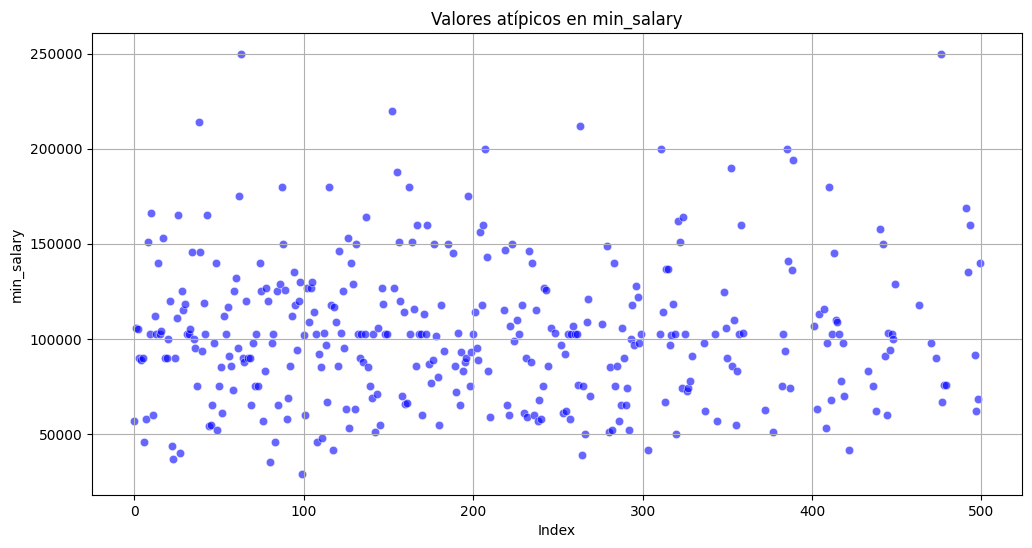

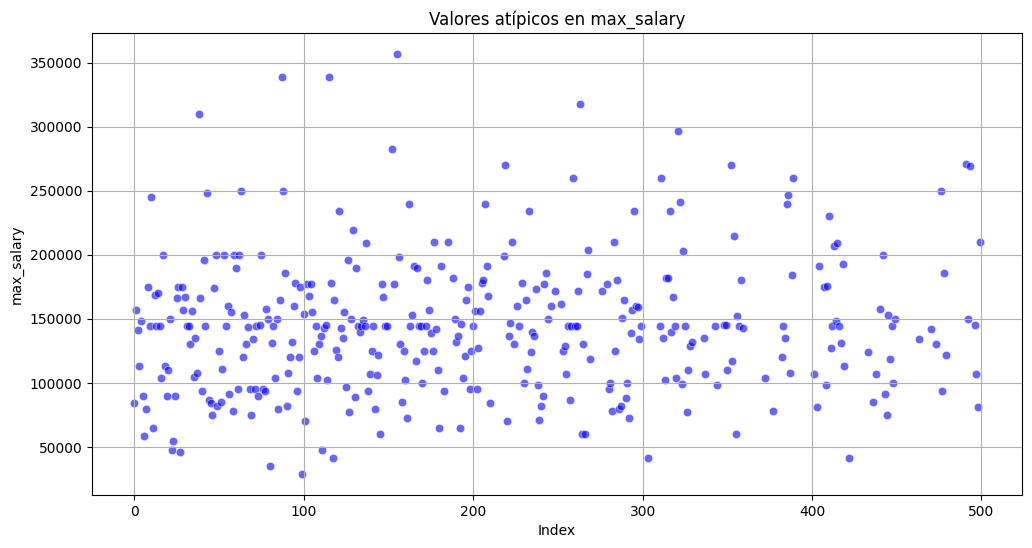

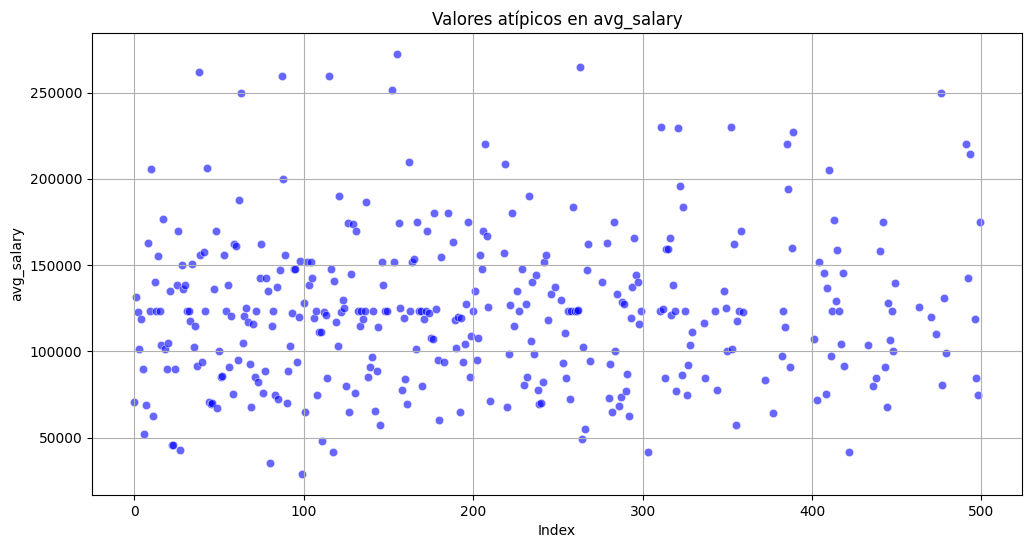

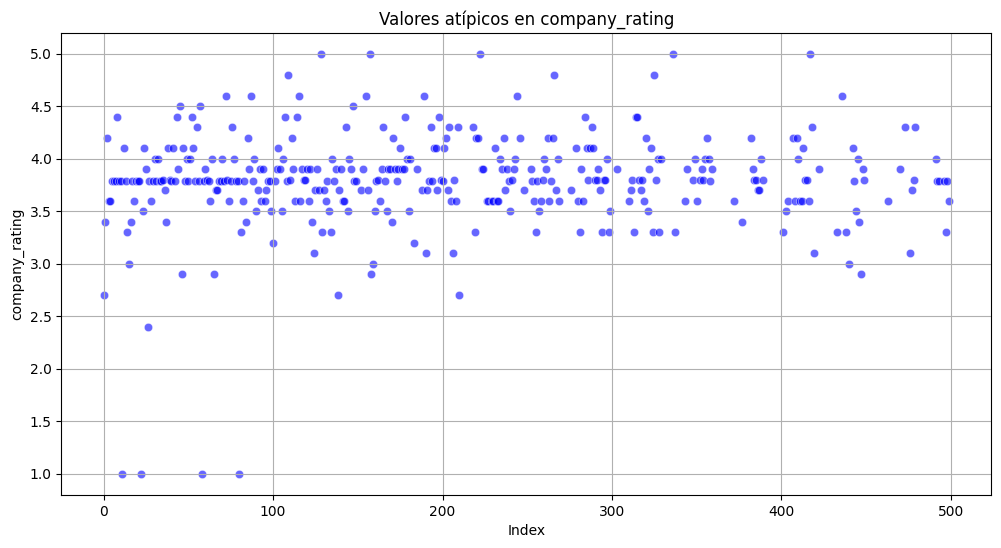

In [54]:
# Visualización de columnas numéricas (buscar outliers)
numeric_columns = ['min_salary', 'max_salary', 'avg_salary','company_rating']
for col in numeric_columns:
    plot_outliers(df2, col, title=f'Valores atípicos en {col}')

In [55]:
#revisamos posibles outliers
df2[df2.avg_salary<60000]

job_title  \
6    Data Center Services Technician - It, Crypto M...   
22                                     Legal Assistant   
23                           Junior Game Mathematician   
27                Violence Prevention Data Coordinator   
80                               Front Desk/Mail Clerk   
99                                 Junior Data Science   
111                          Data Sciences Associate     
117                         Field Data Collector (Ppc)   
145                                       Data Analyst   
264                           Customer Success Manager   
266                      Business Intelligence Analyst   
303                         Field Data Collector (Ppc)   
355                               Data Science Manager   
422                         Field Data Collector (Ppc)   

                    company_name          location  \
6                 Growler Mining    Tuscaloosa, AL   
22                   Esquire Law       Phoenix, AZ   
23       Incredible Technologies  Vernon Hills, IL   
27   Chester Community Coalition       Chester, PA   
80                   Esquire Law       Phoenix, AZ   
99                Tennis Express       Houston, TX   
111                       Alaant    Rensselaer, NY   
117  Mathematica Policy Research         Selma, AL   
145                      Tresume   Jersey City, NJ   
264   Tax Reduction Company Inc,            Remote   
266            Emergent Software            Remote   
303  Mathematica Policy Research        Albany, GA   
355                      Tresume       Ashburn, VA   
422  Mathematica Policy Research    Greenville, MS   

                                       salary  company_rating  \
6    $22.00 - $28.00 Per Hour (Employer est.)        3.789508   
22   $21.00 - $23.00 Per Hour (Employer est.)        1.000000   
23               $37K - $55K (Glassdoor est.)        3.500000   
27                $40K - $46K (Employer est.)        3.789508   
80            $17.00 Per Hour (Employer est.)        1.000000   
99            $14.00 Per Hour (Employer est.)        3.500000   
111           $23.00 Per Hour (Employer est.)        4.200000   
117           $20.00 Per Hour (Employer est.)        3.900000   
145               $55K - $60K (Employer est.)        4.000000   
264               $39K - $60K (Employer est.)        3.789508   
266               $50K - $60K (Employer est.)        4.800000   
303           $20.00 Per Hour (Employer est.)        3.900000   
355               $55K - $60K (Employer est.)        4.000000   
422           $20.00 Per Hour (Employer est.)        3.900000   

                                       job_description  \
6    Requirements:  Experience with bitcoin mining ...   
22   Pre-Litigation Legal Assistant – Esquire Law  ...   
23   Incredible Technologies began as a small busin...   
27   Job Title: Violence Prevention Data Coordinato...   
80   Front Desk/Mail Clerk - Esquire Law  About Esq...   
99   Tennis Express is seeking to hire a full-time,...   
111  Alaant Workforce Solutions has an opening for ...   
117  Mathematica applies expertise at the intersect...   
145  Data analyst:  Job description-  - Collaborati...   
264                                                NaN   
266  ** This is a direct hire position for one of o...   
303  Mathematica applies expertise at the intersect...   
355  **Position Overview:**  As an Entry-Level Data...   
422  Mathematica applies expertise at the intersect...   

                            industry                                sector  \
6                        unspecified                           unspecified   
22               Bufetes de abogados                                 Legal   
23                       Videojuegos  Audiovisual y medios de comunicación   
27                       unspecified                           unspecified   
80               Bufetes de abogados                                 Legal   
99   Tiendas de artículos deportivos        Vent

### Analisis del dataset 
* Como podemos ver hay valores muy bajos y/o muy altos de salarios pero no se consideran outliers ya que son puesto que posiblemente por el nivel de responsabilidad es muy bajo, como por ejemplo puesto correspondientes a "investigacion y desarrollo". 
* Los valores nulos en "company score" fueron imputados de dos maneras: Como primer metodo calculandoi la mediana segun la compañia, ya que puede haber otra postulacion de la misma empresa donde si se especifica el score de la misma y esto nos permite imputar de una manera mas limpia. Como segunda instancia para aquellos valores que siguen nulos utilizamos modelo sencillo de ML para imputar esos valores. 
* De las variables categoricas pudimos obtener mas datos como ciudad y estado segun la columna localidad que obtiene ambos datos, los puestos de trabajos los agrupamos en base a la similitud de los mismos y además obtuvimos el nivel del puesto requerido en base a la información obtenida del titulo de la postulación. 

# **Dataset 3: Glassdoor Salary Cleaned Version**

In [56]:
#Carga del dataset
df3 = pd.read_csv(r'datasets\Glassdoor_Salary_Cleaned_Version.csv')

In [57]:
#revision del dataset
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [58]:
#Limpiamos los nombres de columnas 
df3 = clean_column_names(df3)
df3.info()

# Modificar texto en columnas
df3 = capitalize_column(df3, 'company_name')
df3 = capitalize_column(df3, 'job_title')
df3 = capitalize_column(df3, 'industry')
df3 = capitalize_column(df3, 'sector')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_title          742 non-null    object 
 1   salary_estimate    742 non-null    object 
 2   job_description    742 non-null    object 
 3   rating             742 non-null    float64
 4   company_name       742 non-null    object 
 5   location           742 non-null    object 
 6   headquarters       742 non-null    object 
 7   size               742 non-null    object 
 8   founded            742 non-null    int64  
 9   type_of_ownership  742 non-null    object 
 10  industry           742 non-null    object 
 11  sector             742 non-null    object 
 12  revenue            742 non-null    object 
 13  competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [59]:
#descartamos las columnas que no vamos a utilizar
df3 = df3.drop(['min_salary', 'max_salary','avg_salary','company_txt','type_of_ownership', 'revenue', 'size', 'founded', 'age','job_state','same_state', 'hourly','employer_provided', 'competitors','python_yn','r_yn','spark','aws','excel'], axis=1)

In [60]:
# Verificar valores nulos y duplicados
df3_ndr = null_duplicates_review(df3, 'Glassdoor_Salary_Cleaned_Version')

Valores ausentes en Glassdoor_Salary_Cleaned_Version:
                 Valores ausentes (%)
job_title                         0.0
salary_estimate                   0.0
job_description                   0.0
rating                            0.0
company_name                      0.0
location                          0.0
headquarters                      0.0
industry                          0.0
sector                            0.0

Total duplicados en Glassdoor_Salary_Cleaned_Version: 275



In [61]:
# Identificar duplicados
duplicates = df3[df3.duplicated(keep=False)]
duplicates

job_title  \
2                                       Data Scientist   
3                                       Data Scientist   
5                                       Data Scientist   
6                                       Data Scientist   
7                                       Data Scientist   
..                                                 ...   
737           Sr Scientist, Immuno-Oncology - Oncology   
738                               Senior Data Engineer   
739  Project Scientist - Auton Lab, Robotics Institute   
740                               Data Science Manager   
741          Research Scientist – Security And Privacy   

                 salary_estimate  \
2     $80K-$90K (Glassdoor est.)   
3     $56K-$97K (Glassdoor est.)   
5    $71K-$119K (Glassdoor est.)   
6     $54K-$93K (Glassdoor est.)   
7    $86K-$142K (Glassdoor est.)   
..                           ...   
737  $58K-$111K (Glassdoor est.)   
738  $72K-$133K (Glassdoor est.)   
739   $56K-$91K (Glassdoor est.)   
740  $95K-$160K (Glassdoor est.)   
741  $61K-$126K (Glassdoor est.)   

                                       job_description  rating  \
2    KnowBe4, Inc. is a high growth information sec...     4.8   
3    *Organization and Job ID**\r\nJob ID: 310709\r...     3.8   
5    CyrusOne is seeking a talented Data Scientist ...     3.4   
6    Job Description\r\n\r\n**Please only local can...     4.1   
7    Advanced Analytics – Lead Data Scientist\r\nOv...     3.8   
..                                                 ...     ...   
737  Site Name: USA - Massachusetts - Cambridge\r\n...     3.9   
738  THE CHALLENGE\r\nEventbrite has a world-class ...     4.4   
739  The Auton Lab at Carnegie Mellon University is...     2.6   
740  Data Science ManagerResponsibilities:\r\n\r\nO...     3.2   
741  Returning Candidate? Log back in to the Career...     3.6   

                              company_name         location  \
2                           Knowbe4\r\n4.8   Clearwater, FL   
3                              Pnnl\r\n3.8     Richland, WA   
5                          Cyrusone\r\n3.4       Dallas, TX   
6                Clearone Advantage\r\n4.1    Baltimore, MD   
7                        Logic20/20\r\n3.8     San Jose, CA   
..                                     ...              ...   
737                             Gsk\r\n3.9    Cambridge, MA   
738                      Eventbrite\r\n4.4    Nashville, TN   
739  Software Engineering Institute\r\n2.6   Pittsburgh, PA   
740                    Numeric, Llc\r\n3.2    Allentown, PA   
741    Riverside Research Institute\r\n3.6  Beavercreek, OH   

                  headquarters                   industry  \
2               Clearwater, FL          Security Services   
3                 Richland, WA                     Energy   
5                   Dallas, TX                Real Estate   
6                Baltimore, MD      Banks & Credit Unions   
7                  Seattle, WA                 Consulting   
..                         ...                        ...   
737  Brentford, United Kingdom  Biotech & Pharmaceuticals   
738          San Francisco, CA                   Internet   
739             Pittsburgh, PA    Colleges & Universities   
740            Chadds Ford, PA     Staffing & Outsourcing   
741              Arlington, VA           Federal Agencies   

                           sector  
2               Business Services  
3    Oil, Gas, Energy & Utilities  
5                     Real Estate  
6                         Finance  
7               Business Services  
..                            ...  
737     Biotech & Pharmaceuticals  
738        Information Technology  
739                     Education  
740             Business Services  
741                    Government  

[496 rows x 9 columns]

In [62]:
# Eliminamos los duplicados
df3.drop_duplicates(inplace=True)
print(f"Total duplicados después de la limpieza: {df3.duplicated().sum()}")

Total duplicados después de la limpieza: 0


In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 0 to 735
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        467 non-null    object 
 1   salary_estimate  467 non-null    object 
 2   job_description  467 non-null    object 
 3   rating           467 non-null    float64
 4   company_name     467 non-null    object 
 5   location         467 non-null    object 
 6   headquarters     467 non-null    object 
 7   industry         467 non-null    object 
 8   sector           467 non-null    object 
dtypes: float64(1), object(8)
memory usage: 36.5+ KB


c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


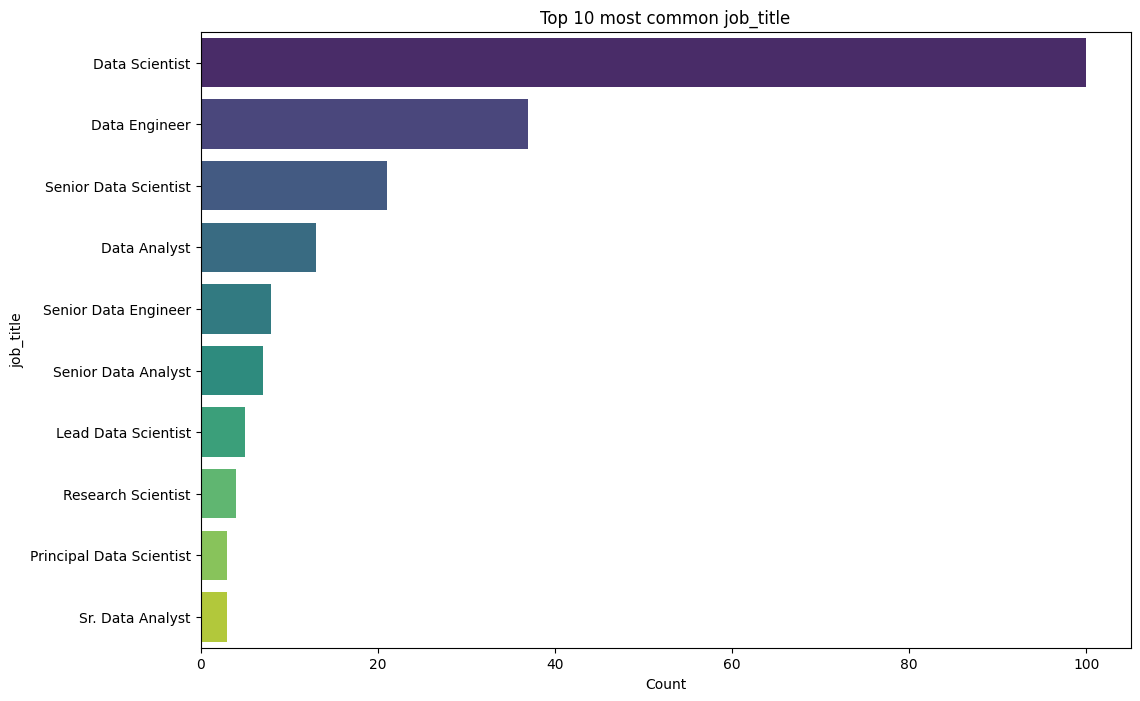

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


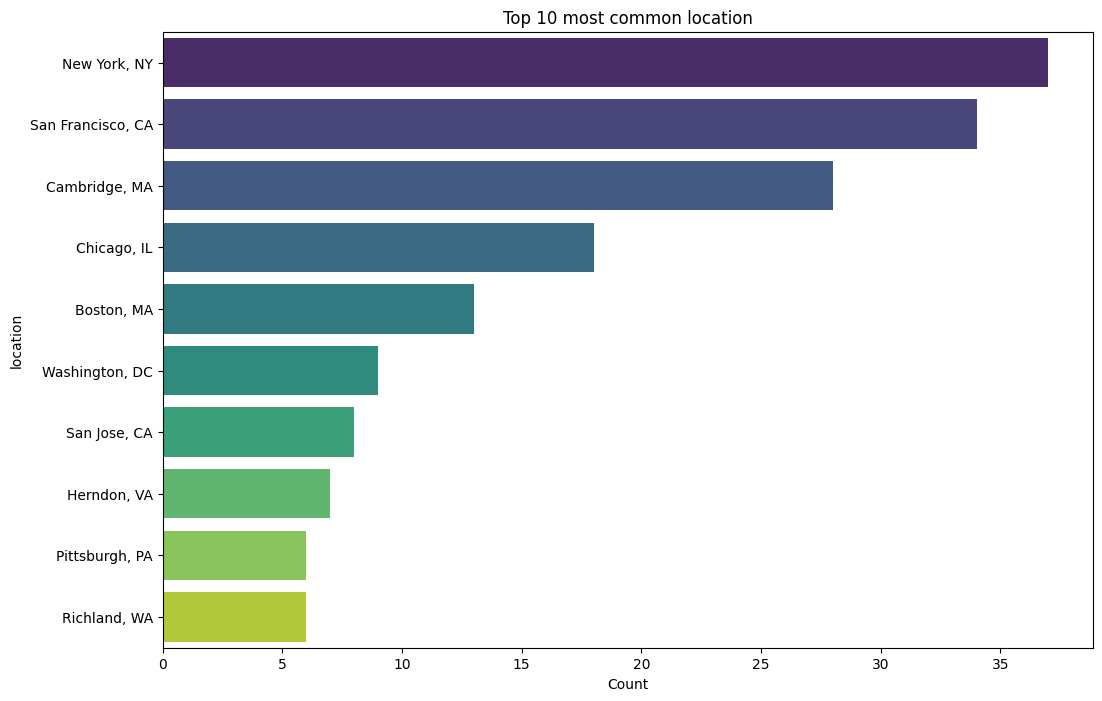

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


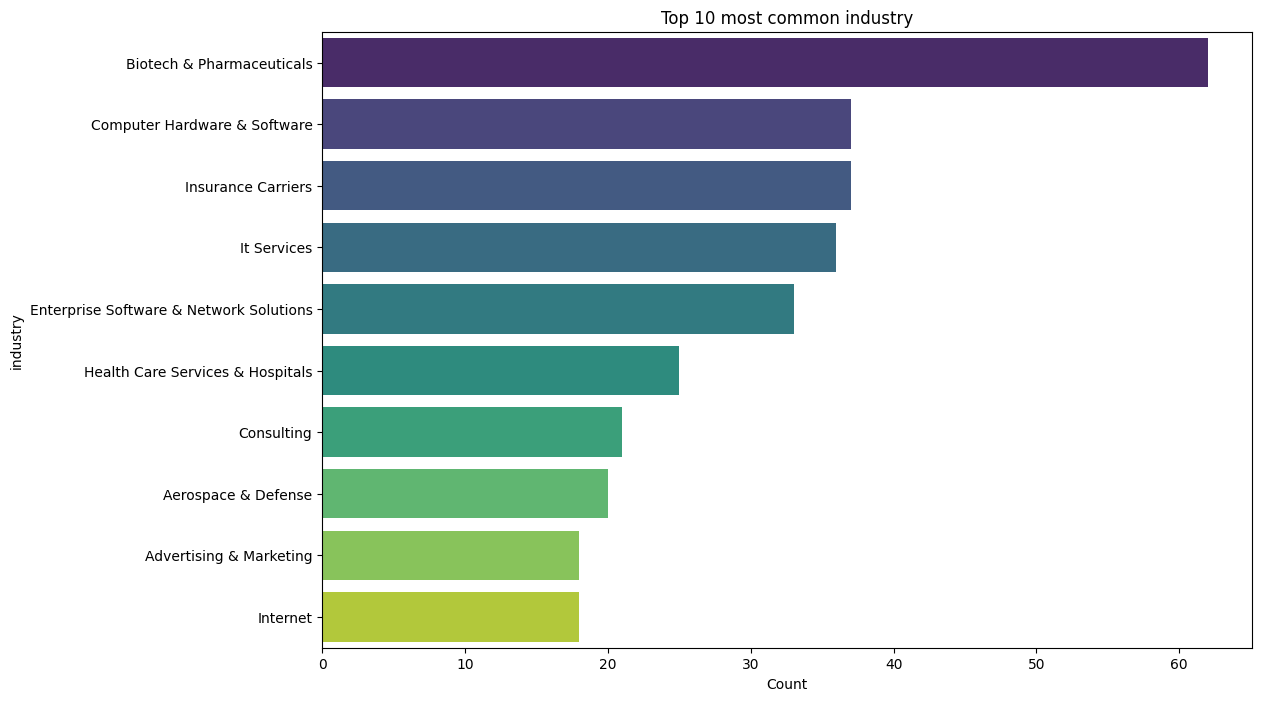

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


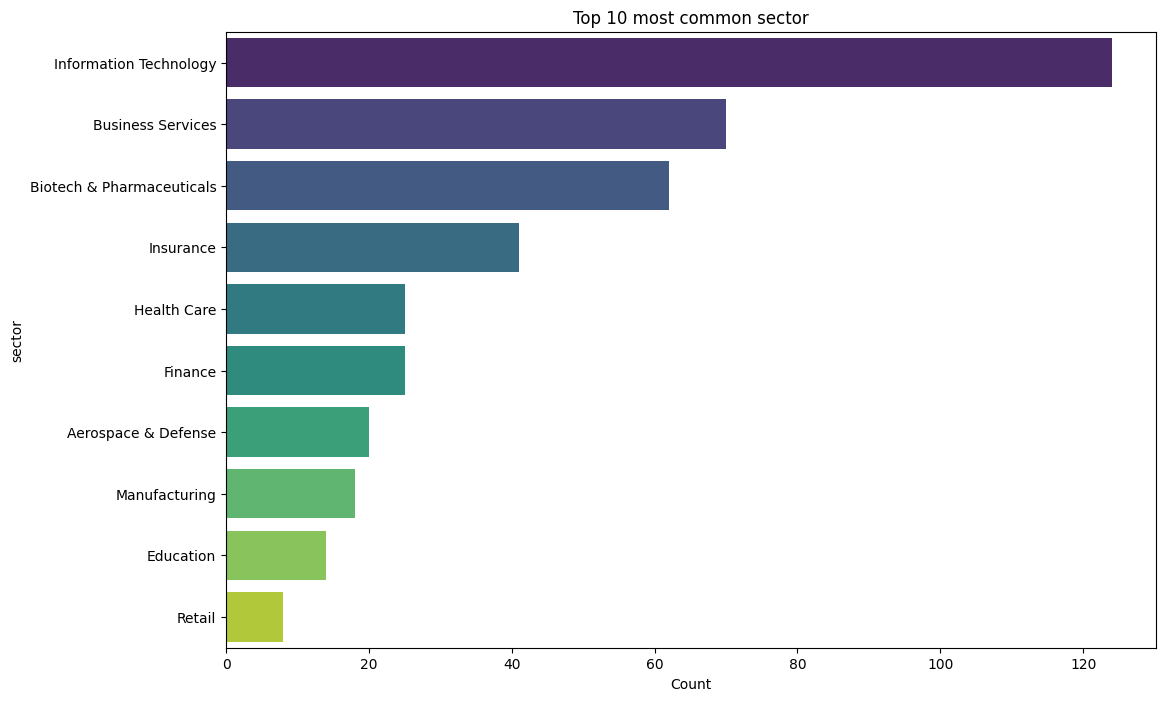

In [64]:
#Revisamos las variables categoricas de mayor interes
categorical_columns = ['job_title', 'location', 'industry', 'sector']
for col in categorical_columns:
    plot_top_n_categories(df3, col, n=10)

In [65]:
#Obtenemos ciudad y estado desde la columna localidad
df3[['city', 'state']] = df3['location'].apply(lambda x: pd.Series(split_location(x)))

In [66]:
#Limpiamos la columna de nombre de la empresa
def clean_company_name(name):
    # Usamos una expresión regular para eliminar todo lo que sigue después del nombre
    return re.sub(r'\d+(\.\d+)?$', '', name).strip()

# Aplicamos la función a la columna 'company'
df3['company_name'] = df3['company_name'].apply(clean_company_name)

In [67]:
#Columna Job Description
df3['job_description'] = df3['job_description'].str.replace(r'[\n\r]', ' ', regex=True)

In [68]:
# Limpiamos las columnas industria y sector
df3['industry'] = df3['industry'].fillna('unspecified')
df3['industry'] = df3['industry'].str.replace('-1','unspecified')

df3['sector'] = df3['sector'].fillna('unspecified')
df3['sector'] = df3['sector'].str.replace('-1','unspecified')

In [69]:
#Agrupamos los titulos de empleo por similitud 
df3['job_simp'] = df3['job_title'].apply(title_simplifier)
df3.job_simp.value_counts()

job_simp
data scientist                                        281
data analyst                                           79
data engineer                                          75
senior data scientist                                  14
machine learning engineer                               6
data modeler - data solutions engineer                  1
senior engineer, data management engineering            1
product manager/data evangelist                         1
data modeler (analytical systems)                       1
technology-minded, data professional opportunities      1
data operations lead                                    1
enterprise architect, data                              1
director - data, privacy and ai governance              1
software engineer                                       1
data modeler                                            1
data management specialist                              1
data architect / data modeler                           1
Name:

In [70]:
#obtenemos el nivel del puesto
df3['seniority'] = df3['job_title'].apply(seniority)
df3.seniority.value_counts()

seniority
junior         311
senior         125
unspecified     23
semi-senior      8
Name: count, dtype: int64

In [71]:
df3.head()

job_title              salary_estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     job_description  rating  \
0  Data Scientist  Location: Albuquerque, NM  Edu...     3.8   
1  What You Will Do:    I. General Summary    The...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**  Job ID: 310709    ...     3.8   
4  Data Scientist  Affinity Solutions / Marketing...     2.9   

                            company_name         location    headquarters  \
0                      Tecolote Research  Albuquerque, NM      Goleta, CA   
1  University Of Maryland Medical System    Linthicum, MD   Baltimore, MD   
2                                Knowbe4   Clearwater, FL  Clearwater, FL   
3                                   Pnnl     Richland, WA    Richland, WA   
4                     Affinity Solutions     New York, NY    New York, NY   

                           industry                        sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

          city state        job_simp seniority  
0  Albuquerque    NM  data scientist    junior  
1    Linthicum    MD  data scientist    junior  
2   Clearwater    FL  data scientist    junior  
3     Richland    WA  data scientist    junior  
4     New York    NY  data scientist    junior

In [72]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 0 to 735
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        467 non-null    object 
 1   salary_estimate  467 non-null    object 
 2   job_description  467 non-null    object 
 3   rating           467 non-null    float64
 4   company_name     467 non-null    object 
 5   location         467 non-null    object 
 6   headquarters     467 non-null    object 
 7   industry         467 non-null    object 
 8   sector           467 non-null    object 
 9   city             467 non-null    object 
 10  state            467 non-null    object 
 11  job_simp         467 non-null    object 
 12  seniority        467 non-null    object 
dtypes: float64(1), object(12)
memory usage: 51.1+ KB


In [73]:
#limpiamos la columna salario
df3 = extraer_salarios(df3, 'salary_estimate')

per_hour_salaries = df3[df3['salary_estimate'].str.contains('Per Hour', na=False)]
display(per_hour_salaries.head())

job_title  \
165                              Medical Lab Scientist   
177                Med Tech/Lab Scientist - Laboratory   
197                       Medical Laboratory Scientist   
202          Med Tech/Lab Scientist- South Coastal Lab   
210  Medical Technologist / Clinical Laboratory Sci...   

                      salary_estimate  \
165  $17-$24 Per Hour(Glassdoor est.)   
177  $21-$34 Per Hour(Glassdoor est.)   
197  $18-$25 Per Hour(Glassdoor est.)   
202  $21-$34 Per Hour(Glassdoor est.)   
210  $15-$25 Per Hour(Glassdoor est.)   

                                       job_description  rating  \
165  Overview    About      Tower Health is a stron...     3.6   
177  Evening: 3P-1130P or Night Shift 11P-730A    I...     3.6   
197  Description  Medical Laboratory Scientist - Te...     4.0   
202  Day Shift: 7A-330P. Holidays and every other w...     3.6   
210  The incumbent performs a broad range of labora...     3.4   

                                         company_name          location  \
165                                      Tower Health  West Reading, PA   
177                                  Beebe Healthcare         Lewes, DE   
197                     Texas Health Huguley Hospital      Burleson, TX   
202                                  Beebe Healthcare     Millville, DE   
210  Veterans Affairs, Veterans Health Administration   New Orleans, LA   

       headquarters                          industry       sector  \
165     Reading, PA  Health Care Services & Hospitals  Health Care   
177       Lewes, DE  Health Care Services & Hospitals  Health Care   
197   Arlington, TX  Health Care Services & Hospitals  Health Care   
202       Lewes, DE  Health Care Services & Hospitals  Health Care   
210  Washington, DC                  Federal Agencies   Government   

             city state        job_simp seniority  min_salary  max_salary  \
165  West Reading    PA  data scientist    junior     35360.0     49920.0   
177         Lewes    DE  data scientist    junior     43680.0     70720.0   
197      Burleson    TX  data scientist    junior     37440.0     52000.0   
202     Millville    DE  data scientist    junior     43680.0     70720.0   
210   New Orleans    LA  data scientist    junior     31200.0     52000.0   

     avg_salary  
165     42640.0  
177     57200.0  
197     44720.0  
202     57200.0  
210     41600.0

In [74]:
# Función para calcular la mediana excluyendo los ceros
def median_without_zeros(x):
    return np.median(x[x != 0])

# Agrupar por 'job_title' y 'seniority' y calcular la mediana excluyendo los ceros
df_grouped = df3.groupby(['job_title', 'seniority'])[['min_salary', 'max_salary', 'avg_salary']].transform(median_without_zeros)

# Reemplazar los ceros solo en las columnas donde sea necesario
df3['min_salary'] = np.where(df3['min_salary'] == 0, df_grouped['min_salary'], df3['min_salary'])
df3['max_salary'] = np.where(df3['max_salary'] == 0, df_grouped['max_salary'], df3['max_salary'])
df3['avg_salary'] = np.where(df3['avg_salary'] == 0, df_grouped['avg_salary'], df3['avg_salary'])

# Verificar si hay aún valores nulos después de la imputación
print(df3.isnull().sum())

# Imputación de valores nulos restantes en las columnas específicas
df3[['min_salary', 'max_salary', 'avg_salary']] = df3[['min_salary', 'max_salary', 'avg_salary']].fillna(df3[['min_salary', 'max_salary', 'avg_salary']].mean())

job_title          0
salary_estimate    0
job_description    0
rating             0
company_name       0
location           0
headquarters       0
industry           0
sector             0
city               0
state              0
job_simp           0
seniority          0
min_salary         1
max_salary         1
avg_salary         1
dtype: int64


c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [75]:
# Verificar estadísticas
df3.describe().round(2)

rating  min_salary  max_salary  avg_salary
count  467.00      467.00      467.00      467.00
mean     3.65    74843.18   128471.93   101657.55
std      0.81    29888.97    43809.03    36304.95
min     -1.00    15000.00    16000.00    15500.00
25%      3.40    54000.00    98000.00    76500.00
50%      3.70    71000.00   124000.00    98000.00
75%      4.10    90500.00   150000.00   121000.00
max      5.00   202000.00   306000.00   254000.00

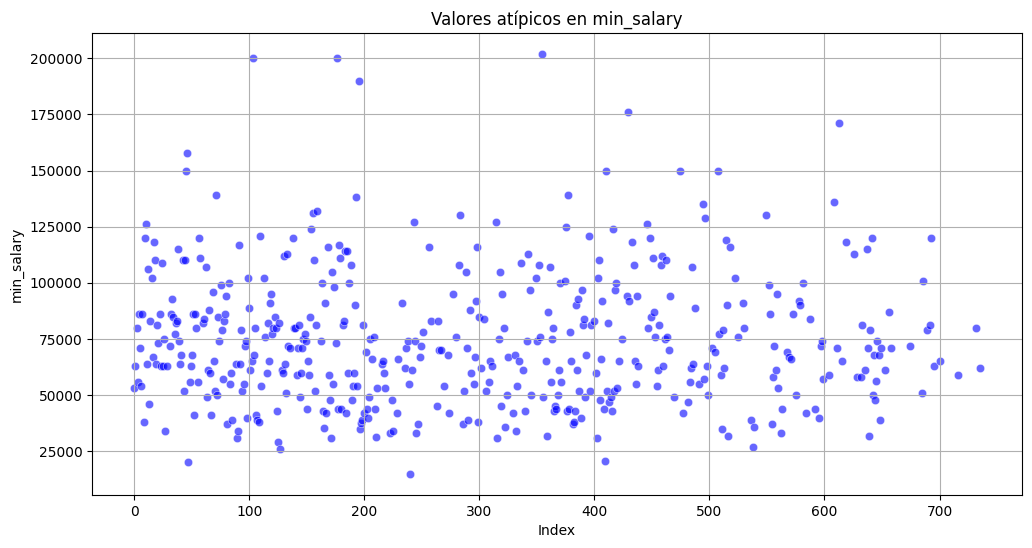

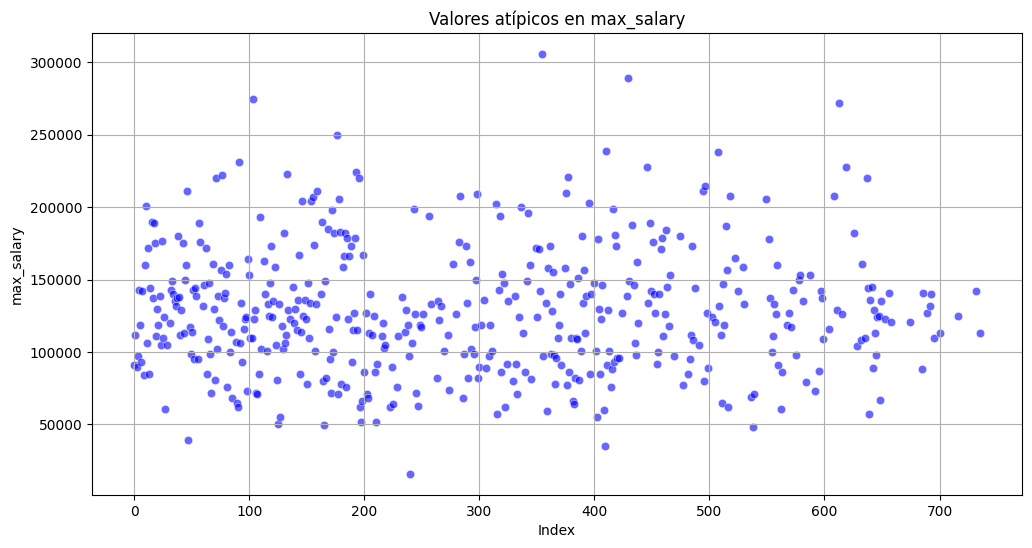

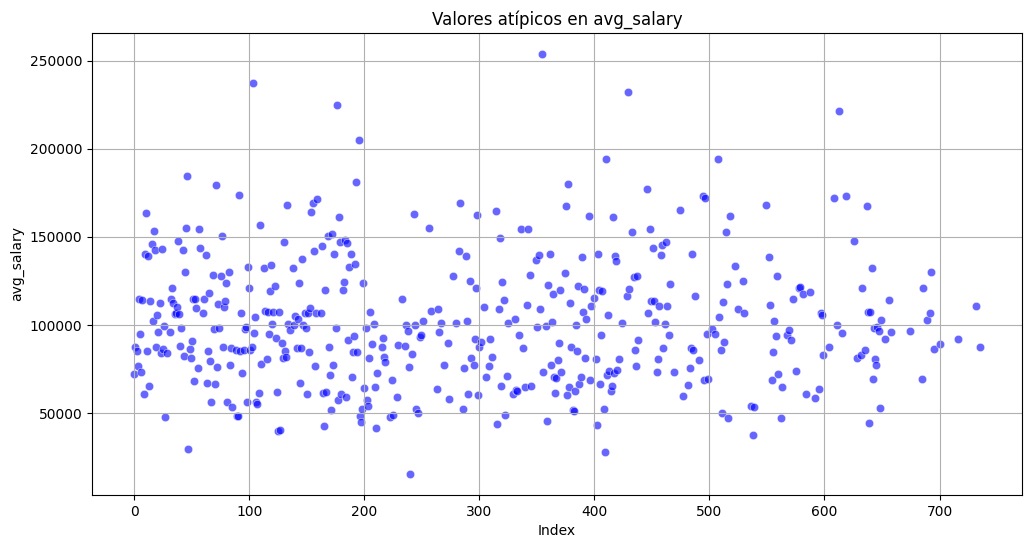

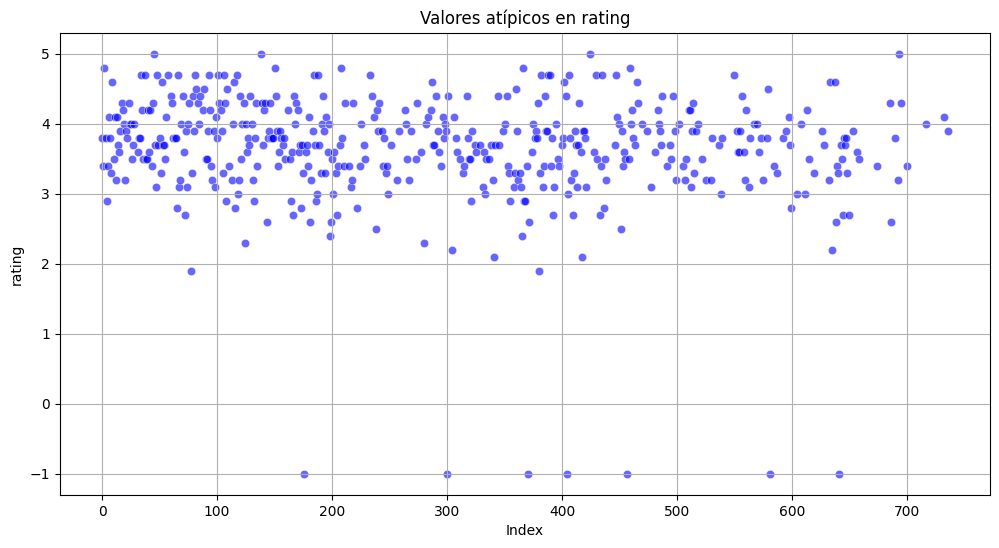

In [76]:
# Visualización de columnas numéricas (buscar outliers)
numeric_columns = ['min_salary', 'max_salary', 'avg_salary','rating']
for col in numeric_columns:
    plot_outliers(df3, col, title=f'Valores atípicos en {col}')

In [77]:
#revisamos posibles outliers en salario
df3[df3.avg_salary<50000]

job_title  \
27                              Associate Data Analyst   
47                              Associate Data Analyst   
89                          Data Management Specialist   
90                             E-Commerce Data Analyst   
125                                  Project Scientist   
127                             Data Analytics Manager   
165                              Medical Lab Scientist   
196                             Marketing Data Analyst   
197                       Medical Laboratory Scientist   
210  Medical Technologist / Clinical Laboratory Sci...   
222                                       Data Analyst   
225                                       Data Analyst   
240                                     Data Scientist   
315                                Market Data Analyst   
322                             Marketing Data Analyst   
359  Associate Data Analyst- Graduate Development P...   
402        Analytics - Business Assurance Data Analyst   
409  Senior Operations Data Analyst, Call Center Op...   
516                                  Lead Data Analyst   
538                              Clinical Data Analyst   
562                          Supply Chain Data Analyst   
639       Foundational Community Supports Data Analyst   

                      salary_estimate  \
27         $34K-$61K (Glassdoor est.)   
47         $20K-$39K (Glassdoor est.)   
89         $31K-$65K (Glassdoor est.)   
90         $34K-$62K (Glassdoor est.)   
125        $29K-$50K (Glassdoor est.)   
127        $26K-$55K (Glassdoor est.)   
165  $17-$24 Per Hour(Glassdoor est.)   
196        $35K-$62K (Glassdoor est.)   
197  $18-$25 Per Hour(Glassdoor est.)   
210  $15-$25 Per Hour(Glassdoor est.)   
222        $33K-$62K (Glassdoor est.)   
225        $34K-$64K (Glassdoor est.)   
240          $15K-$16K(Employer est.)   
315        $31K-$57K (Glassdoor est.)   
322        $36K-$62K (Glassdoor est.)   
359        $32K-$59K (Glassdoor est.)   
402        $31K-$55K (Glassdoor est.)   
409  $10-$17 Per Hour(Glassdoor est.)   
516        $32K-$62K (Glassdoor est.)   
538        $27K-$48K (Glassdoor est.)   
562        $33K-$61K (Glassdoor est.)   
639        $32K-$57K (Glassdoor est.)   

                                       job_description  rating  \
27   Friday, January 17, 2020    Our Enterprise Dat...     3.7   
47   Intrado is looking for an Associate Data Analy...     3.1   
89   Location: Huntsville, AL    Clearance: Secret ...     4.5   
90   We have an exciting opportunity forYOU to join...     3.5   
125  Project Scientist    Job Details  Level  Entry...     4.0   
127  About You:  We are looking for a dedicated and...     3.8   
165  Overview    About      Tower Health is a stron...     3.6   
196  Under direct supervision of the Director of Da...     3.6   
197  Description  Medical Laboratory Scientist - Te...     4.0   
210  The incumbent performs a broad range of labora...     3.4   
222  Wednesday, March 11, 2020      Community Actio...     2.8   
225  Data Analyst    Do you love data? Do you thriv...     4.0   
240  Learn and work on meaningful initiatives with ...     3.9   
315  We are seeking a creative, data driven Marketi...     3.4   
322  For more than 80 years, Citadel has steadily g...     3.9   
359  Overview      National Interstate is a member ...     3.3   
402  Analytics - Business Assurance Data Analyst (C...     4.6   
409  Summary      Independent contributor role that...     2.7   
516  JOB DESCRIPTION:    Signpost is looking for a ...     3.9   
538  Job Summary      Greenway Health is actively s...     3.0   
562  SUMMARY    The Supply Chain Data Analyst analy...     3.1   
639  Job Title: Foundational Community Supports Dat...     3.4   

                                         company_name             location  \
27                        The Hanover Insurance Group        Worcester, MA   
47                                            Intrado         Longmont, CO   
89           

In [78]:
#revisamos los outliers en rating 
df3[df3.rating<0]

job_title  \
176  Principal Data Scientist With Over 10 Years Ex...   
300                               Data Operations Lead   
370    Research Scientist, Immunology - Cancer Biology   
404  Senior Scientist, Cell Pharmacology/Assay Deve...   
456                                     Data Scientist   
581      Scientist – Cancer Discovery, Molecular Assay   
641  Principal Research Scientist/Team Lead, Medici...   

                          salary_estimate  \
176  Employer Provided Salary:$200K-$250K   
300    Employer Provided Salary:$85K-$90K   
370  Employer Provided Salary:$100K-$140K   
404  Employer Provided Salary:$110K-$130K   
456           $81K-$140K (Glassdoor est.)   
581  Employer Provided Salary:$100K-$135K   
641  Employer Provided Salary:$120K-$145K   

                                       job_description  rating  \
176  Position Title: Principal Data Scientist  Loca...    -1.0   
300  Data Operations Lead  Location: Flexible thoug...    -1.0   
370  Research Scientist, Immunology - Cancer Biolog...    -1.0   
404  Senior Scientist, Cell Pharmacology/Assay Deve...    -1.0   
456  As a Data Scientist, you will play a critical ...    -1.0   
581  Scientist – Cancer Discovery, Molecular Assay ...    -1.0   
641  Principal Research Scientist/Team Lead, Medici...    -1.0   

                company_name           location       headquarters  \
176        Ca-One Tech Cloud  San Francisco, CA        Fremont, CA   
300                     Muso  San Francisco, CA  San Francisco, CA   
370               Kronos Bio      Cambridge, MA      San Mateo, CA   
404               Kronos Bio      Cambridge, MA      San Mateo, CA   
456                     Alin       New York, NY       Noida, India   
581  Monte Rosa Therapeutics      Cambridge, MA                 -1   
641               Kronos Bio      Cambridge, MA      San Mateo, CA   

        industry                  sector           city state  \
176  It Services  Information Technology  San Francisco    CA   
300  unspecified             unspecified  San Francisco    CA   
370  unspecified             unspecified      Cambridge    MA   
404  unspecified             unspecified      Cambridge    MA   
456  unspecified             unspecified       New York    NY   
581  unspecified             unspecified      Cambridge    MA   
641  unspecified             unspecified      Cambridge    MA   

                  job_simp seniority  min_salary  max_salary  avg_salary  
176  senior data scientist    senior    200000.0    250000.0    225000.0  
300   data operations lead    senior     85000.0     90000.0     87500.0  
370         data scientist    junior    100000.0    140000.0    120000.0  
404         data scientist    senior    110000.0    130000.0    120000.0  
456         data scientist    junior     81000.0    140000.0    110500.0  
581         data scientist    junior    100000.0    135000.0    117500.0  
641  senior data scientist    senior    120000.0    145000.0    132500.0

In [79]:
#limpiamos la columna rating ya que tiene valores -1 que representan a valores nulos
df3['rating'] = df3['rating'].replace(-1, np.nan)


df3['rating'] = df3['rating'].transform(lambda x: x.fillna(x.median()))

print("cantidad de nulos en company score despues de la limpieza: ", df3[df3['rating'].isna()].shape[0])

cantidad de nulos en company score despues de la limpieza:  0


In [80]:
df3.describe()

rating     min_salary     max_salary     avg_salary
count  467.000000     467.000000     467.000000     467.000000
mean     3.723019   74843.175966  128471.931330  101657.553648
std      0.564451   29888.974875   43809.028604   36304.946778
min      1.900000   15000.000000   16000.000000   15500.000000
25%      3.400000   54000.000000   98000.000000   76500.000000
50%      3.750000   71000.000000  124000.000000   98000.000000
75%      4.100000   90500.000000  150000.000000  121000.000000
max      5.000000  202000.000000  306000.000000  254000.000000

### Analisis del dataset 
* Este dataset tenia una complejidad de valores duplicados, ademas al tener una limpieza previa con valores imputados como "-1" para identificar a los valores vacios podria causar sesgos en las medidas estadisticas.  
* En el salio hay valores muy bajos y/o muy altos de salarios pero no se consideran outliers ya que son salarios acordes al puesto como tal de la publicacion de empleo. 
* Los valores nulos en "company score" era muy pocos, por lo que fueron imputados por la media.
* De las variables categoricas pudimos obtener mas datos como ciudad y estado segun la columna localidad que obtiene ambos datos, los puestos de trabajos los agrupamos en base a la similitud de los mismos y además obtuvimos el nivel del puesto requerido en base a la información obtenida del titulo de la postulación. 

# **Dataset 4: Cleaned Dataset Canada**

In [81]:
#Carga del dataset
df4 = pd.read_csv(r'datasets\Cleaned_Dataset_Canada.csv')


In [82]:
#revision del dataset
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Job Title      1796 non-null   object 
 1   Job Info       1796 non-null   object 
 2   Position       1796 non-null   object 
 3   Employer       1796 non-null   object 
 4   City           1796 non-null   object 
 5   Province       1796 non-null   object 
 6   Skill          1796 non-null   object 
 7   Seniority      1796 non-null   object 
 8   Work Type      1796 non-null   object 
 9   Industry Type  1796 non-null   object 
 10  Min_Salary     1796 non-null   float64
 11  Max_Salary     1796 non-null   float64
 12  Avg_Salary     1796 non-null   float64
dtypes: float64(3), object(10)
memory usage: 182.5+ KB
None


In [83]:
#Limpiamos los nombres de las columnas 
df4 = clean_column_names(df4)
df4.info()

# Modificar texto en columnas
df4 = capitalize_column(df4, 'employer')
df4 = capitalize_column(df4, 'job_info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title      1796 non-null   object 
 1   job_info       1796 non-null   object 
 2   position       1796 non-null   object 
 3   employer       1796 non-null   object 
 4   city           1796 non-null   object 
 5   province       1796 non-null   object 
 6   skill          1796 non-null   object 
 7   seniority      1796 non-null   object 
 8   work_type      1796 non-null   object 
 9   industry_type  1796 non-null   object 
 10  min_salary     1796 non-null   float64
 11  max_salary     1796 non-null   float64
 12  avg_salary     1796 non-null   float64
dtypes: float64(3), object(10)
memory usage: 182.5+ KB


In [84]:

# Corregimos errores de codificación en ciudad y job_info
df4['city'] = df4['city'].replace('MontrÃƒÂ©al','Montreal')

replacements = {
    'Ã¢Â‚¬Â€Œ': '-',  
    'Ãƒâ¢Ã¢Â€Šâ¬Ã¢Â‚¬Å“':'–',
    'Ãƒâ¢Ã¢Â€Šâ¬Ã¢Â‚¬':'–',
    'Ãƒâ':'',
    'Sãƒâ©Nior': 'Sénior',
    'Spãƒâ©Cialisãƒâ©': 'Spécialisé',
    'Cybersãƒâ©Curitãƒâ©': 'Cybersécurité',
    'Dã¢Â‚¬Â„¢éTudes': 'D’études',
    'Kãƒâ¶Rber': 'Körber',
    'Donnãƒæ’Ã‚Â©Es': 'Données',
    'Chaãƒâ®Ne': 'Chaîne',
    'Systãƒâ¨Mes': 'Systèmes',
    'Ãƒæ’Ã‚Â\xa0': 'À',
    'Sãƒæ’Ã‚Â©Nior': 'Sénior',
    'Chaãƒæ’Ã‚Â®Ne': 'Chaîne',
    'Ãƒæ’Ã‚Â©Conomique': 'Économique'   
}

df4['job_info'] = df4['job_info'].replace(replacements, regex=True)

In [85]:
# Verificamos valores nulos y duplicados
df4_ndr = null_duplicates_review(df4, 'Cleaned Dataset Canada')

Valores ausentes en Cleaned Dataset Canada:
               Valores ausentes (%)
job_title                       0.0
job_info                        0.0
position                        0.0
employer                        0.0
city                            0.0
province                        0.0
skill                           0.0
seniority                       0.0
work_type                       0.0
industry_type                   0.0
min_salary                      0.0
max_salary                      0.0
avg_salary                      0.0

Total duplicados en Cleaned Dataset Canada: 143



In [86]:
#Identificamos los duplicados
duplicates = df4[df4.duplicated(keep=False)]
duplicates

job_title  \
9     Senior Supply Chain Data Analysts   
10    Senior Supply Chain Data Analysts   
11    Senior Supply Chain Data Analysts   
27      Business and Marketing Analysts   
29      Business and Marketing Analysts   
...                                 ...   
1157          Business Systems Analysts   
1158          Systems and Data Analysts   
1395          Systems and Data Analysts   
1555    Business and Marketing Analysts   
1786    Business and Marketing Analysts   

                                               job_info          position  \
9          Opgt Mod - One (1) Business Analyst - Senior  Business Analyst   
10         Opgt Mod - One (1) Business Analyst - Senior  Business Analyst   
11         Opgt Mod - One (1) Business Analyst - Senior  Business Analyst   
27                                     Business Analyst  Business Analyst   
29                                     Business Analyst  Business Analyst   
...                                                 ...               ...   
1157                              Business Data Analyst      Data Analyst   
1158  Part-Time Data Quality Analyst (Fraud Investig...           Analyst   
1395                   Senior Data And Insights Analyst           Analyst   
1555                           Asset Investment Analyst           Analyst   
1786                           Asset Investment Analyst           Analyst   

                           employer     city province  \
9               Softline Technology  Toronto       ON   
10              Softline Technology  Toronto       ON   
11              Softline Technology  Toronto       ON   
27    Banff Caribou Properties Ltd.    Banff       AB   
29    Banff Caribou Properties Ltd.    Banff       AB   
...                             ...      ...      ...   
1157              Dawn Infotek Inc.  Toronto       ON   
1158                         Owl.Co  Toronto       ON   
1395                           Bcaa  Burnaby       BC   
1555                  Toronto Hydro  Toronto       ON   
1786                  Toronto Hydro  Toronto       ON   

                                                  skill seniority  work_type  \
9                                    Sql, Gap, Power BI    Senior  In-Person   
10                                   Sql, Gap, Power BI    Senior  In-Person   
11                                   Sql, Gap, Power BI    Senior  In-Person   
27                                                  Sql       ANY  In-Person   
29                                                  Sql       ANY  In-Person   
...                                                 ...       ...        ...   
1157  Computer science, Azure, Business analysis, Go...       ANY  In-Person   
1158  Research, Natural language processing, Typing,...       ANY  In-Person   
1395        Python, Power BI, SQL, Microsoft Outlook, R    Senior  In-Person   
1555  Microsoft Access, Relational databases, R, Alt...       ANY  In-Person   
1786  Microsoft Access, Relational databases, R, Alt...       ANY  In-Person   

     industry_type  min_salary  max_salary  avg_salary  
9       Technology     68500.0     87000.0     77750.0  
10      Technology     68500.0     87000.0     77750.0  
11      Technology     68500.0     87000.0     77750.0  
27      Automotive     65000.0     87000.0     76000.0  
29      Automotive     65000.0     87000.0     76000.0  
...            ...         ...         ...         ...  
1157        Others    135200.0    156000.0    145600.0  
1158        Others     41600.0     57200.0     49400.0  
1395        Others     86000.0    107000.0     96500.0  
1555        Others     60000.0    100000.0     80000.0  
1786        Others     60000.0    100000.0     80000.0  

[228 rows x 13 columns]

In [87]:
# Eliminamos duplicados
df4.drop_duplicates(inplace=True)
print(f"Total duplicados después de la limpieza: {df4.duplicated().sum()}")

Total duplicados después de la limpieza: 0


c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


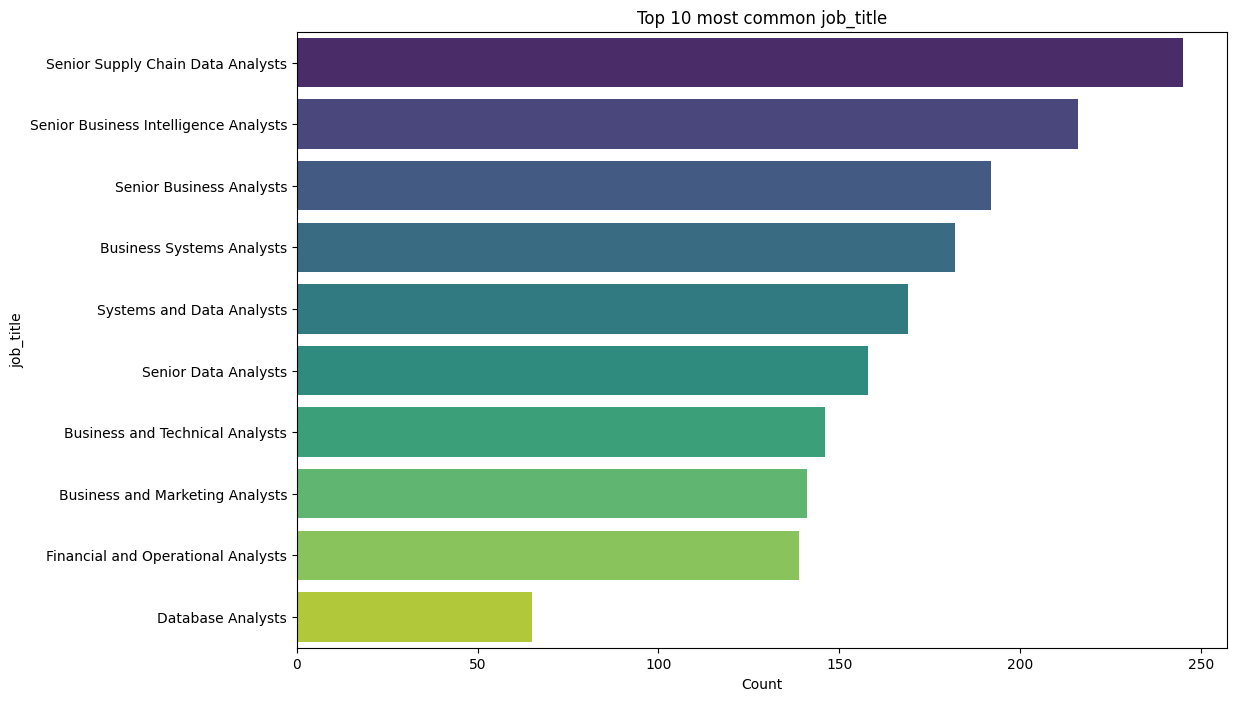

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


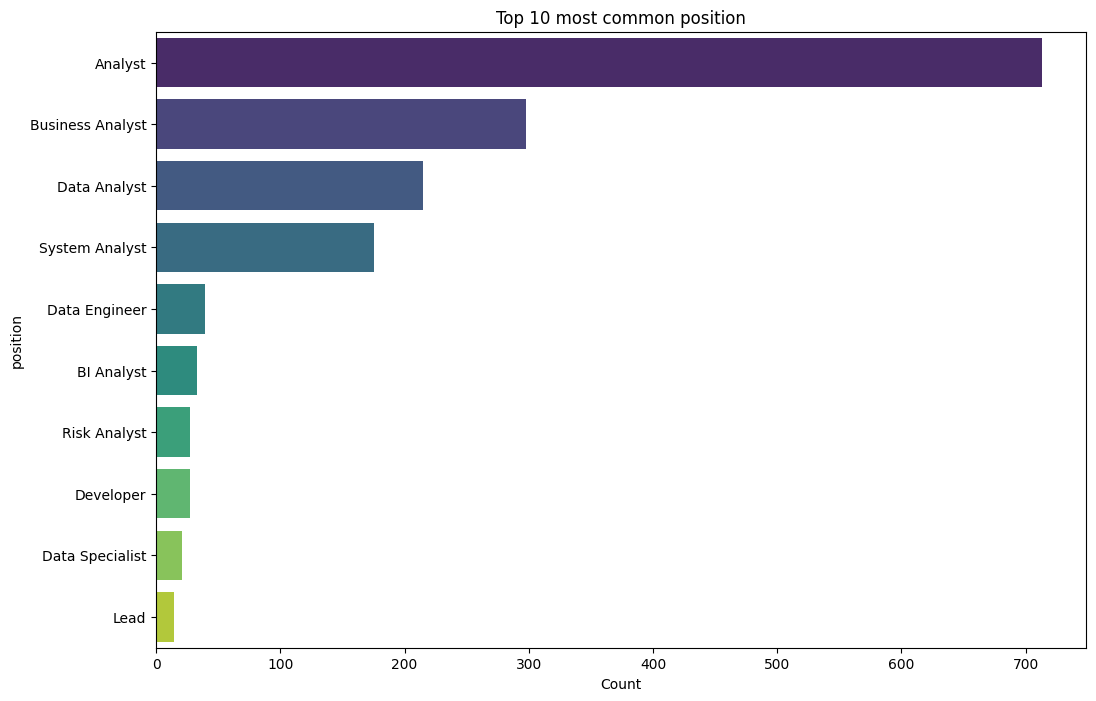

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


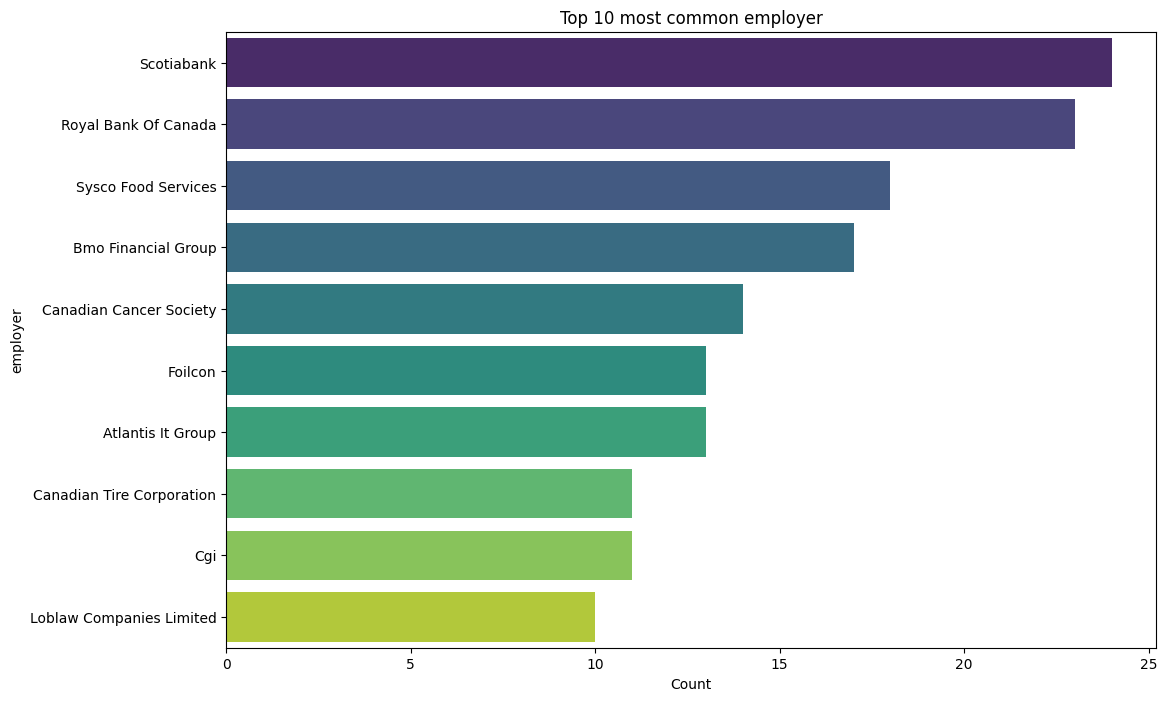

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


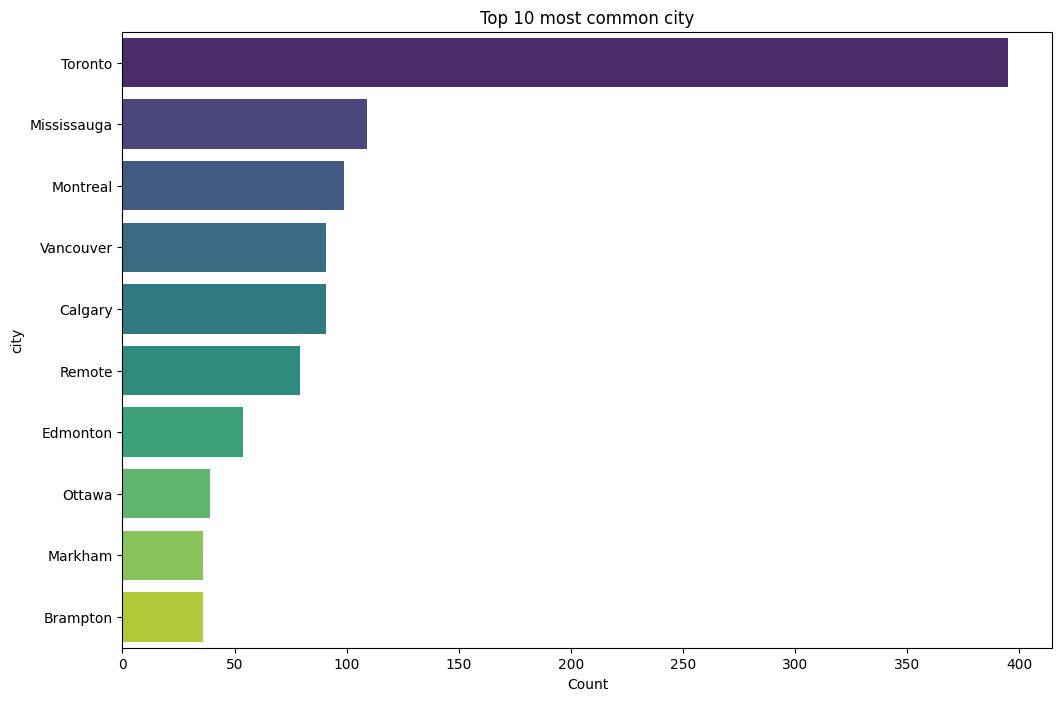

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


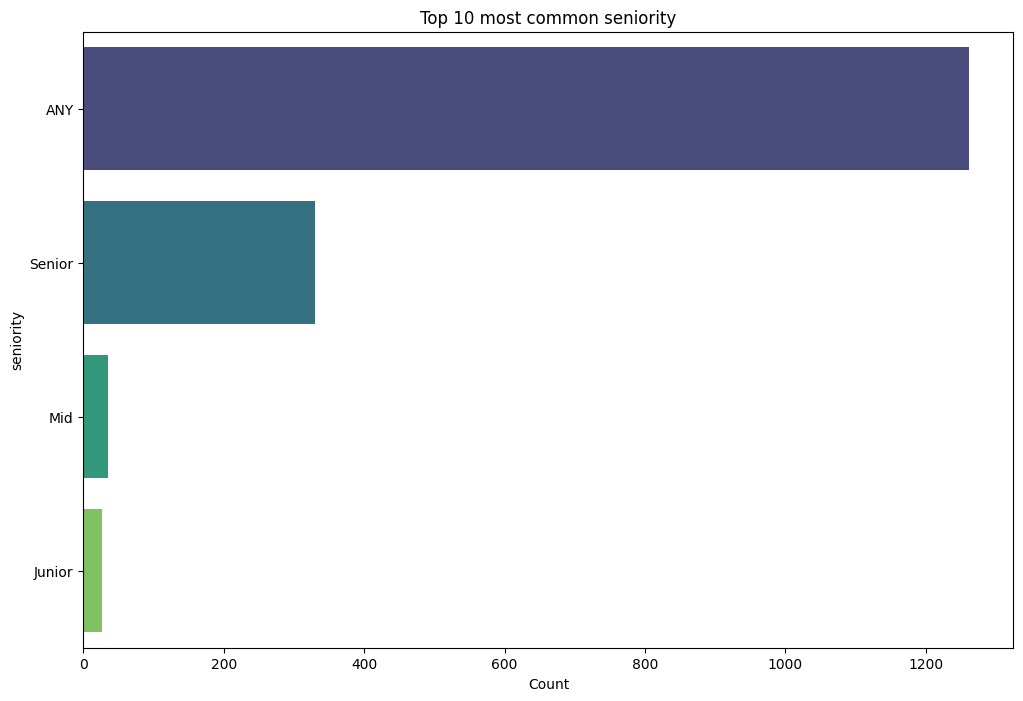

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


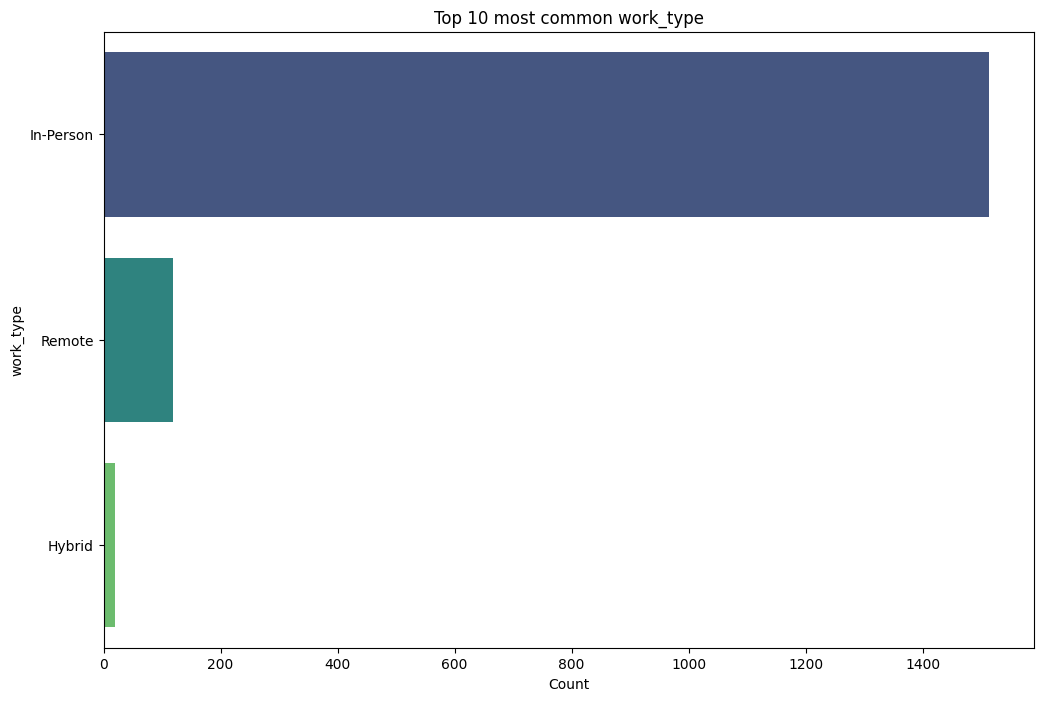

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


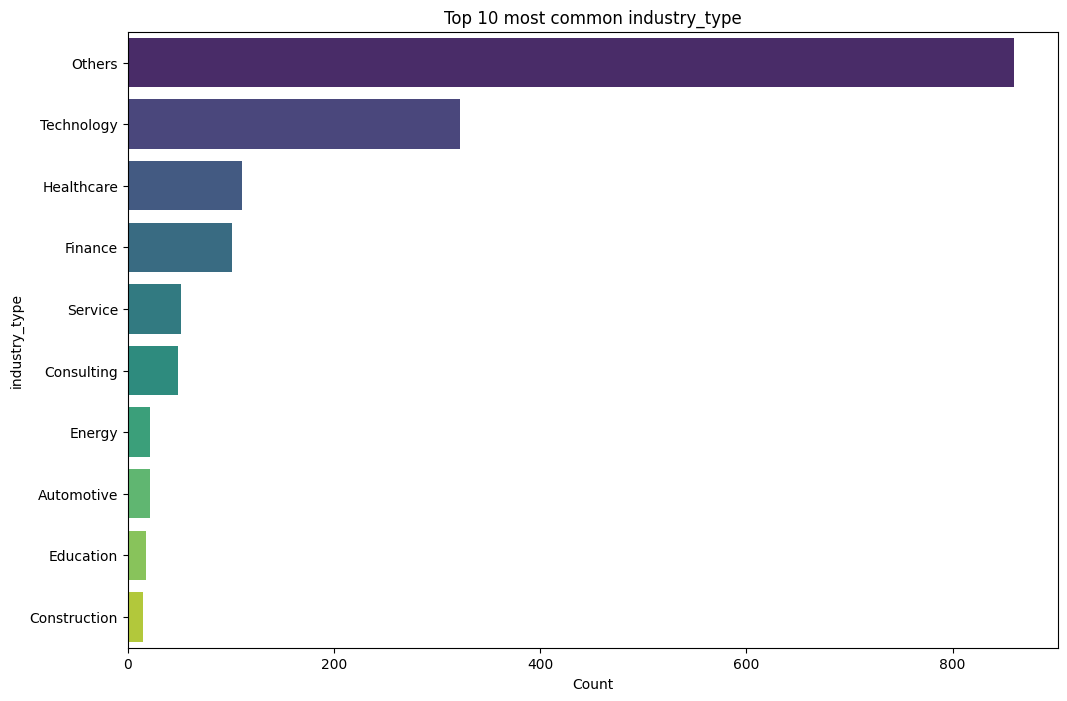

In [88]:
# Visualización de columnas categoricas
categorical_columns = ['job_title', 'position', 'employer', 'city', 'seniority', 'work_type', 'industry_type']
for col in categorical_columns:
    plot_top_n_categories(df4, col, n=10)

In [89]:
#Modificamos la columna seniority para identificar valores sin especificacion del puesto
df4['seniority'] = df4['seniority'].replace("ANY", "unspecified")
df4.seniority.value_counts()

seniority
unspecified    1262
Senior          330
Mid              35
Junior           26
Name: count, dtype: int64

In [90]:
#Tratamos de obtener seniority a partir del titulo de la postulacion para aquellos no especificados
mask = df4['seniority'] == 'unspecified'
df4.loc[mask, 'seniority'] = df4.loc[mask, 'job_title'].apply(seniority)
df4.seniority=df4.seniority.str.lower()
df4.seniority.value_counts()

seniority
senior         828
junior         601
unspecified    189
mid             35
Name: count, dtype: int64

In [91]:
for col in df4.select_dtypes(include=['object']).columns:
    df4[col] = df4[col].apply(ftfy.fix_text)

In [92]:
#Revisamos la columna de empleador/empresa
df4[df4['employer'].str.contains(r'[^\x00-\x7F]', na=False)]

job_title                          job_info  \
744         Business Systems Analysts          Business Systems Analyst   
785   Business and Technical Analysts  V.I.E. Programmer Analyst- H/F/X   
1070        Systems and Data Analysts  Engineering Project Data Analyst   
1678        Business Systems Analysts          Business Systems Analyst   
1679        Business Systems Analysts          Business Systems Analyst   
1680        Business Systems Analysts          Business Systems Analyst   

            position                      employer      city province  \
744   System Analyst               Atkinsrãƒâ©Alis  Richmond       BC   
785       Programmer  Sociãƒâ©Tãƒâ© Gãƒâ©Nãƒâ©Rale  Montreal       QC   
1070   Data Engineer          Cmc Ãæ'€°Lectronique  Montreal       QC   
1678  System Analyst              Atkinsrãƒæ'©Alis  Richmond       BC   
1679  System Analyst              Atkinsrãƒæ'©Alis  Richmond       QC   
1680  System Analyst              Atkinsrãƒæ'©Alis  Richmond       NB   

                                                  skill    seniority  \
744   Power Bi, Html, Power Platform, Excel, Css, Ja...       junior   
785         Git, Docker, Github, Java, Jira, Postgresql       junior   
1070            Jira, Power BI, SQL, Primavera, Tableau  unspecified   
1678   Python, No SQL, Power BI, SQL, Microsoft Outlook       junior   
1679   Python, No SQL, Power BI, SQL, Microsoft Outlook       junior   
1680   Python, No SQL, Power BI, SQL, Microsoft Outlook       junior   

      work_type industry_type  min_salary  max_salary  avg_salary  
744   In-Person        Others    68960.00     94820.0   81890.000  
785   In-Person        Others    64123.59     86600.0   75361.795  
1070  In-Person        Others    69000.00     80000.0   74500.000  
1678  In-Person        Others    69000.00     95000.0   82000.000  
1679  In-Person        Others    69000.00     95000.0   82000.000  
1680  In-Person        Others    69000.00     95000.0   82000.000

In [93]:
#Limpiamos la columna ciudad
df4['city'] = df4['city'].replace({
    'Baie-d\'urfe': 'Baie-d\'Urfé',
    'Portage la Prairie': 'Portage La Prairie',
    'Rocky View': 'Rocky View County'
})

In [94]:
#revisamos la columna provincia
df4[df4['province'].str.contains(r'[^\x00-\x7F]', na=False)]

Empty DataFrame
Columns: [job_title, job_info, position, employer, city, province, skill, seniority, work_type, industry_type, min_salary, max_salary, avg_salary]
Index: []

In [95]:
df4['province'].value_counts()

province
ON       878
BC       220
AB       174
QC       168
Undef     96
MB        36
NS        34
NB        21
SK        16
NL         5
YT         2
PE         1
NT         1
NFL        1
Name: count, dtype: int64

In [96]:
df4['province'] = df4['province'].replace({'Undef': 'Unspecified'})

In [97]:
#revisamos la columna skills
df4[df4['skill'].str.contains(r'[^\x00-\x7F]', na=False)]

Empty DataFrame
Columns: [job_title, job_info, position, employer, city, province, skill, seniority, work_type, industry_type, min_salary, max_salary, avg_salary]
Index: []

In [98]:
#revisamos la columna work type
df4[df4['work_type'].str.contains(r'[^\x00-\x7F]', na=False)]


Empty DataFrame
Columns: [job_title, job_info, position, employer, city, province, skill, seniority, work_type, industry_type, min_salary, max_salary, avg_salary]
Index: []

In [99]:
df4['work_type'].value_counts()

work_type
In-Person    1514
Remote        119
Hybrid         20
Name: count, dtype: int64

In [100]:
#revisamos la columna industria
df4[df4['industry_type'].str.contains(r'[^\x00-\x7F]', na=False)]

Empty DataFrame
Columns: [job_title, job_info, position, employer, city, province, skill, seniority, work_type, industry_type, min_salary, max_salary, avg_salary]
Index: []

In [101]:
df4['industry_type'].value_counts()

industry_type
Others                859
Technology            322
Healthcare            111
Finance               101
Service                52
Consulting             49
Energy                 22
Automotive             22
Education              18
Construction           15
Government             15
Transportation         11
Media                  10
Telecommunications      8
Legal                   7
Insurance               6
Aerospace               6
Real Estate             5
Manufacturing           5
Travel                  4
Retail                  3
Agriculture             2
Name: count, dtype: int64

In [102]:
#limpiamos las columnas problematicas
replacements = {
    'ãƒâ©': 'é',  
    'ãƒÂ©': 'é',  
    'ãƒâ§': 'ç',  
    'ãƒâ¦': 'æ',  
    'ãƒâ¢': 'â',  
    'ãƒâ': 'a',   
    '©': '',      
    '¨Ã': '',     
    'ƒæ': '',     
    '¥': '',      
    'â€™': "'",   
    'â€œ': '"',   
    'â€”': '-',   
    'Â': '',     
    '¢': '',     
    'Ã¯': '',    
    'Ã©': 'é',   
    'Ã§': 'ç',   
    'Ã´': 'ô',   
    'Ã¨': 'è',   
    'ã§': 'ç',   
    'ã¢': 'â',
    'Ã’': 'Ô',       
    'Ã‚¬°': '°',     
    'ã’': 'é',        
    'Ã‚': 'é',        
    'Atkinsrã’Ã‚Alis': 'AtkinsRéalis',  # Ejemplo específico
    'SociéTé GéNéRale': 'Société Générale',  # Ejemplo específico
    'Cmc Ã’Ã‚¬°Lectronique': 'Cmc ÔÉ°Electronique', 
}

def reemplace_characters(text, replacements):
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

df4['job_info'] = df4['job_info'].apply(lambda x: reemplace_characters(str(x), replacements))
df4['employer'] = df4['employer'].apply(lambda x: reemplace_characters(str(x), replacements))
df4['city'] = df4['city'].apply(lambda x: reemplace_characters(str(x), replacements))

In [103]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df4['employer'] = df4['employer'].apply(remove_numbers)

# reemplazar caracteres
df4['employer'] = df4['employer'].str.replace(r'[+\|#]', '', regex=True)

In [104]:
#renombramos las columnas 
rename_dict = {
    'employer': 'company',
    'province': 'state',
    'industry_type' : 'industry',    
}

df4 = df4.rename(columns=rename_dict)

# Mostrar los nombres de columnas de df2 después de renombrar
print(df4.columns)

Index(['job_title', 'job_info', 'position', 'company', 'city', 'state',
       'skill', 'seniority', 'work_type', 'industry', 'min_salary',
       'max_salary', 'avg_salary'],
      dtype='object')


In [105]:
df4.city=df4.city.str.replace('Remote in', '')

In [106]:
#Revisamos las estadísticas
df4.describe().round(2)

min_salary  max_salary  avg_salary
count     1653.00     1653.00     1653.00
mean     69165.86    88725.79    78945.82
std      18740.06    20246.68    18045.33
min      30240.56    57200.00    43720.28
25%      60000.00    80000.00    70000.00
50%      68049.00    87000.00    77750.00
75%      80000.00    93603.00    88668.40
max     137280.00   180000.00   158640.00

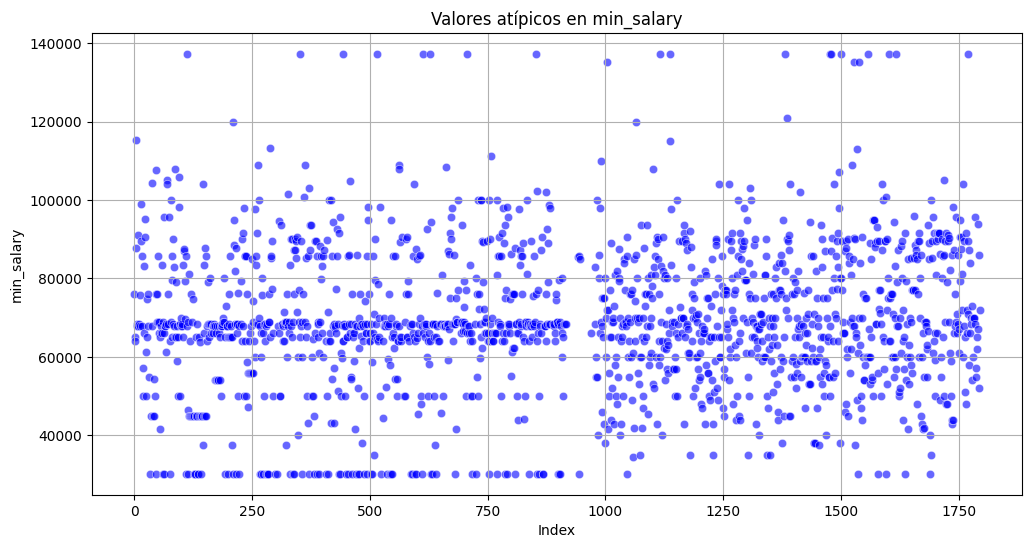

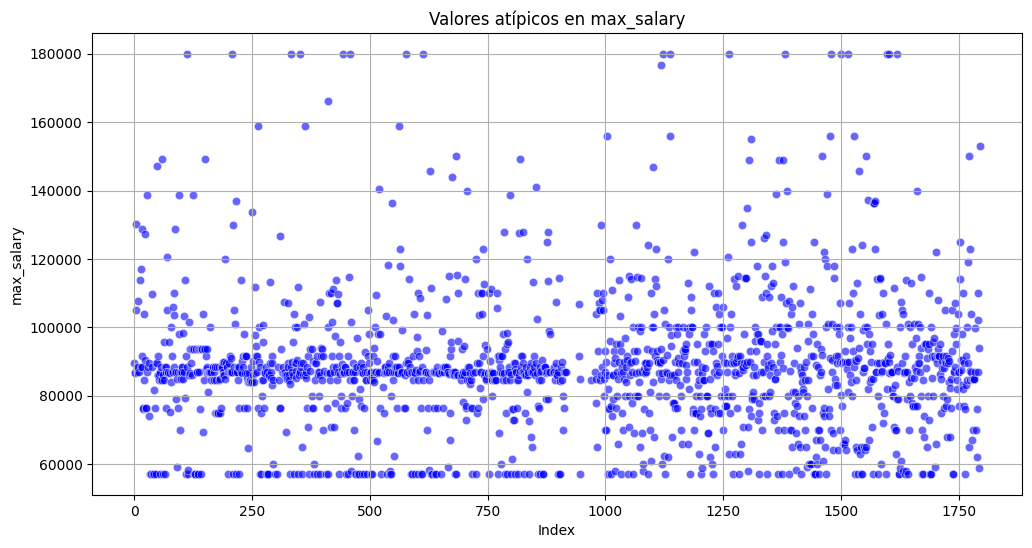

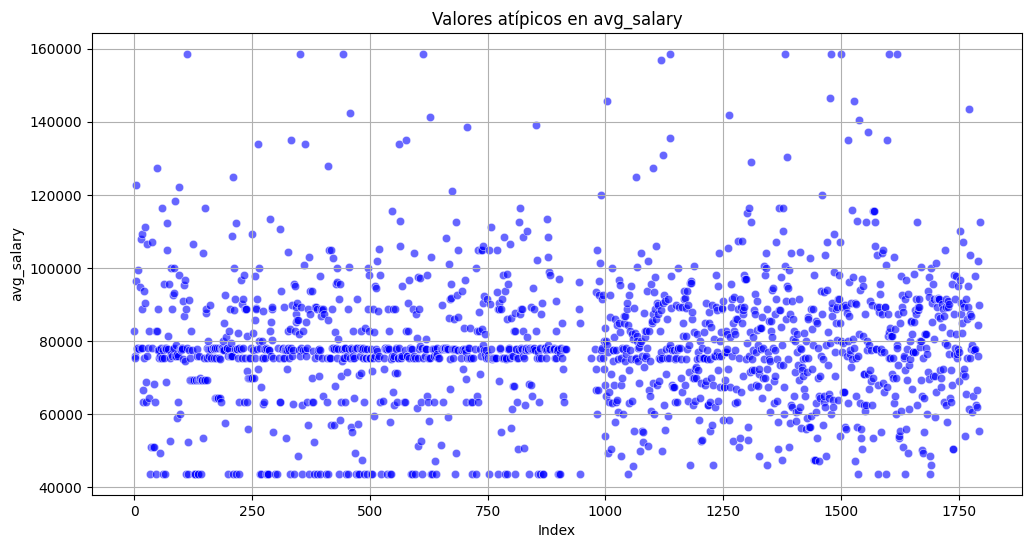

In [107]:
#Visualizamos las columnas numéricas para detectar posibles outliers
numeric_columns4 = ['min_salary', 'max_salary', 'avg_salary']
for col in numeric_columns4:
    plot_outliers(df4, col, title=f'Valores atípicos en {col}')

In [108]:
df4[df4.avg_salary<60000]

job_title  \
33                 Senior Business Analysts   
35       Financial and Operational Analysts   
40       Financial and Operational Analysts   
42       Financial and Operational Analysts   
46          Business and Technical Analysts   
...                                     ...   
1726              Systems and Data Analysts   
1737  Senior Business Intelligence Analysts   
1738  Senior Business Intelligence Analysts   
1764      Senior Supply Chain Data Analysts   
1794      Senior Supply Chain Data Analysts   

                                        job_info        position  \
33                        Senior Systems Analyst  System Analyst   
35                               Payroll Analyst         Analyst   
40                               Payroll Analyst         Analyst   
42                               Payroll Analyst         Analyst   
46                       C-Ge-916 - Data Analyst    Data Analyst   
...                                          ...             ...   
1726        Client Analyst- Surgical Instruments         Analyst   
1737  Pricing & Legal Project Management Analyst         Analyst   
1738  Pricing & Legal Project Management Analyst         Analyst   
1764                   Quality Assurance Analyst         Analyst   
1794         Analyst, Supply Chain Replenishment         Analyst   

                                    company                  city  \
33          Mackenzie Financial Corporation  Greater Toronto Area   
35    Cloudmd Software & Services Inc - Can                Remote   
40    Cloudmd Software & Services Inc - Can           Beauceville   
42    Cloudmd Software & Services Inc - Can         Charlottetown   
46                                      Cae         Saint-Laurent   
...                                     ...                   ...   
1726                              Clarivate               Toronto   
1737                            Gowling Wlg              Waterloo   
1738                            Gowling Wlg              Waterloo   
1764                        Teleperformance               Toronto   
1794               Loblaw Companies Limited              Brampton   

            state                                              skill  \
33             ON                                                Sql   
35    Unspecified                            Excel, Reason, Database   
40             QC                            Excel, Reason, Database   
42             PE                            Excel, Reason, Database   
46             QC                               Power BI, Confluence   
...           ...                                                ...   
1726           ON                          SQL, Metadata, AI, Python   
1737           ON        Power BI, SQL, SQL, SQL, Project management   
1738           QC        Power BI, SQL, SQL, SQL, Project management   
1764           ON  Google Suite, Sales, Office Suite, Quality ass...   
1794           ON      SQL, SAP, Computer skills, Marketing, Workday   

        seniority  work_type    industry  min_salary  max_salary  avg_salary  
33         senior  In-Person     Finance    30240.56     57200.0    43720.28  
35         junior     Remote  Technology    45000.00     57200.0    51100.00  
40         junior     Remote  Technology    45000.00     57200.0    51100.00  
42         junior     Remote  Technology    45000.00     57200.0    51100.00  
46         junior  In-Person      Others    30240.56     57200.0    43720.28  
...           ...        ...         ...         ...         ...         ...  
1726  unspecified  In-Person      Others    48000.00     68000.0    58000.00  
1737       senior  In-Person      Others    44000.00     57200.0    50600.00  
1738       senior  In-Person      Others    44000.00     57200.0    50600.00  
1764       senior  In-Person      Others    51000.00     57200.0    54100.00  
1794       senior  In-Person  Technology    52000.00     59000.0    55500.00  

[191 rows

# **Dataset 5: Cost of living US**

In [109]:
#Carga del dataset
df5 = pd.read_csv(r'datasets\cost_of_living_us.csv')
#descargarlo desde https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties?resource=download

In [110]:
#revision del dataset
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [111]:
df5.head(5)

case_id state  isMetro            areaname          county  \
0        1    AL     True  Montgomery, AL MSA  Autauga County   
1        1    AL     True  Montgomery, AL MSA  Autauga County   
2        1    AL     True  Montgomery, AL MSA  Autauga County   
3        1    AL     True  Montgomery, AL MSA  Autauga County   
4        1    AL     True  Montgomery, AL MSA  Autauga County   

  family_member_count  housing_cost    food_cost  transportation_cost  \
0                1p0c    8505.72876   3454.91712          10829.16876   
1                1p1c   12067.50240   5091.70788          11588.19288   
2                1p2c   12067.50240   7460.20308          12361.77720   
3                1p3c   15257.15040   9952.23924          13452.18600   
4                1p4c   15257.15040  12182.21400          13744.59840   

   healthcare_cost  other_necessities_cost  childcare_cost        taxes  \
0       5737.47984              4333.81344          0.0000   6392.94504   
1       8659.55640              6217.45896       6147.8298   7422.07836   
2      11581.63260              7075.65816      15824.6940   9769.56228   
3      14503.70760              9134.35620      18802.1892  13101.70320   
4      17425.78560              9942.36396      18802.1892  13469.21880   

    total_cost  median_family_income  
0   39254.0532          73010.414062  
1   57194.3256          73010.414062  
2   76141.0308          73010.414062  
3   94203.5328          73010.414062  
4  100823.5200          73010.414062

In [112]:
# Estandarizar nombres de columnas 
df5 = clean_column_names(df5)

# Renombrar algunas columnas
df5 = df5.rename(columns={
    'ismetro':'is_metro',
    'areaname':'area_name',
})

df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   is_metro                31430 non-null  bool   
 3   area_name               31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [113]:
# Verificar valores nulos y duplicados
df5_ndr = null_duplicates_review(df5, 'Dataset US Cost of Living')

Valores ausentes en Dataset US Cost of Living:
                        Valores ausentes (%)
case_id                                 0.00
state                                   0.00
is_metro                                0.00
area_name                               0.00
county                                  0.00
family_member_count                     0.00
housing_cost                            0.00
food_cost                               0.00
transportation_cost                     0.00
healthcare_cost                         0.00
other_necessities_cost                  0.00
childcare_cost                          0.00
taxes                                   0.00
total_cost                              0.00
median_family_income                    0.03

Total duplicados en Dataset US Cost of Living: 0



In [114]:
null_rows = df5.loc[df5['median_family_income'].isna()]
null_rows

case_id state  is_metro                            area_name  \
15110     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15111     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15112     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15113     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15114     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15115     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15116     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15117     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15118     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15119     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   

              county family_member_count  housing_cost    food_cost  \
15110  Sullivan part                1p0c        8052.0   3019.16160   
15111  Sullivan part                1p1c       11256.0   4449.51084   
15112  Sullivan part                1p2c       11256.0   6519.27612   
15113  Sullivan part                1p3c       14688.0   8697.00216   
15114  Sullivan part                1p4c       14688.0  10645.71900   
15115  Sullivan part                2p0c        8772.0   5535.13032   
15116  Sullivan part                2p1c       11256.0   6889.02612   
15117  Sullivan part                2p2c       11256.0   8724.80352   
15118  Sullivan part                2p3c       14688.0  10652.32248   
15119  Sullivan part                2p4c       14688.0  13035.88920   

       transportation_cost  healthcare_cost  other_necessities_cost  \
15110           11086.4934       6505.34988              4011.51852   
15111           11722.2708       9930.74856              5690.72604   
15112           12405.8652      13356.14640              6440.68356   
15113           12854.8620      16781.54400              8473.30884   
15114           13619.9388      20206.94280              9179.40600   
15115           12918.5988      13010.70000              5184.03768   
15116           13557.9828      16436.09760              6574.65816   
15117           13977.7980      19861.49760              7239.83280   
15118           14798.7552      23286.89520              9181.79808   
15119           14802.7416      26712.29280             10045.45896   

       childcare_cost        taxes   total_cost  median_family_income  
15110         0.00000   6075.80856   38750.3316                   NaN  
15111      7555.66332   7196.82420   57801.7440                   NaN  
15112     14323.03800   8732.72244   73033.7340                   NaN  
15113     16405.30800  11755.84356   89655.8676                   NaN  
15114     16405.30800  12372.99120   97118.3088                   NaN  
15115         0.00000   7023.17208   52443.6384                   NaN  
15116      7555.66332   8939.94504   71209.3716                   NaN  
15117     14323.03800   9841.96872   85224.9372                   NaN  
15118     16405.30800  11854.97676  100868.0508                   NaN  
15119     16405.30800  12050.91480  107740.6056                   NaN

In [115]:
rows_view = df5.iloc[15100:15129]
rows_view

case_id state  is_metro                            area_name  \
15100     1532    MO     False                  Crawford County, MO   
15101     1532    MO     False                  Crawford County, MO   
15102     1532    MO     False                  Crawford County, MO   
15103     1532    MO     False                  Crawford County, MO   
15104     1532    MO     False                  Crawford County, MO   
15105     1532    MO     False                  Crawford County, MO   
15106     1532    MO     False                  Crawford County, MO   
15107     1532    MO     False                  Crawford County, MO   
15108     1532    MO     False                  Crawford County, MO   
15109     1532    MO     False                  Crawford County, MO   
15110     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15111     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15112     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15113     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15114     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15115     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15116     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15117     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15118     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15119     1533    MO      True  St. Louis, MO-IL HUD Metro FMR Area   
15120     1534    MO     False                      Dade County, MO   
15121     1534    MO     False                      Dade County, MO   
15122     1534    MO     False                      Dade County, MO   
15123     1534    MO     False                      Dade County, MO   
15124     1534    MO     False                      Dade County, MO   
15125     1534    MO     False                      Dade County, MO   
15126     1534    MO     False                      Dade County, MO   
15127     1534    MO     False                      Dade County, MO   
15128     1534    MO     False                      Dade County, MO   

                county family_member_count  housing_cost    food_cost  \
15100  Crawford County                1p0c        5724.0   3019.16160   
15101  Crawford County                1p1c        7944.0   4449.51084   
15102  Crawford County                1p2c        7944.0   6519.27612   
15103  Crawford County                1p3c       10872.0   8697.00216   
15104  Crawford County                1p4c       10872.0  10645.71900   
15105  Crawford County                2p0c        6492.0   5535.13032   
15106  Crawford County                2p1c        7944.0   6889.02612   
15107  Crawford County                2p2c        7944.0   8724.80352   
15108  Crawford County                2p3c       10872.0  10652.32248   
15109  Crawford County                2p4c       10872.0  13035.88920   
15110    Sullivan part                1p0c        8052.0   3019.16160   
15111    Sullivan part                1p1c       11256.0   4449.51084   
15112    Sullivan part                1p2c       11256.0   6519.27612   
15113    Sullivan part                1p3c       14688.0   8697.00216   
15114    Sullivan part                1p4c       14688.0  10645.71900   
15115    Sullivan part                2p0c        8772.0   5535.13032   
15116    Sullivan part                2p1c       11256.0   6889.02612   
15117    Sullivan part                2p2c       11256.0   8724.80352   
15118    Sullivan part                2p3c       14688.0  10652.32248   
15119    Sullivan part                2p4c       14688.0  13035.88920   
15120      Dade County                1p0c        5568.0   2988.03648   
15121      Dade County                1p1c        8076.0   4403.63928   
15122      Dade County                1p2c        8076.0   6452.06760   
15123      Dade County                1p3c       10044.0   8607.34272   
15124      Dade County                1p4c       10

In [116]:
df5 = df5.dropna(subset=['median_family_income'])

In [117]:
df5[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes', 'total_cost', 'median_family_income']] = df5[['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes', 'total_cost', 'median_family_income']].round(2)

In [118]:
df5['area_name'] = df5['area_name'].str.split(',').str[0]

In [119]:
df5['family_member_count'].value_counts()

family_member_count
1p0c    3142
1p1c    3142
1p2c    3142
1p3c    3142
1p4c    3142
2p0c    3142
2p1c    3142
2p2c    3142
2p3c    3142
2p4c    3142
Name: count, dtype: int64

In [120]:
df5[['parents', 'children']] = df5['family_member_count'].str.extract(r'(\d)p(\d)c')
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31420 entries, 0 to 31429
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31420 non-null  int64  
 1   state                   31420 non-null  object 
 2   is_metro                31420 non-null  bool   
 3   area_name               31420 non-null  object 
 4   county                  31420 non-null  object 
 5   family_member_count     31420 non-null  object 
 6   housing_cost            31420 non-null  float64
 7   food_cost               31420 non-null  float64
 8   transportation_cost     31420 non-null  float64
 9   healthcare_cost         31420 non-null  float64
 10  other_necessities_cost  31420 non-null  float64
 11  childcare_cost          31420 non-null  float64
 12  taxes                   31420 non-null  float64
 13  total_cost              31420 non-null  float64
 14  median_family_income    31420 non-null  flo

In [121]:
df5 = df5.astype({
    'parents':'int64',
    'children':'int64'
})
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31420 entries, 0 to 31429
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31420 non-null  int64  
 1   state                   31420 non-null  object 
 2   is_metro                31420 non-null  bool   
 3   area_name               31420 non-null  object 
 4   county                  31420 non-null  object 
 5   family_member_count     31420 non-null  object 
 6   housing_cost            31420 non-null  float64
 7   food_cost               31420 non-null  float64
 8   transportation_cost     31420 non-null  float64
 9   healthcare_cost         31420 non-null  float64
 10  other_necessities_cost  31420 non-null  float64
 11  childcare_cost          31420 non-null  float64
 12  taxes                   31420 non-null  float64
 13  total_cost              31420 non-null  float64
 14  median_family_income    31420 non-null  flo

In [122]:
df5 = df5.round(2)

In [123]:
df5['state'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [124]:
ind = [3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199]

subset = df5.iloc[ind]

display(subset)

case_id state  is_metro                        area_name  \
3190      326    DC      True  Washington-Arlington-Alexandria   
3191      326    DC      True  Washington-Arlington-Alexandria   
3192      326    DC      True  Washington-Arlington-Alexandria   
3193      326    DC      True  Washington-Arlington-Alexandria   
3194      326    DC      True  Washington-Arlington-Alexandria   
3195      326    DC      True  Washington-Arlington-Alexandria   
3196      326    DC      True  Washington-Arlington-Alexandria   
3197      326    DC      True  Washington-Arlington-Alexandria   
3198      326    DC      True  Washington-Arlington-Alexandria   
3199      326    DC      True  Washington-Arlington-Alexandria   

                    county family_member_count  housing_cost  food_cost  \
3190  District of Columbia                1p0c      16642.28    4492.43   
3191  District of Columbia                1p1c      19414.16    6620.75   
3192  District of Columbia                1p2c      19414.16    9700.50   
3193  District of Columbia                1p3c      24891.92   12940.90   
3194  District of Columbia                1p4c      24891.92   15840.54   
3195  District of Columbia                2p0c      17027.26    8236.12   
3196  District of Columbia                2p1c      19414.16   10250.68   
3197  District of Columbia                2p2c      19414.16   12982.27   
3198  District of Columbia                2p3c      24891.92   15850.36   
3199  District of Columbia                2p4c      24891.92   19397.04   

      transportation_cost  healthcare_cost  other_necessities_cost  \
3190              5660.74          4933.48                 7657.94   
3191              6384.58          8266.32                 9433.47   
3192              7528.00         11599.16                10549.39   
3193              8171.79         14932.00                13708.32   
3194              8554.63         18264.84                14758.98   
3195              7206.08          9866.96                 9153.92   
3196              8349.17         13199.80                10748.74   
3197              8963.19         16532.64                11738.50   
3198              9324.64         19865.48                14762.53   
3199              9476.89         23198.32                16047.64   

      childcare_cost     taxes  total_cost  median_family_income  parents  \
3190            0.00   6929.51    46316.38             116607.39        1   
3191        19994.33  14165.31    84278.92             116607.39        1   
3192        42045.96  24911.74   125748.91             116607.39        1   
3193        48831.09  31384.30   154860.31             116607.39        1   
3194        48831.09  32334.15   163476.14             116607.39        1   
3195            0.00   8563.61    60053.96             116607.39        2   
3196        19994.33  14341.96    96298.84             116607.39        2   
3197        42045.96  22870.63   134547.36             116607.39        2   
3198        48831.09  30205.72   163731.74             116607.39        2   
3199        48831.09  31740.90   173583.80             116607.39        2   

      children  
3190         0  
3191         1  
3192         2  
3193         3  
3194         4  
3195         0  
3196         1  
3197         2  
3198         3  
3199         4

In [125]:
df5['state'] = df5['state'].replace('DC', 'WA')

In [126]:
df5['state'] = df5['state'].fillna('WA')

In [127]:
# Verificar estadísticas  
df5.describe().round(2)

case_id  housing_cost  food_cost  transportation_cost  \
count  31420.00      31420.00   31420.00             31420.00   
mean    1589.33      11073.36    8287.65             13593.99   
std      917.36       4166.01    3271.23              1640.57   
min        1.00       4209.31    2220.28              2216.46   
25%      792.00       8580.00    5801.42             12535.21   
50%     1593.50      10416.00    8129.16             13698.32   
75%     2386.00      12444.00   10703.62             14765.87   
max     3171.00      61735.59   31178.62             19816.48   

       healthcare_cost  other_necessities_cost  childcare_cost     taxes  \
count         31420.00                31420.00        31420.00  31420.00   
mean          13393.01                 7015.26         9879.25   7657.10   
std            5204.02                 2397.56         6778.33   3339.91   
min            3476.38                 2611.64            0.00   1027.80   
25%            9667.44                 5286.34         5341.21   5597.54   
50%           13082.51                 6733.06        10166.34   6897.74   
75%           16657.82                 8412.60        14272.14   8789.14   
max           37252.27                28829.44        48831.09  47753.39   

       total_cost  median_family_income  parents  children  
count    31420.00              31420.00  31420.0  31420.00  
mean     70899.62              68316.00      1.5      2.00  
std      21846.34              16886.97      0.5      1.41  
min      30087.66              25529.98      1.0      0.00  
25%      53773.91              57223.99      1.0      1.00  
50%      70974.25              65955.60      1.5      2.00  
75%      85368.05              76136.07      2.0      3.00  
max     223717.55             177662.47      2.0      4.00

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


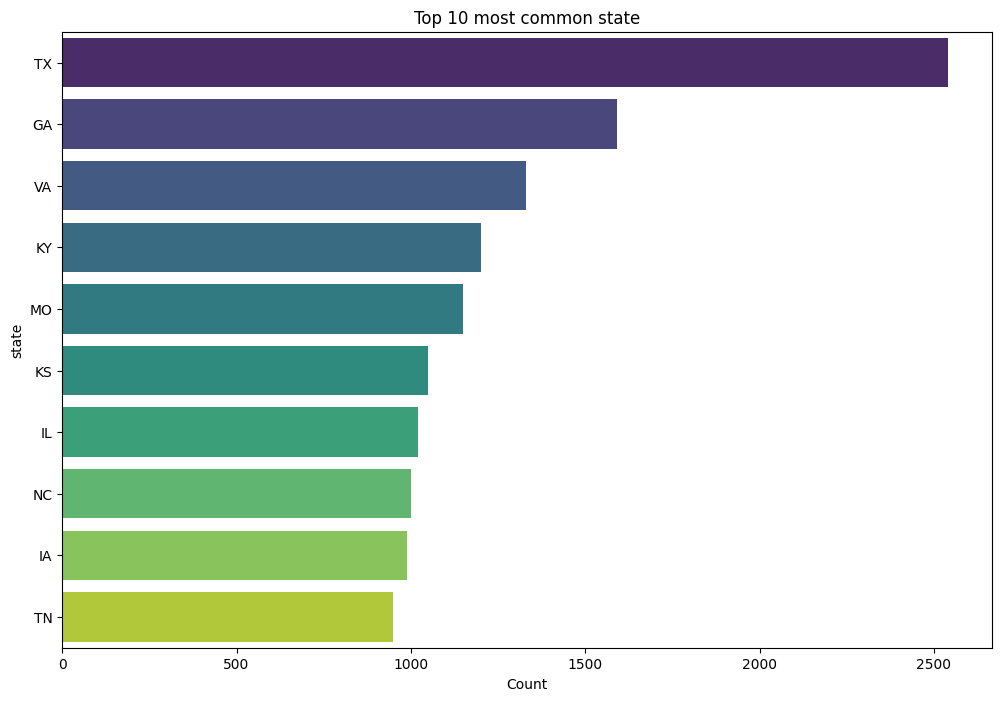

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


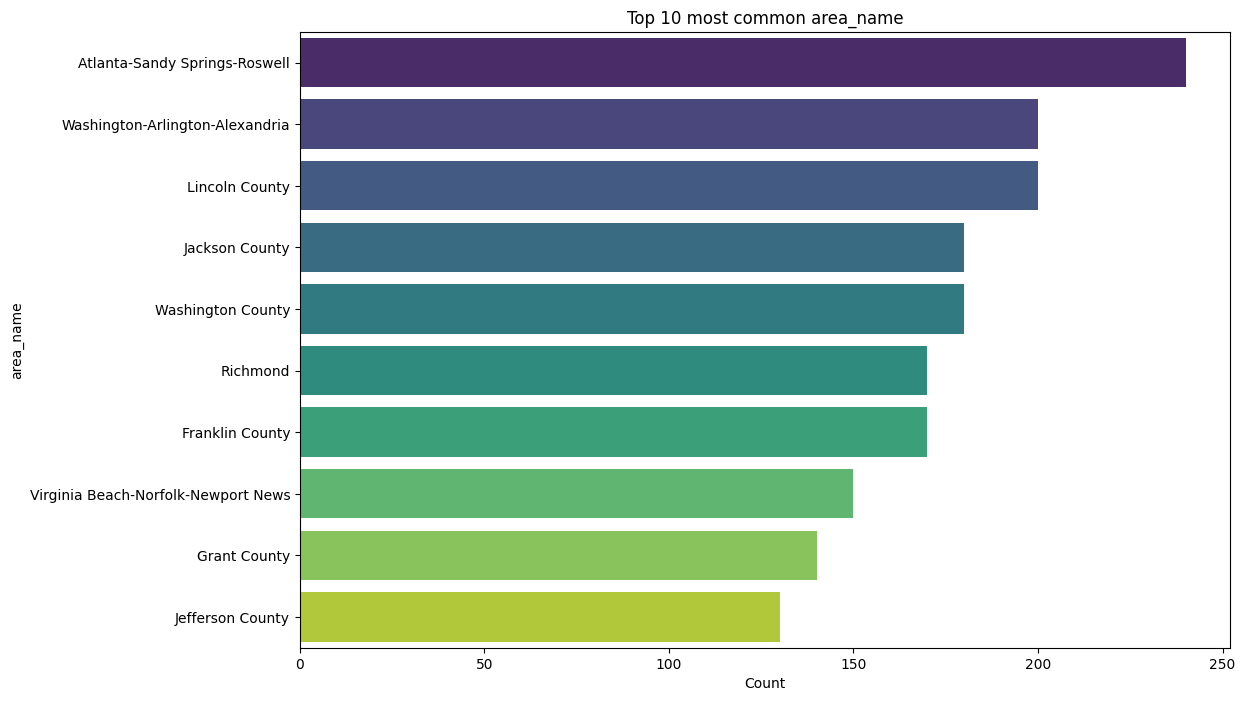

c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_n.index, x=top_n.values, palette='viridis')
c:\Users\daine\Downloads\Proyecto\ETL_EDA\utils.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(top_n.index, rotation=0, ha='right')


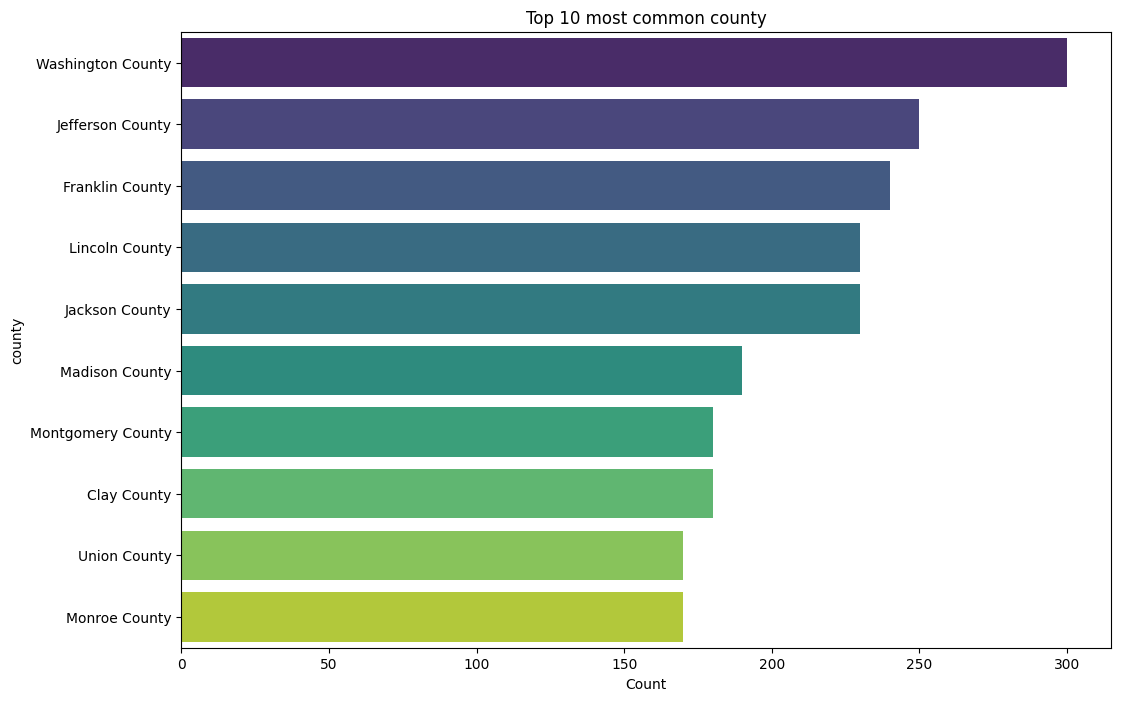

In [128]:
# Visualización de columnas categóricas
categorical_columns = ['state', 'area_name', 'county']
for col in categorical_columns:
    plot_top_n_categories(df5, col, n=10)

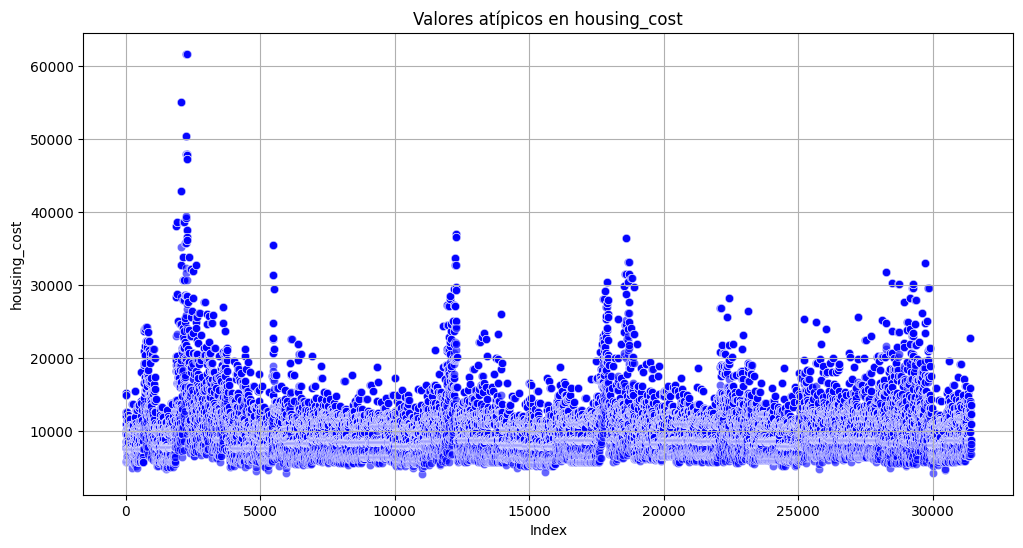

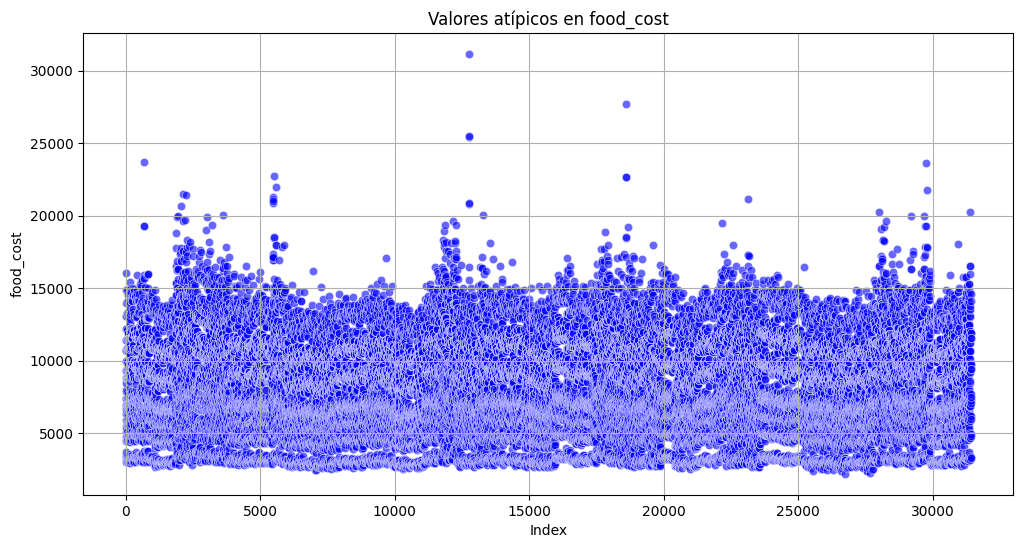

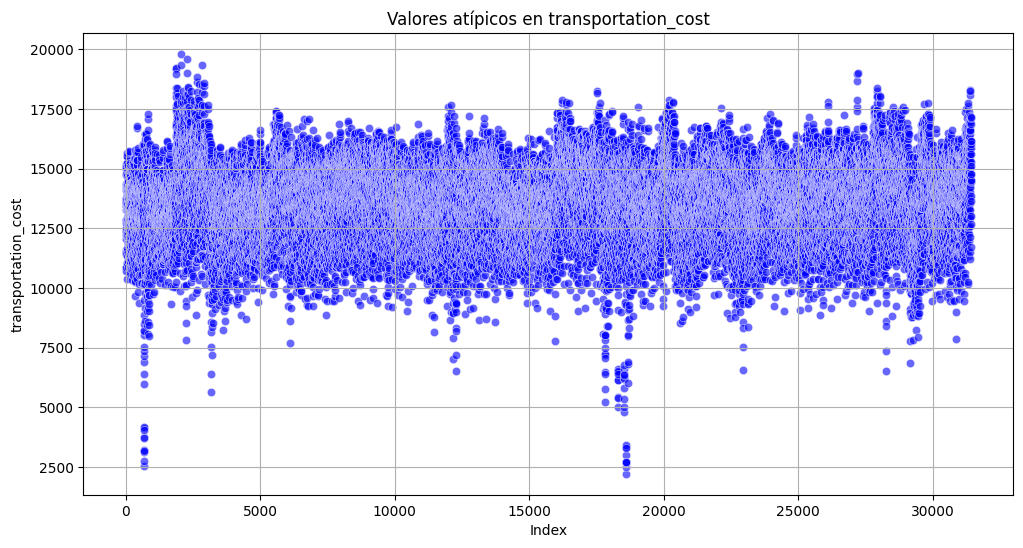

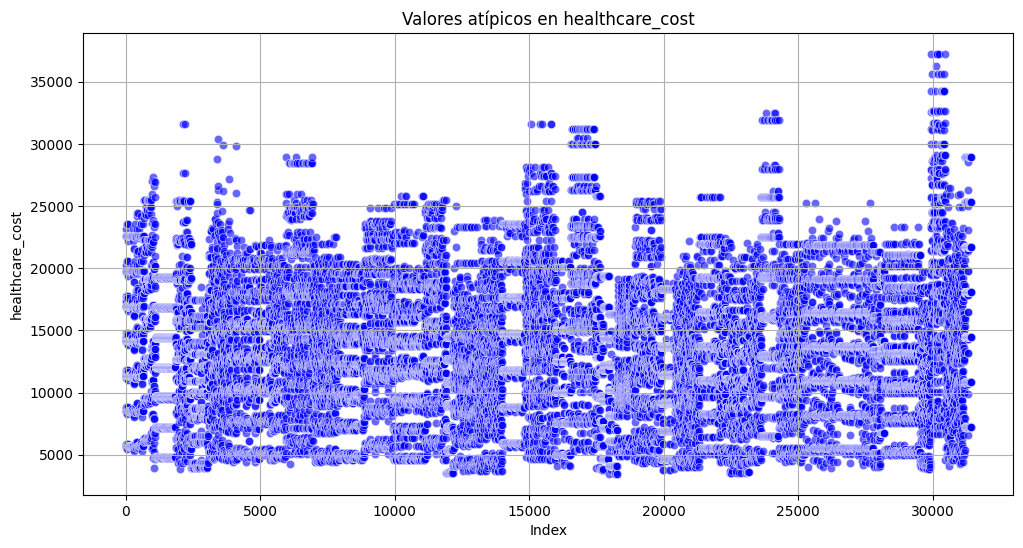

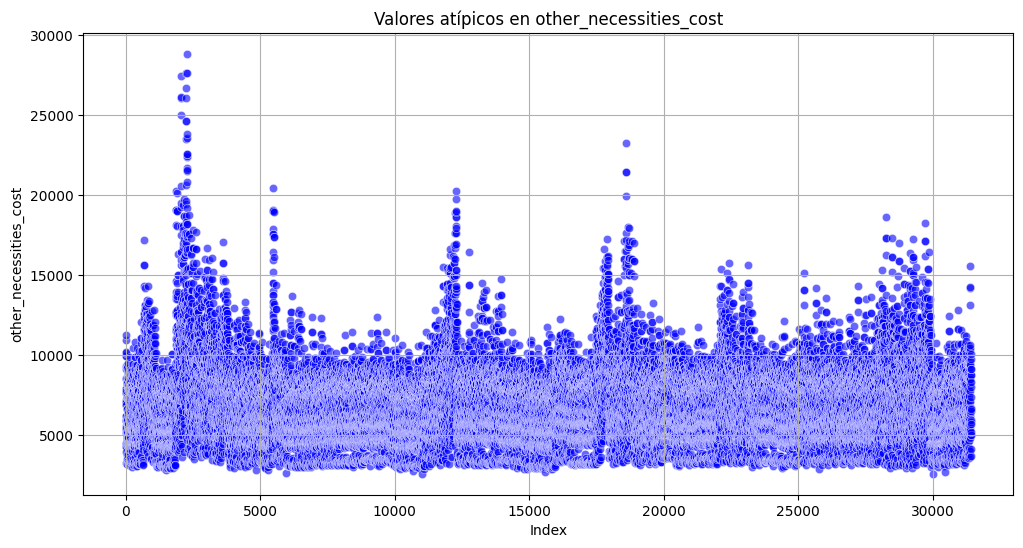

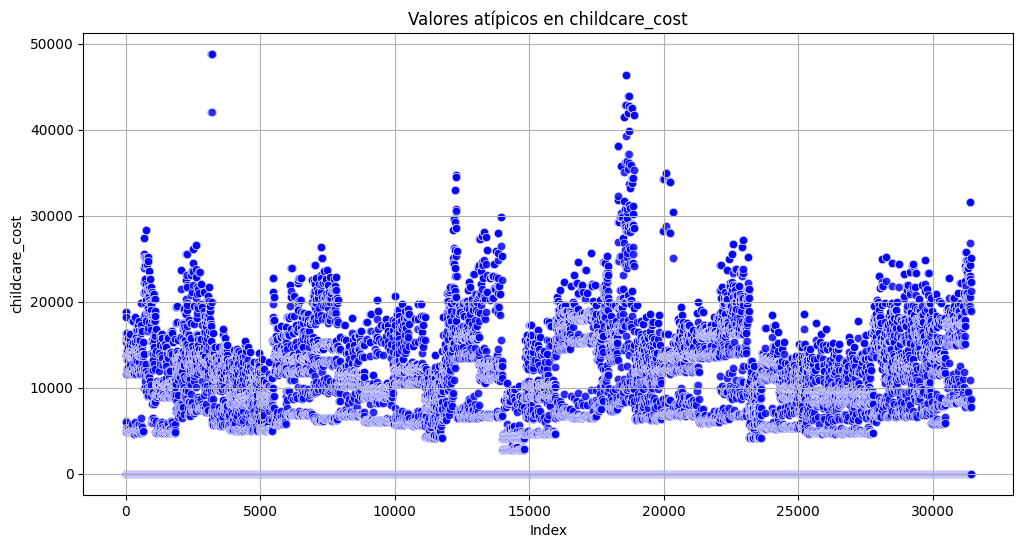

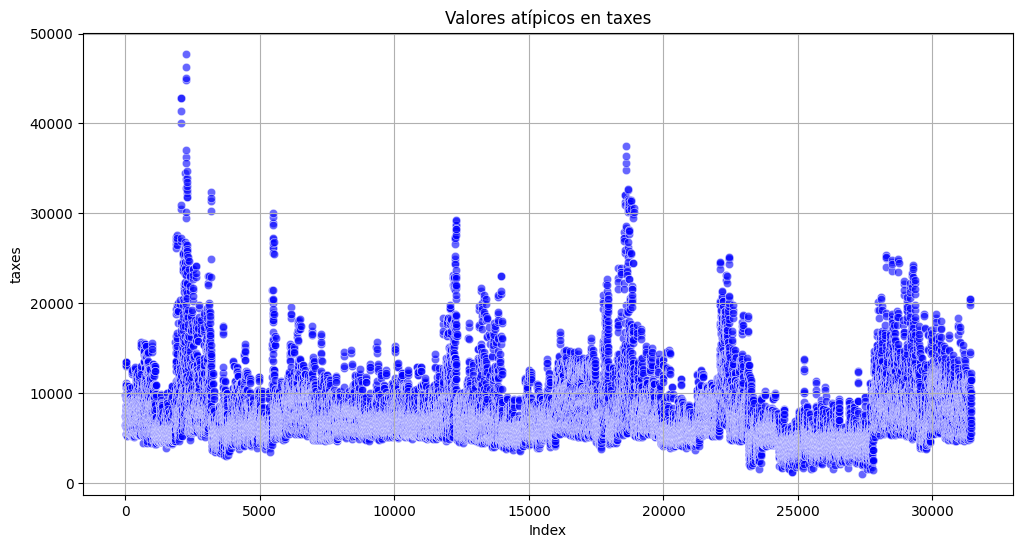

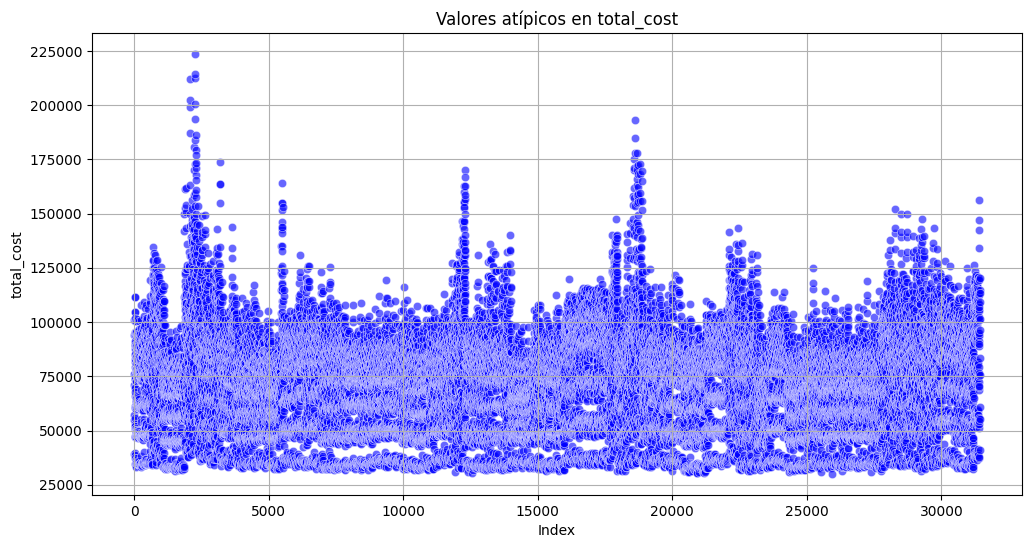

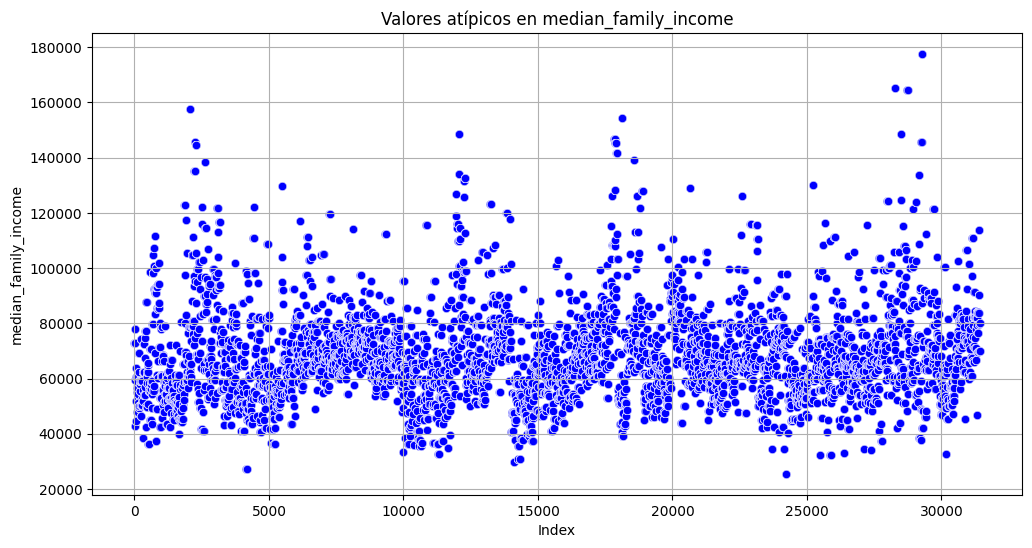

In [129]:
# Visualización de columnas numéricas (buscar outliers)
numeric_columns = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost',	'taxes', 'total_cost',	'median_family_income']
for col in numeric_columns:
    plot_outliers(df5, col, title=f'Valores atípicos en {col}')

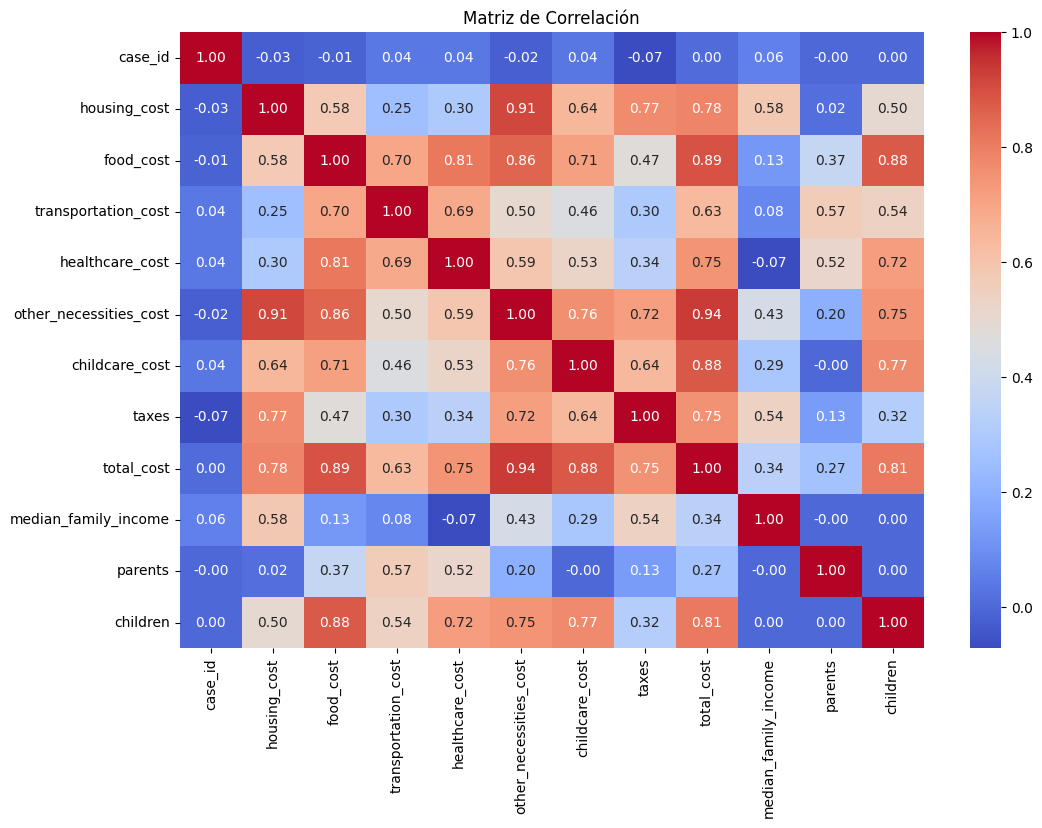

In [130]:
df5_numeric = df5.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df5_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [131]:
df5.head()

case_id state  is_metro   area_name          county family_member_count  \
0        1    AL      True  Montgomery  Autauga County                1p0c   
1        1    AL      True  Montgomery  Autauga County                1p1c   
2        1    AL      True  Montgomery  Autauga County                1p2c   
3        1    AL      True  Montgomery  Autauga County                1p3c   
4        1    AL      True  Montgomery  Autauga County                1p4c   

   housing_cost  food_cost  transportation_cost  healthcare_cost  \
0       8505.73    3454.92             10829.17          5737.48   
1      12067.50    5091.71             11588.19          8659.56   
2      12067.50    7460.20             12361.78         11581.63   
3      15257.15    9952.24             13452.19         14503.71   
4      15257.15   12182.21             13744.60         17425.79   

   other_necessities_cost  childcare_cost     taxes  total_cost  \
0                 4333.81            0.00   6392.95    39254.05   
1                 6217.46         6147.83   7422.08    57194.33   
2                 7075.66        15824.69   9769.56    76141.03   
3                 9134.36        18802.19  13101.70    94203.53   
4                 9942.36        18802.19  13469.22   100823.52   

   median_family_income  parents  children  
0              73010.41        1         0  
1              73010.41        1         1  
2              73010.41        1         2  
3              73010.41        1         3  
4              73010.41        1         4

In [132]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31420 entries, 0 to 31429
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31420 non-null  int64  
 1   state                   31420 non-null  object 
 2   is_metro                31420 non-null  bool   
 3   area_name               31420 non-null  object 
 4   county                  31420 non-null  object 
 5   family_member_count     31420 non-null  object 
 6   housing_cost            31420 non-null  float64
 7   food_cost               31420 non-null  float64
 8   transportation_cost     31420 non-null  float64
 9   healthcare_cost         31420 non-null  float64
 10  other_necessities_cost  31420 non-null  float64
 11  childcare_cost          31420 non-null  float64
 12  taxes                   31420 non-null  float64
 13  total_cost              31420 non-null  float64
 14  median_family_income    31420 non-null  flo

# Unión de datasets

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        870 non-null    object 
 1   company_score  870 non-null    float64
 2   job_title      870 non-null    object 
 3   location       870 non-null    object 
 4   salary         764 non-null    object 
 5   city           870 non-null    object 
 6   state          870 non-null    object 
 7   job_simp       870 non-null    object 
 8   seniority      870 non-null    object 
 9   min_salary     870 non-null    float64
 10  max_salary     870 non-null    float64
 11  avg_salary     870 non-null    float64
dtypes: float64(4), object(8)
memory usage: 81.7+ KB


In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 499
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        360 non-null    object 
 1   company_name     360 non-null    object 
 2   location         360 non-null    object 
 3   salary           315 non-null    object 
 4   company_rating   360 non-null    float64
 5   job_description  343 non-null    object 
 6   industry         360 non-null    object 
 7   sector           360 non-null    object 
 8   city             360 non-null    object 
 9   state            360 non-null    object 
 10  job_simp         360 non-null    object 
 11  seniority        360 non-null    object 
 12  min_salary       360 non-null    float64
 13  max_salary       360 non-null    float64
 14  avg_salary       360 non-null    float64
dtypes: float64(4), object(11)
memory usage: 45.0+ KB


In [135]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 0 to 735
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title        467 non-null    object 
 1   salary_estimate  467 non-null    object 
 2   job_description  467 non-null    object 
 3   rating           467 non-null    float64
 4   company_name     467 non-null    object 
 5   location         467 non-null    object 
 6   headquarters     467 non-null    object 
 7   industry         467 non-null    object 
 8   sector           467 non-null    object 
 9   city             467 non-null    object 
 10  state            467 non-null    object 
 11  job_simp         467 non-null    object 
 12  seniority        467 non-null    object 
 13  min_salary       467 non-null    float64
 14  max_salary       467 non-null    float64
 15  avg_salary       467 non-null    float64
dtypes: float64(4), object(12)
memory usage: 62.0+ KB


In [136]:
# Renombramos las columnas
df1.rename(columns={'job_simp': 'position', 'job_description': 'job_info'}, inplace=True)

df2.rename(columns={'company_name':'company','company_rating':'company_score','job_simp': 'position', 'job_description': 'job_info'}, inplace=True)

df3.rename(columns={'company_name':'company','rating':'company_score','job_simp': 'position', 'job_description': 'job_info'}, inplace=True)

In [137]:
#descartamos las columnas que no vamos a utilizar
d1=df1.drop(['salary'], axis=1, inplace=True)

d2=df2.drop(['salary'], axis=1, inplace=True)

d3=df3.drop(['salary_estimate','headquarters'], axis=1, inplace=True)

In [138]:
# Unimos los datasets de US
us = pd.concat([df1, df2, df3])
us.head()

company  company_score  \
0                       Viewsoft            4.8   
1                        Workiva            4.3   
2     Garmin International, Inc.            3.9   
3                       Snapchat            3.5   
4  Vitesco Technologies Group Ag            3.1   

                                           job_title         location  \
0                                  Software Engineer     Manassas, VA   
1                          Software Support Engineer           Remote   
2                               C# Software Engineer         Cary, NC   
3  Software Engineer, Fullstack, 1+ Years Of Expe...  Los Angeles, CA   
4                                  Software Engineer       Seguin, TX   

          city   state                   position seniority  min_salary  \
0     Manassas      VA          software engineer    junior     68000.0   
1       Remote  Remote  software support engineer    junior     61000.0   
2         Cary      NC          software engineer    junior     95000.0   
3  Los Angeles      CA          software engineer    junior     97000.0   
4       Seguin      TX          software engineer    junior     85000.0   

   max_salary  avg_salary job_info industry sector  
0     94000.0     81000.0      NaN      NaN    NaN  
1    104000.0     82500.0      NaN      NaN    NaN  
2    118000.0    106500.0      NaN      NaN    NaN  
3    145000.0    121000.0      NaN      NaN    NaN  
4    108000.0     96500.0      NaN      NaN    NaN

In [139]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1697 entries, 0 to 735
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        1697 non-null   object 
 1   company_score  1697 non-null   float64
 2   job_title      1697 non-null   object 
 3   location       1697 non-null   object 
 4   city           1697 non-null   object 
 5   state          1697 non-null   object 
 6   position       1697 non-null   object 
 7   seniority      1697 non-null   object 
 8   min_salary     1697 non-null   float64
 9   max_salary     1697 non-null   float64
 10  avg_salary     1697 non-null   float64
 11  job_info       810 non-null    object 
 12  industry       827 non-null    object 
 13  sector         827 non-null    object 
dtypes: float64(4), object(10)
memory usage: 198.9+ KB


In [140]:
#Limpiamos las columnas numericas
us[['min_salary', 'max_salary', 'avg_salary']] = us[['min_salary', 'max_salary', 'avg_salary']].replace({"'": ""}, regex=True)
us[['min_salary', 'max_salary', 'avg_salary']] = us[['min_salary', 'max_salary', 'avg_salary']].apply(pd.to_numeric, errors='coerce')
us[['min_salary', 'max_salary', 'avg_salary']] = us[['min_salary', 'max_salary', 'avg_salary']].round(2)

us['company_score'] = us['company_score'].round(1)

In [141]:
#Generamos un diccionarios para obtener los estados abreviados 
state_abbreviations = {
    "Minnesota": "MN",
    "Utah": "UT",
    "Georgia": "GA",
    "Tennessee": "TN",
    "Indiana": "IN",
    "Arizona": "AZ",
    "Alabama": "AL",
    "New York State": "NY",
    "Massachusetts": "MA",
    "Colorado": "CO",
    "Florida": "FL",
    "California": "CA",
    "Oregon": "OR",
    "Maryland": "MD",
    "Texas": "TX",
    "Virginia": "VA",
    "Pennsylvania": "PA",
    "New Jersey": "NJ",
    "North Carolina": "NC",
    "Washington State": "WA",
    "United States" : "Remote", 
    "Minneapolis-Saint Paul" : "MN", 
    "Los Angeles, CA" : "CA", 
    "Nassau, NY" : "NY",
    "Township of Hamilton" : "NJ",
    "Whitehall Township" : "PA", 
    "Redstone Arsenal" : "AL"
}

# Reemplazar los nombres de los estados por sus abreviaturas
us['state'] = us['state'].replace(state_abbreviations)

In [142]:
#Aplicamos lo mismo con ciudad
city_replacements = {
    "United States": "Unspecified",
    "Unspecified": "Unspecified",
    "Kennedy Sp Ct": "Kennedy Space Center",
    "Patrick AFB": "Patrick Air Force Base",
    "Stennis Space Center": "Stennis Space Center",
    "Point Mugu NAWC": "Point Mugu",
    "Redstone Arsenal": "Huntsville",
    "Offutt AFB": "Offutt Air Force Base",
    "Eglin AFB": "Eglin Air Force Base",
    "Hill AFB" : "Hill Air Force Base",
    "Edwards AFB" : "Edwards Air Force Base",
    "Offutt A F B" : "Offutt Air Force Base",
    "Aberdeen Proving Ground": "Aberdeen",
    "Kennedy Space Center": "Kennedy Space Center",
    "Phila": "Philadelphia",
}

us['city'] = us['city'].replace(city_replacements)

In [143]:
#Limpiamos otras columnas categoricas 
us['company'] = us['company'].replace('<Intent>', 'Intent')

us['position'] = us['position'].str.replace(r'\(.*?\)', '', regex=True)
us['position'] = us['position'].str.replace('â€“', '', regex=False)
us['position'] = us['position'].str.replace(r'\$\d+/?\d*|\d+/?\d*|–|-', '', regex=True)
us['position'] = us['position'].str.replace('+ years of experience', '', regex=False)
us['position'] = us['position'].str.replace('hr  hr  ', '', regex=False)
us['position'] = us['position'].str.strip()

In [144]:
#Limpiamos la columna industria que tiene valores en dos idiomas
industry_translation = {
    'Aseguradoras y sociedades de inversión': 'Insurance Carriers & Investment Societies',
    'Banca y Servicios de crédito': 'Banks & Credit Services',
    'Desarrollo de software': 'Software Development',
    'Fabricación de productos químicos': 'Chemical Product Manufacturing',
    'Universidades y escuelas profesionales': 'Education & Professional Training',
    'Bufetes de abogados': 'Legal',
    'Aeroespacial y defensa': 'Aerospace & Defense',
    'Tiendas de muebles y de artículos para el hogar': 'Furniture & Home Goods Stores',
    'Selección de personal y Subcontratación': 'Staffing & Outsourcing',
    'Videojuegos': 'Video Games',
    'Hospitales y Centros de salud': 'Hospitals & Health Care Centers',
    'Consultorías empresariales': 'Consulting',
    'Fabricación de productos de consumo': 'Consumer Products Manufacturing',
    'Construcción': 'Construction',
    'Software empresarial y soluciones de red': 'Enterprise Software & Network Solutions',
    'Organismos estatales y regionales': 'Federal & State Agencies',
    'Publicidad y Relaciones públicas': 'Advertising & Public Relations',
    'Internet y Servicios web': 'Telecommunications Services',
    'Soporte informático': 'IT Services',
    'Compañías de seguros': 'Insurance Companies',
    'Electricidad y Servicios públicos': 'Electricity & Public Services',
    'Tiendas de accesorios personales y de belleza': 'Beauty & Personal Accessories Stores',
    'Fabricación de maquinaria': 'Industrial Manufacturing',
    'Hospitales y servicios de atención médica': 'Hospitals & Health Care Centers',
    'Biotecnología e industria farmacéutica': 'Biotech & Pharmaceuticals',
    'Venta al por mayor': 'Wholesale',
    'Belleza y Bienestar': 'Health, Beauty, & Fitness',
    'Organismos nacionales': 'National Agencies',
    'Consultoría en recursos humanos': 'Human Resources Consulting',
    'Otros tipos de tiendas minoristas': 'Other Retail Stores',
    'Producción de alimentos y bebidas': 'Food & Beverage Manufacturing',
    'Desarrollo de equipos informáticos': 'Computer Hardware Development',
    'Tiendas de artículos deportivos': 'Sporting Goods Stores',
    'Agencias de viajes': 'Travel Agencies',
    'Investigación y desarrollo': 'Research & Development',
    'Servicios de telecomunicaciones': 'Telecommunications Services',
    'Renta de productos de consumo': 'Consumer Product Rental',
    'Procesamiento de transacciones financieras': 'Banks & Credit Services',
    'Lavandería y tintorería': 'Laundry & Dry Cleaning',
    'Deportes y actividades recreativas': 'Sports & Recreational Activities',
    'Gestión de activos e Inversiones': 'Investment Banking & Asset Management',
    'Legal': 'Legal',
    'Fabricación de productos electrónicos': 'Electronic Products Manufacturing',
    'Educación y Formación profesional': 'Education & Professional Training',
    'Farmacias y tiendas de productos para la salud': 'Pharmacies & Health Product Stores',
    'Producción cinematográfica': 'Motion Picture Production & Distribution',
    'Proveedores de cable, Internet y teléfono': 'Telecommunications Services',
    'Paquetería y Mensajería': 'Package & Courier Services',
    'Servicios comunitarios': 'Community Services',
    'Ocio y Cultura': 'Entertainment & Culture',
    'Manufactura de productos para el cuidado de la salud': 'Health Care Products Manufacturing',
    'Restaurantes y Cafeterías': 'Restaurants & Cafes',
    'Supermercados': 'Supermarkets',
    'Juegos de apuestas': 'Gambling',
    'Servicios jurídicos': 'Legal',
    'Otros': 'Others',
    '-1': 'Unspecified', 
    'No Especifica':'Unspecified'
    
}

us['industry'] = us['industry'].replace(industry_translation)

Detected outliers in 'min_salary':
157    295000.0
526    343000.0
578    310000.0
668    300000.0
743    248000.0
63     250000.0
476    250000.0
Name: min_salary, dtype: float64
Data before removing outliers: 1697
Data after removing outliers: 1690


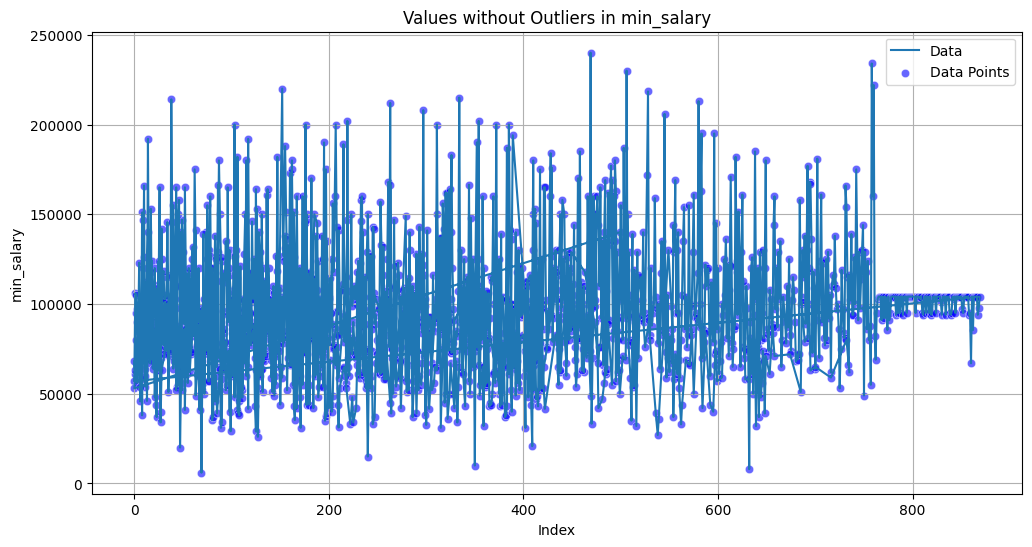

In [145]:
#revisamos posibles outliers de todo el dataset USA
detect_and_plot_outliers(us, 'min_salary')

In [146]:
indices = [157, 526, 578, 668, 743, 63, 476]

us_min_outliers = us.loc[indices]

display(us_min_outliers)

company  company_score  \
157                 Intuitive Machines Llc            3.8   
157                   Vital Edge Solutions            5.0   
157                 Takeda Pharmaceuticals            3.7   
526                                 Boeing            4.0   
578                                  Intel            5.0   
578                               Novartis            3.8   
668                                Workday            4.0   
743                               Teradyne            3.6   
63                            Honeycomb.Io            4.2   
63                    Bridgeline Solutions            3.6   
63   Pacific Northwest National Laboratory            3.8   
476                                 Paccar            4.2   
476                         Selby Jennings            3.1   

                                             job_title  \
157                         Research Software Engineer   
157                                 Back End Developer   
157  Pricipal Scientist Molecular And Cellular Biol...   
526                           Senior Software Engineer   
578  Software Engineer 2 - Mainframe (Cobol, Jcl, V...   
578  Senior Data Scientist – Visualization, Novarti...   
668  Software Engineer - Camera (Technical Leadership)   
743                         Software Engineer (Onsite)   
63                  Midlevel Site Reliability Engineer   
63   Patent Agent (Machine Learning Ai/Computer Sci...   
63   Data Scientist In Artificial Intelligence Earl...   
476                                    Python Engineer   
476                                     Nlp Researcher   

                   location                city   state  \
157             Houston, TX             Houston      TX   
157                  Remote              Remote  Remote   
157              Boston, MA              Boston      MA   
526          Washington, DC          Washington      DC   
578          Brookfield, WI          Brookfield      WI   
578           Cambridge, MA           Cambridge      MA   
668             Redmond, WA             Redmond      WA   
743            Columbia, MD            Columbia      MD   
63            United States         Unspecified  Remote   
63           Washington, DC          Washington      DC   
63             Richland, WA            Richland      WA   
476  Annapolis Junction, MD  Annapolis Junction      MD   
476            New York, NY            New York      NY   

                               position    seniority  min_salary  max_salary  \
157                   software engineer       junior    295000.0    440000.0   
157                  back end developer  unspecified    120000.0    130000.0   
157                      data scientist       junior     52000.0    101000.0   
526                   software engineer       senior    343000.0    637000.0   
578                   software engineer       junior    310000.0    465000.0   
578                      data scientist       senior     92000.0    150000.0   
668                   software engineer       senior    300000.0    450000.0   
743                   software engineer       junior    248000.0    385000.0   
63   midlevel site reliability engineer  semi-senior    141000.0    179000.0   
63            machine learning engineer       junior    250000.0    250000.0   
63                       data scientist       junior     49000.0     85000.0   
476                     python engineer       junior    160000.0    170000.0   
476                      nlp researcher  unspecified    250000.0    250000.0   

     avg_salary                                           job_info  \
157    367500.0                                                NaN   
157    125000.0  Back-End Developer / Data Engineer  Good to ex...   
157     76500.0  Job Description      OBJECTIVE:  Help us make ...   
526    490000.0                                                NaN   
578    387500.0                                                NaN   

Detected outliers in 'max_salary':
157    440000.0
369    385000.0
372    370000.0
427    385000.0
526    637000.0
578    465000.0
668    450000.0
743    385000.0
759    385000.0
Name: max_salary, dtype: float64
Data before removing outliers: 1697
Data after removing outliers: 1688


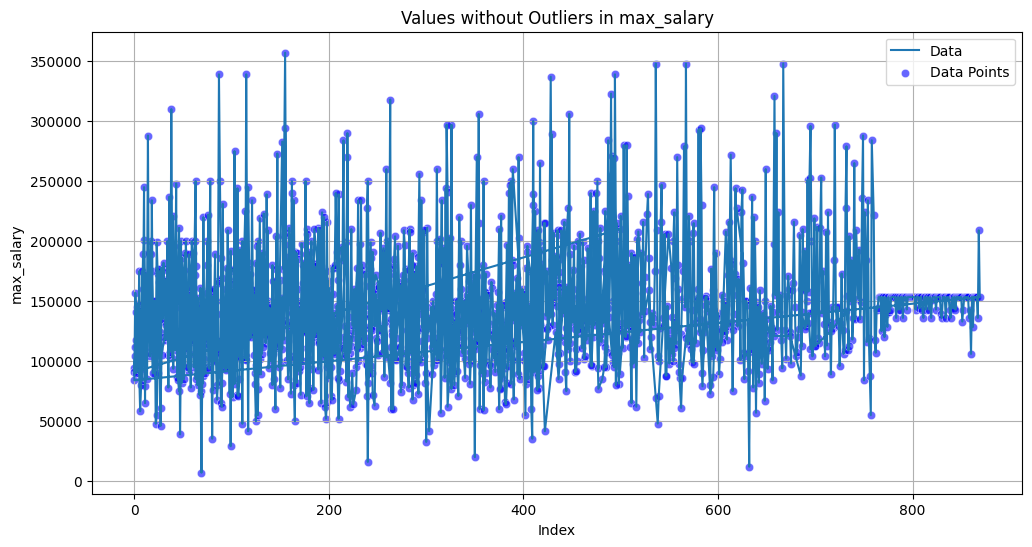

In [147]:
detect_and_plot_outliers(us, 'max_salary')

In [148]:
indices = [157, 369, 372, 427, 526, 578, 668, 743, 759]

us_mx_outliers = us.loc[indices]

display(us_mx_outliers)

company  company_score  \
157  Intuitive Machines Llc            3.8   
157    Vital Edge Solutions            5.0   
157  Takeda Pharmaceuticals            3.7   
369                     Snc            2.8   
369       Arbella Insurance            3.4   
372                 Teamups            4.4   
372         Inspur Usa Inc.            3.6   
427              Qinetiq Us            3.9   
526                  Boeing            4.0   
578                   Intel            5.0   
578                Novartis            3.8   
668                 Workday            4.0   
743                Teradyne            3.6   
759                  Openai            3.1   

                                             job_title            location  \
157                         Research Software Engineer         Houston, TX   
157                                 Back End Developer              Remote   
157  Pricipal Scientist Molecular And Cellular Biol...          Boston, MA   
369                            Video Software Engineer       Lexington, MA   
369                              It - Data Engineer Ii          Quincy, MA   
372                                    Devops Engineer  Newtown Square, PA   
372                                      Data Engineer         Seattle, WA   
427                                Front-End Developer      Burr Ridge, IL   
526                           Senior Software Engineer      Washington, DC   
578  Software Engineer 2 - Mainframe (Cobol, Jcl, V...      Brookfield, WI   
578  Senior Data Scientist – Visualization, Novarti...       Cambridge, MA   
668  Software Engineer - Camera (Technical Leadership)         Redmond, WA   
743                         Software Engineer (Onsite)        Columbia, MD   
759                   Apprentice Etl Software Engineer        Elkridge, MD   

               city   state            position    seniority  min_salary  \
157         Houston      TX   software engineer       junior    295000.0   
157          Remote  Remote  back end developer  unspecified    120000.0   
157          Boston      MA      data scientist       junior     52000.0   
369       Lexington      MA   software engineer       junior    160000.0   
369          Quincy      MA       data engineer  semi-senior     61000.0   
372  Newtown Square      PA     devops engineer       junior    200000.0   
372         Seattle      WA       data engineer       junior     62400.0   
427      Burr Ridge      IL  frontend developer  unspecified    160000.0   
526      Washington      DC   software engineer       senior    343000.0   
578      Brookfield      WI   software engineer       junior    310000.0   
578       Cambridge      MA      data scientist       senior     92000.0   
668         Redmond      WA   software engineer       senior    300000.0   
743        Columbia      MD   software engineer       junior    248000.0   
759        Elkridge      MD   software engineer       junior    160000.0   

     max_salary  avg_salary  \
157    440000.0    367500.0   
157    130000.0    125000.0   
157    101000.0     76500.0   
369    385000.0    272500.0   
369    119000.0     90000.0   
372    370000.0    285000.0   
372    104000.0     83200.0   
427    385000.0    272500.0   
526    637000.0    490000.0   
578    465000.0    387500.0   
578    150000.0    121000.0   
668    450000.0    375000.0   
743    385000.0    316500.0   
759    385000.0    272500.0   

                                              job_info  \
157                                                NaN   
157  Back-End Developer / Data Engineer  Good to ex...   
157  Job Description      OBJECTIVE:  Help us make ...   
369                                                NaN   
369  IT - Data Engineer II    The Data Engineer II ...   
372                                                NaN   
372  We are looking for a software engineer who can...   
427                                                NaN   
526                          

Detected outliers in 'avg_salary':
157    367500.0
526    490000.0
578    387500.0
668    375000.0
743    316500.0
Name: avg_salary, dtype: float64
Data before removing outliers: 1697
Data after removing outliers: 1692


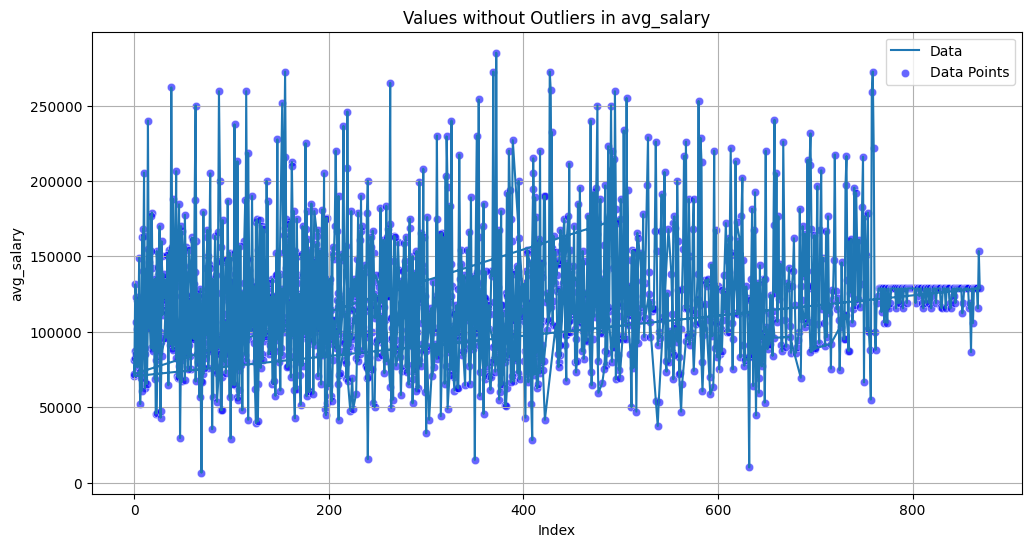

In [149]:
detect_and_plot_outliers(us, 'avg_salary')

In [150]:
indices = [157, 526, 578, 668, 743]

us_avg_outliers = us.loc[indices]

display(us_avg_outliers)

company  company_score  \
157  Intuitive Machines Llc            3.8   
157    Vital Edge Solutions            5.0   
157  Takeda Pharmaceuticals            3.7   
526                  Boeing            4.0   
578                   Intel            5.0   
578                Novartis            3.8   
668                 Workday            4.0   
743                Teradyne            3.6   

                                             job_title        location  \
157                         Research Software Engineer     Houston, TX   
157                                 Back End Developer          Remote   
157  Pricipal Scientist Molecular And Cellular Biol...      Boston, MA   
526                           Senior Software Engineer  Washington, DC   
578  Software Engineer 2 - Mainframe (Cobol, Jcl, V...  Brookfield, WI   
578  Senior Data Scientist – Visualization, Novarti...   Cambridge, MA   
668  Software Engineer - Camera (Technical Leadership)     Redmond, WA   
743                         Software Engineer (Onsite)    Columbia, MD   

           city   state            position    seniority  min_salary  \
157     Houston      TX   software engineer       junior    295000.0   
157      Remote  Remote  back end developer  unspecified    120000.0   
157      Boston      MA      data scientist       junior     52000.0   
526  Washington      DC   software engineer       senior    343000.0   
578  Brookfield      WI   software engineer       junior    310000.0   
578   Cambridge      MA      data scientist       senior     92000.0   
668     Redmond      WA   software engineer       senior    300000.0   
743    Columbia      MD   software engineer       junior    248000.0   

     max_salary  avg_salary  \
157    440000.0    367500.0   
157    130000.0    125000.0   
157    101000.0     76500.0   
526    637000.0    490000.0   
578    465000.0    387500.0   
578    150000.0    121000.0   
668    450000.0    375000.0   
743    385000.0    316500.0   

                                              job_info  \
157                                                NaN   
157  Back-End Developer / Data Engineer  Good to ex...   
157  Job Description      OBJECTIVE:  Help us make ...   
526                                                NaN   
578                                                NaN   
578  10-Oct-2019    Job ID  279466BR  {"QuestionNam...   
668                                                NaN   
743                                                NaN   

                          industry                         sector  
157                            NaN                            NaN  
157  Computer Hardware Development  Tecnologías de la información  
157      Biotech & Pharmaceuticals      Biotech & Pharmaceuticals  
526                            NaN                            NaN  
578                            NaN                            NaN  
578      Biotech & Pharmaceuticals      Biotech & Pharmaceuticals  
668                            NaN                            NaN  
743                            NaN                            NaN

In [151]:
#Unimos los datasets de us con canada
job_postings = pd.concat([us, df4], ignore_index=True, sort=False)

In [152]:
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        3350 non-null   object 
 1   company_score  1697 non-null   float64
 2   job_title      3350 non-null   object 
 3   location       1697 non-null   object 
 4   city           3350 non-null   object 
 5   state          3350 non-null   object 
 6   position       3350 non-null   object 
 7   seniority      3350 non-null   object 
 8   min_salary     3350 non-null   float64
 9   max_salary     3350 non-null   float64
 10  avg_salary     3350 non-null   float64
 11  job_info       2463 non-null   object 
 12  industry       2480 non-null   object 
 13  sector         827 non-null    object 
 14  skill          1653 non-null   object 
 15  work_type      1653 non-null   object 
dtypes: float64(4), object(12)
memory usage: 418.9+ KB


In [153]:
job_postings['company_score'] = pd.to_numeric(job_postings['company_score'], errors='coerce')

median = job_postings['company_score'].median()

job_postings['company_score'] = job_postings['company_score'].fillna(median)

In [154]:
job_postings['job_info'] = job_postings['job_info'].fillna('Unspecified')
job_postings['industry'] = job_postings['industry'].fillna('Unspecified')
job_postings['work_type'] = job_postings['work_type'].fillna('Unspecified')
job_postings['location'] = job_postings['location'].fillna('Unspecified')
job_postings['sector']=job_postings['sector'].fillna('Unspecified')
job_postings['skill']=job_postings['skill'].fillna('Unspecified')
job_postings=job_postings.rename(columns={'skill': 'skills'})

In [155]:
job_postings['seniority'] = job_postings['seniority'].replace('senior', 'Senior')
job_postings['seniority'] = job_postings['seniority'].replace('semi-senior', 'Mid')
job_postings['seniority'] = job_postings['seniority'].replace('mid', 'Mid')
job_postings['seniority'] = job_postings['seniority'].replace('junior', 'Junior')
job_postings['seniority'] = job_postings['seniority'].replace('unspecified', 'Unspecified')

In [156]:
industry_clean = {
    'Aerospace' : 'Aerospace & Defense', 
    'Banks & Credit Unions' : 'Banks & Credit Services',
    'Colleges & Universities' : 'Education',
    'Computer Hardware Development' : 'Computer Hardware & Software', 
    'Education & Professional Training' : 'Education', 
    'Education Training Services' : 'Education', 
    'Federal & State Agencies' : 'Federal Agencies',
    'Health Care Products Manufacturing' : 'Healthcare',
    'Health Care Services & Hospitals' : 'Healthcare', 
    'Health, Beauty, & Fitness' : 'Healthcare', 
    'Insurance Agencies & Brokerages' : 'Insurance',
    'Insurance Carriers' :'Insurance',
    'Insurance Carriers & Investment Societies' : 'Insurance',
    'Insurance Companies' : 'Insurance',
    'Internet' : 'Telecommunications', 
    'It Services' : 'IT Services', 
    'K-12 Education' : 'Education',
    'Telecommunications Manufacturing' : 'Telecommunications',
    'Telecommunications Services' : 'Telecommunications',
    'Transportation Equipment Manufacturing' : 'Transportation', 
    'Transportation Management' : 'Transportation', 
    'Travel Agencies' : 'Travel', 
    'Financial Transaction Processing' : 'Finance',
    'unspecified': 'Unspecified',
}

job_postings['industry'] = job_postings['industry'].replace(industry_clean)

In [157]:
job_postings['sector'].unique()

array(['Unspecified', 'Seguros', 'Finanzas',
       'Tecnologías de la información', 'unspecified', 'Manufactura',
       'Educación', 'Legal', 'Aeroespacial y defensa',
       'Ventas al mayoreo y al menudeo', 'Recursos humanos',
       'Audiovisual y medios de comunicación', 'Salud',
       'Administración y consultoría',
       'Servicios de construcción, reparación y mantenimiento',
       'Gobierno y administración pública',
       'Energía, minería e infraestructura pública',
       'Farmacéutica y biotecnología',
       'Servicios personales al consumidor',
       'Hoteles y complejos turísticos', 'Telecomunicaciones',
       'Artes y entretenimiento', 'Transporte y logística',
       'ONG y Organizaciones sin fines de lucro',
       'Restaurantes y servicios de comidas', 'Aerospace & Defense',
       'Health Care', 'Business Services', 'Oil, Gas, Energy & Utilities',
       'Real Estate', 'Finance', 'Information Technology', 'Retail',
       'Biotech & Pharmaceuticals', 'Media'

In [158]:
sector_translation = {
    'Seguros': 'Insurance',
    'Finanzas': 'Finance',
    'Tecnologías de la información': 'Information Technology',
    'Manufactura': 'Manufacturing',
    'Aeroespacial y defensa': 'Aerospace & Defense',
    'Ventas al mayoreo y al menudeo': 'Wholesale & Retail',
    'Recursos humanos': 'Human Resources',
    'Audiovisual y medios de comunicación': 'Media & Entertainment',
    'Salud': 'Health Care',
    'Administración y consultoría': 'Business Services',
    'Servicios de construcción, reparación y mantenimiento': 'Construction, Repair & Maintenance',
    'Gobierno y administración pública': 'Government & Public Administration',
    'Energía, minería e infraestructura pública': 'Energy, Mining & Public Infrastructure',
    'Farmacéutica y biotecnología': 'Biotech & Pharmaceuticals',
    'Servicios personales al consumidor': 'Consumer Services',
    'Hoteles y complejos turísticos': 'Hotels & Resorts',
    'Telecomunicaciones': 'Telecommunications',
    'Artes y entretenimiento': 'Arts & Entertainment',
    'Transporte y logística': 'Transportation & Logistics',
    'ONG y Organizaciones sin fines de lucro': 'Non-Profit Organizations',
    'Restaurantes y servicios de comidas': 'Restaurants & Food Services',
    'Aerospace & Defense': 'Aerospace & Defense',
    'Health Care': 'Health Care',
    '-1': 'Unspecified',
}

job_postings['sector'] = job_postings['sector'].replace(sector_translation)

In [159]:
categorias = {
    'software engineer': 'Software Engineer',
    'developer': 'Software Engineer',  # Abarca todos los tipos de desarrollo de software
    'backend developer': 'Software Engineer',
    'frontend developer': 'Web Developer',
    'full stack developer': 'Software Engineer',
    'full stack engineer': 'Software Engineer',
    'devops': 'DevOps Engineer',
    'site reliability': 'DevOps Engineer',
    'qa': 'Quality Assurance (QA)',
    'test engineer': 'Quality Assurance (QA)',
    'data scientist': 'Data Scientist',
    'machine learning': 'AI/ML Engineer',
    'ai/ml': 'AI/ML Engineer',
    'data engineer': 'Data Engineer',
    'data architect': 'Data Engineer',
    'cloud engineer': 'Cloud Engineer',
    'technical support': 'Technical Support',
    'network engineer': 'Network Engineer',
    'business analyst': 'Business Analyst',
    'product manager': 'Product Manager',
    'it manager': 'IT Manager',
    'scientist': 'Scientist',
    'research scientist': 'Scientist',
    'statistician': 'Data Scientist',
    'analyst': 'Data Analyst',
    'systems engineer': 'System Engineer',
    'programmer': 'Software Engineer',
    'web developer': 'Web Developer',
    'architect': 'Data Engineer',
    'support engineer': 'Technical Support',
    'manager': 'IT Manager'
}

def asignar_categoria(job_title):
    for keyword, categoria in categorias.items():
        if keyword in job_title.lower():
            return categoria
    return 'Other'  


job_postings['position'] = job_postings['position'].apply(asignar_categoria)

In [160]:
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        3350 non-null   object 
 1   company_score  3350 non-null   float64
 2   job_title      3350 non-null   object 
 3   location       3350 non-null   object 
 4   city           3350 non-null   object 
 5   state          3350 non-null   object 
 6   position       3350 non-null   object 
 7   seniority      3350 non-null   object 
 8   min_salary     3350 non-null   float64
 9   max_salary     3350 non-null   float64
 10  avg_salary     3350 non-null   float64
 11  job_info       3350 non-null   object 
 12  industry       3350 non-null   object 
 13  sector         3350 non-null   object 
 14  skills         3350 non-null   object 
 15  work_type      3350 non-null   object 
dtypes: float64(4), object(12)
memory usage: 418.9+ KB


Detected outliers in 'min_salary':
157     295000.0
334     215000.0
469     240000.0
506     230000.0
526     343000.0
528     218400.0
578     310000.0
580     213000.0
668     300000.0
743     248000.0
758     234000.0
760     222000.0
908     214000.0
933     250000.0
1020    220000.0
1112    212000.0
1219    250000.0
Name: min_salary, dtype: float64
Data before removing outliers: 3350
Data after removing outliers: 3333


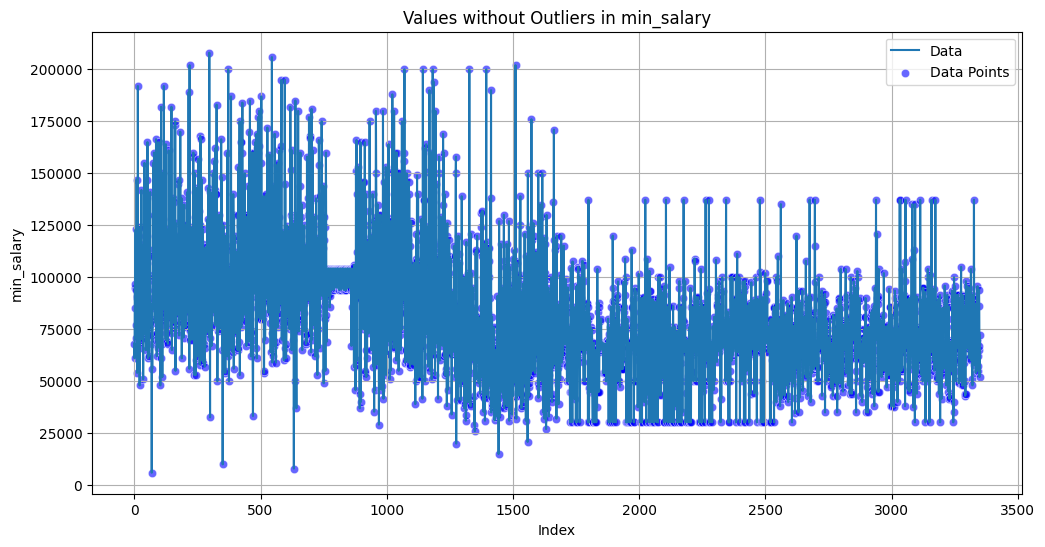

In [161]:
#Valores atipidos
detect_and_plot_outliers(job_postings, 'min_salary')

In [162]:
indices_jobs = [157, 334, 469, 506, 526, 528, 578, 580, 668, 743, 758, 760, 908, 933, 1020, 1112, 1219]

job_postings = job_postings.drop(indices_jobs)

Detected outliers in 'max_salary':
369     385000.0
372     370000.0
427     385000.0
428     337000.0
447     306000.0
490     323000.0
494     339000.0
536     348000.0
567     348000.0
658     321000.0
667     348000.0
759     385000.0
957     339000.0
985     339000.0
1022    357000.0
1510    306000.0
Name: max_salary, dtype: float64
Data before removing outliers: 3333
Data after removing outliers: 3317


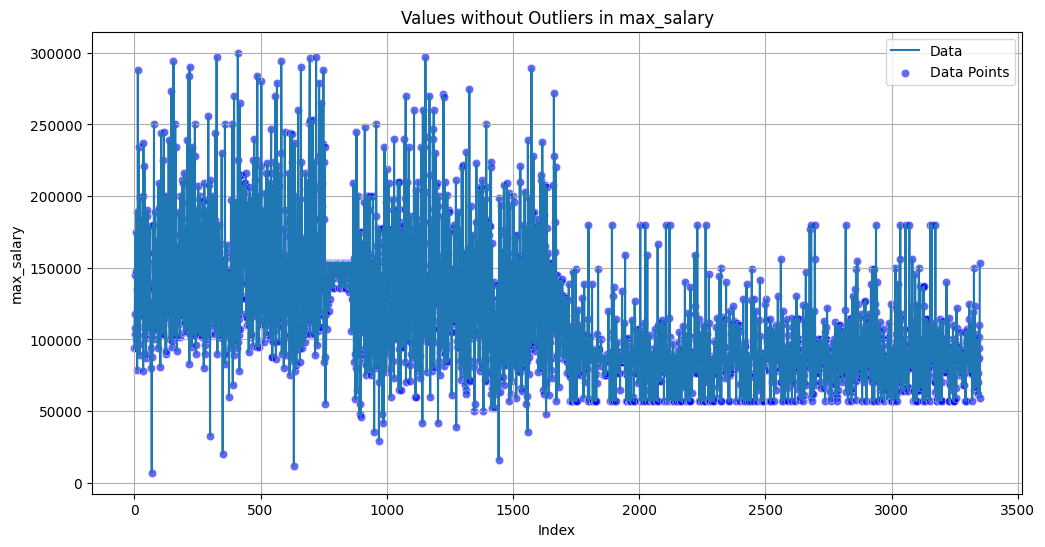

In [163]:
detect_and_plot_outliers(job_postings, 'max_salary')

In [164]:
indices_jobs = [369, 372, 427, 428, 447, 490, 494, 536, 567, 658, 667, 759, 957, 985, 1022,1510]

jobs_max_outliers = job_postings.loc[indices_jobs]

display(jobs_max_outliers)

company  company_score  \
369                              Snc            2.8   
372                          Teamups            4.4   
427                       Qinetiq Us            3.9   
428                      Caterpillar            4.0   
447                          Astrion            3.7   
490                           Boeing            4.6   
494                        Bytedance            3.6   
536   Federal Reserve Bank Of Dallas            3.5   
567                        Honeywell            3.6   
658               Ford Motor Company            4.4   
667    Yellow Duck Technologies Inc.            4.3   
759                           Openai            3.1   
957                           Nvidia            4.6   
985                           Nvidia            4.6   
1022                          Nvidia            4.6   
1510        Liberty Mutual Insurance            3.3   

                                              job_title            location  \
369                             Video Software Engineer       Lexington, MA   
372                                     Devops Engineer  Newtown Square, PA   
427                                 Front-End Developer      Burr Ridge, IL   
428                                  Solutions Engineer       United States   
447                                     Devops Engineer   Oklahoma City, OK   
490                          Senior Software Engineer I         Houston, TX   
494                    Staff Software Engineer (Remote)               Texas   
536                                   Software Engineer       Baltimore, MD   
567          Full-Stack Software Engineer – Lmts / Pmts   San Francisco, CA   
658   Software Dev Engineer - Machine Learning Apps,...       Cupertino, CA   
667                       Software Performance Engineer   North Reading, MA   
759                    Apprentice Etl Software Engineer        Elkridge, MD   
957   Senior Performance Software Engineer, Deep Lea...     Santa Clara, CA   
985                      Senior Ai-Hpc Storage Engineer     Santa Clara, CA   
1022  Reliability, Availability And Serviceability E...     Santa Clara, CA   
1510          Director Ii, Data Science - Grm Actuarial         Chicago, IL   

                city   state           position    seniority  min_salary  \
369        Lexington      MA  Software Engineer       Junior    160000.0   
372   Newtown Square      PA    DevOps Engineer       Junior    200000.0   
427       Burr Ridge      IL  Software Engineer  Unspecified    160000.0   
428      Unspecified  Remote              Other       Junior    184000.0   
447    Oklahoma City      OK    DevOps Engineer       Junior    117000.0   
490          Houston      TX  Software Engineer       Senior    177000.0   
494            Texas      TX  Software Engineer       Junior    180000.0   
536        Baltimore      MD  Software Engineer       Junior    104000.0   
567    San Francisco      CA  Software Engineer       Junior    104000.0   
658        Cupertino      CA     AI/ML Engineer       Junior    160000.0   
667    North Reading      MA              Other       Junior    104000.0   
759         Elkridge      MD  Software Engineer       Junior    160000.0   
957      Santa Clara      CA  Software Engineer       Senior    180000.0   
985      Santa Clara      CA              Other       Senior    180000.0   
1022     Santa Clara      CA              Other       Junior    188000.0   
1510         Chicago      IL     Data Scientist          Mid    202000.0   

      max_salary  avg_salary  \
369     385000.0    272500.0   
372     370000.0    285000.0   
427     385000.0    272500.0   
428     337000.0    260500.0   
447     306000.0    211500.0   
490     323000.0    250000.0   
494     339000.0    259500.0   
536     348000.0    226000.0   
567     348000.0    226000.0   
658     321000.0    240500.0   
667     348000.0    226000.0   
759     385000.0    272500.0   
957     339000.0    259500.0   
985     

In [165]:
job_postings = job_postings.drop(indices_jobs)

Detected outliers in 'avg_salary':
14     240000.0
219    246000.0
326    240000.0
Name: avg_salary, dtype: float64
Data before removing outliers: 3317
Data after removing outliers: 3314


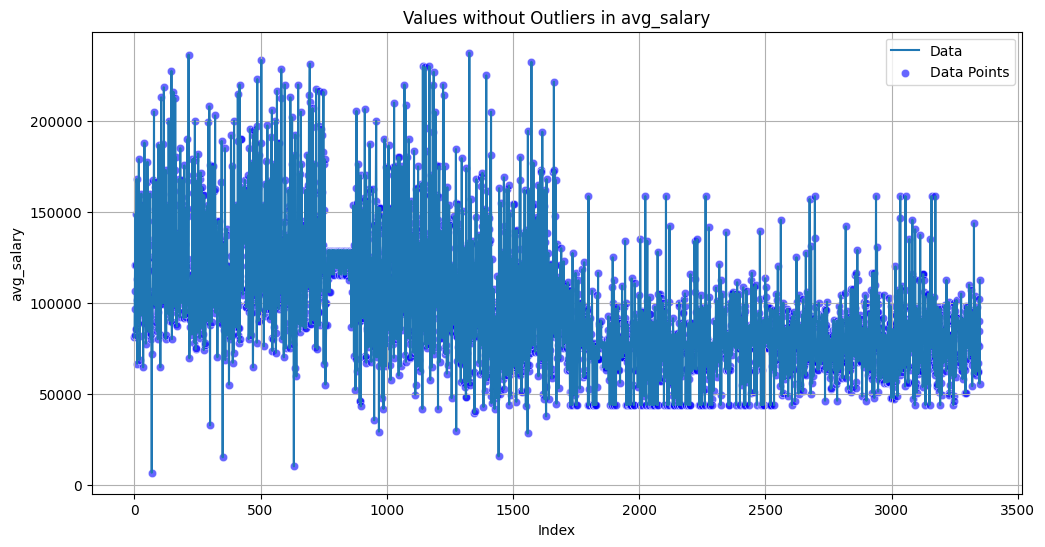

In [166]:
detect_and_plot_outliers(job_postings, 'avg_salary')

## Tablas para base de datos

In [167]:
job_postings['id'] = job_postings.index + 1

# Tabla industry_type
industry_type = job_postings[['industry']].drop_duplicates().reset_index(drop=True)
industry_type['id'] = industry_type.index + 1
industry_type.rename(columns={'industry': 'type'}, inplace=True)

# Tabla position_types
position_types = job_postings[['position']].drop_duplicates().reset_index(drop=True)
position_types['id'] = position_types.index + 1

# Tabla seniority_levels
seniority_levels = job_postings[['seniority']].drop_duplicates().reset_index(drop=True)
seniority_levels['id'] = seniority_levels.index + 1
seniority_levels.rename(columns={'seniority': 'level'}, inplace=True)

# Tabla locations
locations = pd.DataFrame({
    'state': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
              'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
              'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
              'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
              'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
              'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
              'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
              'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
              'Wisconsin', 'Wyoming', 'Remote', 'Unspecified', 
              'Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 
              'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 
              'Quebec', 'Saskatchewan', 'Northwest Territories', 'Nunavut', 'Yukon', 'Aguadilla'],
    'abbreviation': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 
                     'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 
                     'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 
                     'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 
                     'WI', 'WY', 'Remote', 'Unspecified', 'AB', 'BC', 'MB', 'NB', 'NL', 'NS', 
                     'ON', 'PE', 'QC', 'SK', 'NT', 'NU', 'YT', 'PR'],
                     })
locations['id'] = locations.index + 1


In [168]:
display(industry_type)

type  id
0                      Unspecified   1
1                        Insurance   2
2          Banks & Credit Services   3
3             Software Development   4
4   Chemical Product Manufacturing   5
..                             ...  ..
75                           Media  76
76                      Government  77
77                   Manufacturing  78
78                          Retail  79
79                     Agriculture  80

[80 rows x 2 columns]

In [169]:
display(position_types) 

position  id
0        Software Engineer   1
1        Technical Support   2
2                    Other   3
3   Quality Assurance (QA)   4
4          DevOps Engineer   5
5          System Engineer   6
6             Data Analyst   7
7           Cloud Engineer   8
8           AI/ML Engineer   9
9            Data Engineer  10
10          Data Scientist  11
11         Product Manager  12
12              IT Manager  13
13        Business Analyst  14

In [170]:
display(seniority_levels)

level  id
0       Junior   1
1          Mid   2
2  Unspecified   3
3       Senior   4

In [171]:
locations['country'] = locations['id'].apply(lambda x: 'USA' if x <= 50 else 
                                             ('Remote' if x == 51 else 
                                             ('Unspecified' if x == 52 else 
                                             ('Canada' if x <= 65 else 'Puerto Rico'))))

In [172]:
display(locations.tail(20)) 

state abbreviation  id      country
46                 Washington           WA  47          USA
47              West Virginia           WV  48          USA
48                  Wisconsin           WI  49          USA
49                    Wyoming           WY  50          USA
50                     Remote       Remote  51       Remote
51                Unspecified  Unspecified  52  Unspecified
52                    Alberta           AB  53       Canada
53           British Columbia           BC  54       Canada
54                   Manitoba           MB  55       Canada
55              New Brunswick           NB  56       Canada
56  Newfoundland and Labrador           NL  57       Canada
57                Nova Scotia           NS  58       Canada
58                    Ontario           ON  59       Canada
59       Prince Edward Island           PE  60       Canada
60                     Quebec           QC  61       Canada
61               Saskatchewan           SK  62       Canada
62      Northwest Territories           NT  63       Canada
63                    Nunavut           NU  64       Canada
64                      Yukon           YT  65       Canada
65                  Aguadilla           PR  66  Puerto Rico

In [173]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         66 non-null     object
 1   abbreviation  66 non-null     object
 2   id            66 non-null     int64 
 3   country       66 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB


In [174]:
seniority_dict = dict(zip(seniority_levels['level'], seniority_levels['id']))

job_postings['seniority'] = job_postings['seniority'].map(seniority_dict)

job_postings['seniority'].unique()

array([1, 2, 3, 4], dtype=int64)

In [175]:
industry_dict = dict(zip(industry_type['type'], industry_type['id']))

job_postings['industry'] = job_postings['industry'].map(industry_dict)

job_postings['industry'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], dtype=int64)

In [176]:
position_dict = dict(zip(position_types['position'], position_types['id']))

job_postings['position'] = job_postings['position'].map(position_dict)

job_postings['position'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [177]:
job_postings['state'] = job_postings['state'].replace('DC', 'WA')

In [178]:
job_postings.at[2993, 'location'] = 'Newfoundland and Labrador (Terranova y Labrador)'
job_postings.at[2993, 'city'] = 'Newfoundland and Labrador (Terranova y Labrador)'
job_postings.at[2993, 'state'] = 'NL'


In [179]:
locations_dict = dict(zip(locations['abbreviation'], locations['id']))

job_postings['state'] = job_postings['state'].map(locations_dict)

job_postings['state'].unique()

array([46, 51, 33,  5, 43, 32, 10, 22, 21, 66, 23,  9, 47, 52, 38, 20, 44,
       13, 15,  3, 35, 48, 45,  7, 49, 42, 24, 37,  8, 30, 14, 39,  1,  6,
       31,  4, 12, 27, 25, 40, 29, 17, 16, 11, 36, 28, 50, 34, 18, 59, 54,
       53, 62, 61, 60, 56, 58, 55, 57, 65, 63], dtype=int64)

In [180]:
new_orden = ['id', 'job_title', 'job_info', 'position', 'company', 'city', 'state', 'seniority', 'work_type', 'industry', 'min_salary', 'max_salary', 'avg_salary', 'company_score', 'sector', 'skills']  # Reemplaza con el orden deseado
job_postings = job_postings[new_orden]

In [181]:
new_columns_jobs = {'position' : 'position_type_id',
                    'seniority' : 'seniority_level_id', 
                    'industry' : 'industry_type_id',  
                    'state' : 'location_id'
                    }

job_postings = job_postings.rename(columns=new_columns_jobs)

In [182]:
job_postings.sample(20)

id                              job_title  \
3223  3224              Systems and Data Analysts   
2706  2707     Financial and Operational Analysts   
2223  2224        Business and Technical Analysts   
2121  2122  Senior Business Intelligence Analysts   
775    776            Trainee Automation Engineer   
1178  1179       Senior Analyst, Ecommerce Search   
1687  1688                         Data Scientist   
674    675           Software Engineer Instructor   
862    863                   Software Engineer Ii   
1069  1070             Data Scientist - Analytics   
2573  2574                   Senior Data Analysts   
1923  1924        Business and Technical Analysts   
1190  1191                 Data Scientist Manager   
1060  1061                Data Science Consultant   
2139  2140      Senior Supply Chain Data Analysts   
1537  1538                          Data Engineer   
0        1                      Software Engineer   
780    781         Software Engineer - Applied Ai   
1006  1007    Data Mining Analyst - Life Sciences   
1864  1865  Senior Business Intelligence Analysts   

                                               job_info  position_type_id  \
3223                  Hrt Applications Business Analyst                14   
2706                               Intermediate Analyst                 7   
2223                              Hr Servicenow Analyst                 7   
2121                             Client Support Analyst                 7   
775                                         Unspecified                 3   
1178  R10046193 Senior Analyst, eCommerce Search (Op...                 7   
1687  Job Description Header 2 Data scientist Locati...                11   
674                                         Unspecified                 1   
862                                         Unspecified                 1   
1069  Stackline is the first full-funnel connected c...                11   
2573                                       Data Analyst                 7   
1923                        Econ 24R - Economic Analyst                 7   
1190  Why Suncrest:      At Suncrest Hospice our goa...                11   
1060  Princeton, New Jersey; New York, New York; Phi...                11   
2139           Pipe Integrity Analyst (Daytime Support)                 7   
1537  BRMi Technology is seeking a Data Engineer (CI...                10   
0                                           Unspecified                 1   
780                                         Unspecified                 1   
1006  Data Mining Analyst - Life Sciences  Court Squ...                 7   
1864         Pricing & Legal Project Management Analyst                 7   

                       company              city  location_id  \
3223    Vail Resorts Corporate  British Columbia           54   
2706                   Westjet            Canada           52   
2223                    Ledcor         Vancouver           54   
2121            Edgecom Energy        North York           59   
775         Ford Motor Company               Ela           33   
1178                    Airgas            Radnor           38   
1687     Solugenix Corporation           Phoenix            3   
674                   Cotiviti            Denver            6   
862                     Roblox          Valhalla           32   
1069                 Stackline           Seattle           47   
2573  Sri Technosoft Solutions          Edmonton           53   
1923         Bc Public Service          Victoria           54   
1190          Suncrest Hospice             Sandy           44   
1060             Zs Associates         Princeton           30   
2139                Darkvision         Vancouver           54   
1537                      Brmi         Chantilly           46   
0                     Viewsoft          Manassas           46   
780                    Workday          San Jose            5   
1006  Court Square Group, Inc.           

In [183]:
df5['state'] = df5['state'].map(locations_dict)
df5['state'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 47,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50],
      dtype=int64)

In [184]:
new_orden_df5 = ['state', 'case_id', 'is_metro', 'area_name', 'parents', 'children', 'housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes', 'total_cost', 'median_family_income', 'family_member_count' ] 
df5 = df5[new_orden_df5]

In [185]:
new_columns_df5 = {
    'state': 'location_id'
}
df5 = df5.rename(columns=new_columns_df5)

In [186]:
cost_of_living = df5.drop('family_member_count', axis =1)
cost_of_living.sample(20)

location_id  case_id  is_metro                            area_name  \
9293            16      936     False                      Hodgeman County   
21558           36     2182      True                                 Enid   
9543            16      961     False                        Neosho County   
22279           37     2254     False                          Lake County   
13282           23     1350     False                    Clearwater County   
13272           23     1349      True                                Fargo   
2642             6      265      True               Denver-Aurora-Lakewood   
29849           47     3013      True                     Seattle-Bellevue   
23529           40     2381     False                      Newberry County   
4380            10      445     False                        Elbert County   
21125           35     2139     False                        Putnam County   
5292            10      536      True                    Macon-Bibb County   
27177           43     2746     False                     Red River County   
3235             9      330     False                      Bradford County   
24425           42     2471     False                          Clay County   
4339            10      440      True                               Albany   
8624            15      869     False                     Palo Alto County   
29426           46     2971      True  Virginia Beach-Norfolk-Newport News   
360              1       37      True                    Birmingham-Hoover   
12966           22     1318     False                     Ontonagon County   

       parents  children  housing_cost  food_cost  transportation_cost  \
9293         1         3      11640.00    8308.48             15269.33   
21558        2         3      13068.00   10798.75             14998.97   
9543         1         3      11736.00    8846.43             13396.47   
22279        2         4      12648.00   14738.17             15251.40   
13282        1         2       8808.00    7124.16             13870.17   
13272        1         2      10798.41    6900.13             12501.68   
2642         1         2      16518.69    7863.46             15792.28   
29849        2         4      29646.81   15723.70             17262.00   
23529        2         4      12516.00   12319.14             15256.79   
4380         1         0       5856.00    3174.79             11054.21   
21125        2         0       7344.00    5401.98             14193.76   
5292         1         2       7181.18    6720.90             12853.54   
27177        2         2       8808.00    8395.00             14673.82   
3235         2         0       7824.00    5744.36             12872.98   
24425        2         0       6228.00    5858.49             13383.20   
4339         2         4      11794.04   13528.65             13665.85   
8624         1         4      10668.00   11377.38             14101.05   
29426        2         1      14094.75    7267.80             14428.17   
360          1         0       9777.29    3330.41              9661.83   
12966        2         1       8808.00    7267.80             14562.74   

       healthcare_cost  other_necessities_cost  childcare_cost     taxes  \
9293          14690.65                 7228.12         9840.16   7106.48   
21558         19152.12                 8647.86        17025.40   9985.30   
9543          13465.27                 7457.83         9887.26   6315.58   
22279         19805.98                 9923.09        16028.28  12324.62   
13282          9862.23                 5772.85        11400.75   5066.84   
13272          9950.23                 6412.88        20227.98   9373.41   
2642           7923.40                 8834.61        19419.78  12903.12   
29849         16421.01                16439.53        23331.82  14840.02   
23529         19356.46                 8998.75         8256.62   4614.81   
4380           4786.79                 3272.21       

In [187]:
load_dotenv()

ruta_base = os.environ['DATA_DIR']

industry_type.to_csv(ruta_base+'/cleaned_datasets/industry_type.csv', index=False)
position_types.to_csv(ruta_base+'/cleaned_datasets/position_types.csv', index=False)
seniority_levels.to_csv(ruta_base+'/cleaned_datasets/seniority_levels.csv', index=False)
locations.to_csv(ruta_base+'/cleaned_datasets/locations.csv', index=False)
job_postings.to_csv(ruta_base+'/cleaned_datasets/job_postings.csv', index=False)
cost_of_living.to_csv(ruta_base+'/cleaned_datasets/cost_of_living.csv', index=False)